# INTEGRATE Timing Analysis Example

This example demonstrates how to perform comprehensive timing analysis of the INTEGRATE workflow
using the built-in timing_compute() and timing_plot() functions. 

The timing analysis benchmarks four main components:
1. Prior model generation (layered geological models)
2. Forward modeling using GA-AEM electromagnetic simulation  
3. Rejection sampling for Bayesian inversion
4. Posterior statistics computation

Results are automatically saved and comprehensive plots are generated showing:
- Performance scaling with dataset size and processor count
- Speedup analysis and parallel efficiency
- Comparisons with traditional least squares and MCMC methods
- Component-wise timing breakdowns

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


## Quick Timing Test

This example runs a quick timing test with a small subset of dataset sizes 
and processor counts to demonstrate the timing functions.

In [3]:
print("# Running Quick Timing Test")
print("="*50)

# Define test parameters - small arrays for quick demonstration
N_arr_quick = [100, 1000, 10000]  # Small dataset sizes for quick test
Nproc_arr_quick = [1, 2, 4, 8]     # Limited processor counts

# Run timing computation
timing_file = ig.timing_compute(N_arr=N_arr_quick, Nproc_arr=Nproc_arr_quick)

print(f"\nTiming results saved to: {timing_file}")

# Running Quick Timing Test
Notebook detected. Parallel processing is OK
# TIMING TEST
Hostname (system): d52534 (Linux) 
Number of processors: 24
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Testing on 3 data sets of size(s): [100, 1000, 10000]
Testing on 4 sets of core(s): [1, 2, 4, 8]
Writing results to timing_d52534-Linux-24core_Nproc4_N3.npz 
TIMING: N=100, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                           | 0/100 [00:00<?, ?it/s]

prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                               | 0/100 [00:00<?, ?it/s]

gatdaem1d:  64%|████████████████████████▎             | 64/100 [00:01<00:00, 63.14it/s]

prior_data_gaaem: Time=  1.9s/100 soundings. 18.8ms/sounding, 53.1it/s


rejection:   0%|                                             | 0/11693 [00:00<?, ?it/s]

rejection:  11%|███▍                           | 1275/11693 [00:00<00:00, 12741.93it/s]

rejection:  22%|██████▊                        | 2580/11693 [00:00<00:00, 12918.87it/s]

rejection:  33%|██████████▎                    | 3895/11693 [00:00<00:00, 13022.27it/s]

rejection:  45%|█████████████▊                 | 5212/11693 [00:00<00:00, 13079.43it/s]

rejection:  56%|█████████████████▎             | 6534/11693 [00:00<00:00, 13127.19it/s]

rejection:  67%|████████████████████▊          | 7855/11693 [00:00<00:00, 13152.76it/s]

rejection:  78%|████████████████████████▎      | 9172/11693 [00:00<00:00, 13156.09it/s]

rejection:  90%|██████████████████████████▉   | 10488/11693 [00:00<00:00, 13156.51it/s]

integrate_rejection: Time=  0.9s/11693 soundings,  0.1ms/sounding, 12968.7it/s. T_av=3187.2, EV_av=-990.5


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  38%|████████████▋                    | 4489/11693 [00:01<00:01, 4488.80it/s]

poststat:  77%|█████████████████████████▍       | 9018/11693 [00:02<00:00, 4511.88it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  57%|██████████████████▋              | 6630/11693 [00:01<00:00, 6629.59it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                          | 0/1000 [00:00<?, ?it/s]

prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                              | 0/1000 [00:00<?, ?it/s]

gatdaem1d:   7%|██▍                                  | 66/1000 [00:01<00:14, 65.61it/s]

gatdaem1d:  13%|████▊                               | 132/1000 [00:02<00:13, 65.71it/s]

gatdaem1d:  20%|███████▏                            | 198/1000 [00:03<00:12, 65.00it/s]

gatdaem1d:  26%|█████████▌                          | 264/1000 [00:04<00:11, 64.98it/s]

gatdaem1d:  33%|███████████▊                        | 329/1000 [00:05<00:10, 64.83it/s]

gatdaem1d:  39%|██████████████▏                     | 394/1000 [00:06<00:09, 64.80it/s]

gatdaem1d:  46%|████████████████▌                   | 459/1000 [00:07<00:08, 64.34it/s]

gatdaem1d:  52%|██████████████████▊                 | 524/1000 [00:08<00:07, 64.44it/s]

gatdaem1d:  59%|█████████████████████▏              | 589/1000 [00:09<00:06, 64.46it/s]

gatdaem1d:  65%|███████████████████████▌            | 654/1000 [00:10<00:05, 64.61it/s]

gatdaem1d:  72%|█████████████████████████▉          | 719/1000 [00:11<00:04, 64.59it/s]

gatdaem1d:  78%|████████████████████████████▏       | 784/1000 [00:12<00:03, 63.94it/s]

gatdaem1d:  85%|██████████████████████████████▋     | 851/1000 [00:13<00:02, 64.67it/s]

gatdaem1d:  92%|████████████████████████████████▉   | 916/1000 [00:14<00:01, 64.50it/s]

gatdaem1d:  98%|███████████████████████████████████▎| 981/1000 [00:15<00:00, 64.50it/s]

prior_data_gaaem: Time= 15.7s/1000 soundings. 15.7ms/sounding, 63.5it/s


rejection:   0%|                                             | 0/11693 [00:00<?, ?it/s]

rejection:   5%|█▌                               | 545/11693 [00:00<00:02, 5446.49it/s]

rejection:   9%|██▉                             | 1084/11693 [00:00<00:01, 5410.18it/s]

rejection:  14%|████▍                           | 1610/11693 [00:00<00:01, 5337.80it/s]

rejection:  18%|█████▉                          | 2155/11693 [00:00<00:01, 5380.22it/s]

rejection:  23%|███████▍                        | 2707/11693 [00:00<00:01, 5429.37it/s]

rejection:  28%|████████▊                       | 3231/11693 [00:00<00:01, 5363.50it/s]

rejection:  32%|██████████▎                     | 3753/11693 [00:00<00:01, 5315.03it/s]

rejection:  37%|███████████▊                    | 4296/11693 [00:00<00:01, 5350.09it/s]

rejection:  41%|█████████████▎                  | 4848/11693 [00:00<00:01, 5400.35it/s]

rejection:  46%|██████████████▊                 | 5397/11693 [00:01<00:01, 5424.99it/s]

rejection:  51%|████████████████▎               | 5941/11693 [00:01<00:01, 5427.84it/s]

rejection:  55%|█████████████████▊              | 6486/11693 [00:01<00:00, 5431.99it/s]

rejection:  60%|███████████████████▎            | 7038/11693 [00:01<00:00, 5457.72it/s]

rejection:  65%|████████████████████▊           | 7589/11693 [00:01<00:00, 5472.50it/s]

rejection:  70%|██████████████████████▎         | 8140/11693 [00:01<00:00, 5482.88it/s]

rejection:  74%|███████████████████████▋        | 8670/11693 [00:01<00:00, 5426.58it/s]

rejection:  79%|█████████████████████████▏      | 9214/11693 [00:01<00:00, 5428.35it/s]

rejection:  83%|██████████████████████████▋     | 9747/11693 [00:01<00:00, 5397.91it/s]

rejection:  88%|███████████████████████████▎   | 10306/11693 [00:01<00:00, 5455.23it/s]

rejection:  93%|████████████████████████████▊  | 10864/11693 [00:02<00:00, 5489.67it/s]

rejection:  98%|██████████████████████████████▎| 11416/11693 [00:02<00:00, 5497.59it/s]

integrate_rejection: Time=  2.2s/11693 soundings,  0.2ms/sounding, 5406.9it/s. T_av=409.6, EV_av=-271.3


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  37%|████████████                     | 4296/11693 [00:01<00:01, 4295.68it/s]

poststat:  73%|████████████████████████▏        | 8592/11693 [00:02<00:00, 4275.02it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████                | 6037/11693 [00:01<00:00, 6036.34it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=1, Ncpu_min=1


prior_layered:   0%|                                         | 0/10000 [00:00<?, ?it/s]

prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                             | 0/10000 [00:00<?, ?it/s]

gatdaem1d:   1%|▏                                   | 67/10000 [00:01<02:30, 66.06it/s]

gatdaem1d:   1%|▍                                  | 134/10000 [00:02<02:31, 64.94it/s]

gatdaem1d:   2%|▋                                  | 199/10000 [00:03<02:31, 64.62it/s]

gatdaem1d:   3%|▉                                  | 264/10000 [00:04<02:31, 64.43it/s]

gatdaem1d:   3%|█▏                                 | 329/10000 [00:05<02:29, 64.55it/s]

gatdaem1d:   4%|█▍                                 | 394/10000 [00:06<02:29, 64.45it/s]

gatdaem1d:   5%|█▌                                 | 460/10000 [00:07<02:27, 64.80it/s]

gatdaem1d:   5%|█▊                                 | 525/10000 [00:08<02:26, 64.86it/s]

gatdaem1d:   6%|██                                 | 591/10000 [00:09<02:24, 64.97it/s]

gatdaem1d:   7%|██▎                                | 657/10000 [00:10<02:23, 64.99it/s]

gatdaem1d:   7%|██▌                                | 724/10000 [00:11<02:21, 65.33it/s]

gatdaem1d:   8%|██▊                                | 790/10000 [00:12<02:21, 65.06it/s]

gatdaem1d:   9%|██▉                                | 856/10000 [00:13<02:20, 65.12it/s]

gatdaem1d:   9%|███▏                               | 922/10000 [00:14<02:19, 65.26it/s]

gatdaem1d:  10%|███▍                               | 988/10000 [00:15<02:18, 64.87it/s]

gatdaem1d:  11%|███▌                              | 1053/10000 [00:16<02:18, 64.80it/s]

gatdaem1d:  11%|███▊                              | 1118/10000 [00:17<02:17, 64.58it/s]

gatdaem1d:  12%|████                              | 1183/10000 [00:18<02:16, 64.62it/s]

gatdaem1d:  12%|████▏                             | 1248/10000 [00:19<02:15, 64.51it/s]

gatdaem1d:  13%|████▍                             | 1313/10000 [00:20<02:14, 64.59it/s]

gatdaem1d:  14%|████▋                             | 1379/10000 [00:21<02:13, 64.72it/s]

gatdaem1d:  14%|████▉                             | 1444/10000 [00:22<02:12, 64.79it/s]

gatdaem1d:  15%|█████▏                            | 1509/10000 [00:23<02:11, 64.80it/s]

gatdaem1d:  16%|█████▎                            | 1574/10000 [00:24<02:11, 64.27it/s]

gatdaem1d:  16%|█████▌                            | 1639/10000 [00:25<02:09, 64.34it/s]

gatdaem1d:  17%|█████▊                            | 1705/10000 [00:26<02:08, 64.78it/s]

gatdaem1d:  18%|██████                            | 1772/10000 [00:27<02:06, 65.20it/s]

gatdaem1d:  18%|██████▏                           | 1838/10000 [00:28<02:05, 65.20it/s]

gatdaem1d:  19%|██████▍                           | 1904/10000 [00:29<02:04, 65.16it/s]

gatdaem1d:  20%|██████▋                           | 1970/10000 [00:30<02:03, 65.15it/s]

gatdaem1d:  20%|██████▉                           | 2036/10000 [00:31<02:02, 64.85it/s]

gatdaem1d:  21%|███████▏                          | 2101/10000 [00:32<02:02, 64.55it/s]

gatdaem1d:  22%|███████▎                          | 2167/10000 [00:33<02:00, 64.77it/s]

gatdaem1d:  22%|███████▌                          | 2232/10000 [00:34<02:00, 64.72it/s]

gatdaem1d:  23%|███████▊                          | 2297/10000 [00:35<01:58, 64.75it/s]

gatdaem1d:  24%|████████                          | 2363/10000 [00:36<01:57, 64.78it/s]

gatdaem1d:  24%|████████▎                         | 2429/10000 [00:37<01:56, 64.94it/s]

gatdaem1d:  25%|████████▍                         | 2494/10000 [00:38<01:55, 64.88it/s]

gatdaem1d:  26%|████████▋                         | 2560/10000 [00:39<01:54, 65.00it/s]

gatdaem1d:  26%|████████▉                         | 2626/10000 [00:40<01:53, 65.21it/s]

gatdaem1d:  27%|█████████▏                        | 2692/10000 [00:41<01:51, 65.26it/s]

gatdaem1d:  28%|█████████▍                        | 2758/10000 [00:42<01:50, 65.39it/s]

gatdaem1d:  28%|█████████▌                        | 2824/10000 [00:43<01:50, 65.02it/s]

gatdaem1d:  29%|█████████▊                        | 2890/10000 [00:44<01:49, 64.80it/s]

gatdaem1d:  30%|██████████                        | 2956/10000 [00:45<01:48, 64.94it/s]

gatdaem1d:  30%|██████████▎                       | 3021/10000 [00:46<01:47, 64.89it/s]

gatdaem1d:  31%|██████████▍                       | 3088/10000 [00:47<01:45, 65.32it/s]

gatdaem1d:  32%|██████████▋                       | 3154/10000 [00:48<01:44, 65.22it/s]

gatdaem1d:  32%|██████████▉                       | 3220/10000 [00:49<01:45, 64.27it/s]

gatdaem1d:  33%|███████████▏                      | 3285/10000 [00:50<01:44, 64.18it/s]

gatdaem1d:  34%|███████████▍                      | 3350/10000 [00:51<01:43, 64.41it/s]

gatdaem1d:  34%|███████████▌                      | 3415/10000 [00:52<01:42, 64.25it/s]

gatdaem1d:  35%|███████████▊                      | 3480/10000 [00:53<01:41, 63.96it/s]

gatdaem1d:  35%|████████████                      | 3545/10000 [00:54<01:40, 64.21it/s]

gatdaem1d:  36%|████████████▎                     | 3610/10000 [00:55<01:39, 64.33it/s]

gatdaem1d:  37%|████████████▍                     | 3675/10000 [00:56<01:38, 64.31it/s]

gatdaem1d:  37%|████████████▋                     | 3740/10000 [00:57<01:37, 64.13it/s]

gatdaem1d:  38%|████████████▉                     | 3805/10000 [00:58<01:36, 64.32it/s]

gatdaem1d:  39%|█████████████▏                    | 3870/10000 [00:59<01:35, 64.36it/s]

gatdaem1d:  39%|█████████████▍                    | 3935/10000 [01:00<01:34, 64.40it/s]

gatdaem1d:  40%|█████████████▌                    | 4000/10000 [01:01<01:33, 64.45it/s]

gatdaem1d:  41%|█████████████▊                    | 4065/10000 [01:02<01:32, 64.25it/s]

gatdaem1d:  41%|██████████████                    | 4130/10000 [01:03<01:31, 64.32it/s]

gatdaem1d:  42%|██████████████▎                   | 4195/10000 [01:04<01:30, 64.07it/s]

gatdaem1d:  43%|██████████████▍                   | 4260/10000 [01:05<01:29, 64.15it/s]

gatdaem1d:  43%|██████████████▋                   | 4325/10000 [01:06<01:28, 64.27it/s]

gatdaem1d:  44%|██████████████▉                   | 4390/10000 [01:07<01:27, 64.42it/s]

gatdaem1d:  45%|███████████████▏                  | 4455/10000 [01:08<01:25, 64.49it/s]

gatdaem1d:  45%|███████████████▎                  | 4521/10000 [01:09<01:24, 64.70it/s]

gatdaem1d:  46%|███████████████▌                  | 4586/10000 [01:10<01:24, 63.98it/s]

gatdaem1d:  46%|███████████████▊                  | 4650/10000 [01:11<01:23, 63.81it/s]

gatdaem1d:  47%|████████████████                  | 4715/10000 [01:12<01:22, 63.99it/s]

gatdaem1d:  48%|████████████████▏                 | 4779/10000 [01:13<01:21, 63.86it/s]

gatdaem1d:  48%|████████████████▍                 | 4843/10000 [01:14<01:20, 63.87it/s]

gatdaem1d:  49%|████████████████▋                 | 4907/10000 [01:15<01:19, 63.86it/s]

gatdaem1d:  50%|████████████████▉                 | 4971/10000 [01:16<01:18, 63.81it/s]

gatdaem1d:  50%|█████████████████                 | 5035/10000 [01:17<01:17, 63.81it/s]

gatdaem1d:  51%|█████████████████▎                | 5099/10000 [01:18<01:16, 63.79it/s]

gatdaem1d:  52%|█████████████████▌                | 5164/10000 [01:19<01:15, 64.14it/s]

gatdaem1d:  52%|█████████████████▊                | 5229/10000 [01:20<01:14, 64.24it/s]

gatdaem1d:  53%|█████████████████▉                | 5294/10000 [01:21<01:13, 64.39it/s]

gatdaem1d:  54%|██████████████████▏               | 5359/10000 [01:22<01:12, 64.23it/s]

gatdaem1d:  54%|██████████████████▍               | 5424/10000 [01:24<01:11, 63.62it/s]

gatdaem1d:  55%|██████████████████▋               | 5488/10000 [01:25<01:11, 63.01it/s]

gatdaem1d:  56%|██████████████████▉               | 5552/10000 [01:26<01:10, 62.91it/s]

gatdaem1d:  56%|███████████████████               | 5617/10000 [01:27<01:09, 63.37it/s]

gatdaem1d:  57%|███████████████████▎              | 5683/10000 [01:28<01:07, 64.01it/s]

gatdaem1d:  57%|███████████████████▌              | 5749/10000 [01:29<01:05, 64.47it/s]

gatdaem1d:  58%|███████████████████▊              | 5815/10000 [01:30<01:04, 64.70it/s]

gatdaem1d:  59%|███████████████████▉              | 5880/10000 [01:31<01:04, 64.24it/s]

gatdaem1d:  59%|████████████████████▏             | 5945/10000 [01:32<01:02, 64.40it/s]

gatdaem1d:  60%|████████████████████▍             | 6010/10000 [01:33<01:02, 64.10it/s]

gatdaem1d:  61%|████████████████████▋             | 6075/10000 [01:34<01:01, 63.63it/s]

gatdaem1d:  61%|████████████████████▉             | 6140/10000 [01:35<01:00, 63.85it/s]

gatdaem1d:  62%|█████████████████████             | 6204/10000 [01:36<00:59, 63.35it/s]

gatdaem1d:  63%|█████████████████████▎            | 6268/10000 [01:37<00:58, 63.30it/s]

gatdaem1d:  63%|█████████████████████▌            | 6333/10000 [01:38<00:57, 63.67it/s]

gatdaem1d:  64%|█████████████████████▊            | 6398/10000 [01:39<00:56, 63.96it/s]

gatdaem1d:  65%|█████████████████████▉            | 6464/10000 [01:40<00:54, 64.34it/s]

gatdaem1d:  65%|██████████████████████▏           | 6530/10000 [01:41<00:53, 64.64it/s]

gatdaem1d:  66%|██████████████████████▍           | 6596/10000 [01:42<00:52, 64.95it/s]

gatdaem1d:  67%|██████████████████████▋           | 6661/10000 [01:43<00:51, 64.79it/s]

gatdaem1d:  67%|██████████████████████▊           | 6726/10000 [01:44<00:50, 64.82it/s]

gatdaem1d:  68%|███████████████████████           | 6791/10000 [01:45<00:49, 64.36it/s]

gatdaem1d:  69%|███████████████████████▎          | 6856/10000 [01:46<00:48, 64.25it/s]

gatdaem1d:  69%|███████████████████████▌          | 6921/10000 [01:47<00:48, 63.91it/s]

gatdaem1d:  70%|███████████████████████▊          | 6986/10000 [01:48<00:47, 63.97it/s]

gatdaem1d:  70%|███████████████████████▉          | 7050/10000 [01:49<00:46, 63.72it/s]

gatdaem1d:  71%|████████████████████████▏         | 7114/10000 [01:50<00:45, 63.45it/s]

gatdaem1d:  72%|████████████████████████▍         | 7180/10000 [01:51<00:44, 64.08it/s]

gatdaem1d:  72%|████████████████████████▋         | 7245/10000 [01:52<00:43, 64.02it/s]

gatdaem1d:  73%|████████████████████████▊         | 7310/10000 [01:53<00:42, 63.74it/s]

gatdaem1d:  74%|█████████████████████████         | 7374/10000 [01:54<00:41, 63.78it/s]

gatdaem1d:  74%|█████████████████████████▎        | 7438/10000 [01:55<00:40, 63.64it/s]

gatdaem1d:  75%|█████████████████████████▌        | 7502/10000 [01:56<00:39, 63.72it/s]

gatdaem1d:  76%|█████████████████████████▋        | 7567/10000 [01:57<00:37, 64.08it/s]

gatdaem1d:  76%|█████████████████████████▉        | 7632/10000 [01:58<00:37, 63.87it/s]

gatdaem1d:  77%|██████████████████████████▏       | 7696/10000 [01:59<00:36, 63.67it/s]

gatdaem1d:  78%|██████████████████████████▍       | 7762/10000 [02:00<00:34, 64.20it/s]

gatdaem1d:  78%|██████████████████████████▌       | 7827/10000 [02:01<00:33, 64.13it/s]

gatdaem1d:  79%|██████████████████████████▊       | 7892/10000 [02:02<00:32, 64.10it/s]

gatdaem1d:  80%|███████████████████████████       | 7957/10000 [02:03<00:31, 64.25it/s]

gatdaem1d:  80%|███████████████████████████▎      | 8022/10000 [02:04<00:30, 64.42it/s]

gatdaem1d:  81%|███████████████████████████▍      | 8087/10000 [02:05<00:29, 64.41it/s]

gatdaem1d:  82%|███████████████████████████▋      | 8152/10000 [02:06<00:28, 64.04it/s]

gatdaem1d:  82%|███████████████████████████▉      | 8217/10000 [02:07<00:27, 64.02it/s]

gatdaem1d:  83%|████████████████████████████▏     | 8282/10000 [02:08<00:26, 63.69it/s]

gatdaem1d:  83%|████████████████████████████▍     | 8346/10000 [02:09<00:26, 63.54it/s]

gatdaem1d:  84%|████████████████████████████▌     | 8410/10000 [02:10<00:25, 63.59it/s]

gatdaem1d:  85%|████████████████████████████▊     | 8475/10000 [02:11<00:23, 64.00it/s]

gatdaem1d:  85%|█████████████████████████████     | 8540/10000 [02:12<00:22, 63.74it/s]

gatdaem1d:  86%|█████████████████████████████▎    | 8605/10000 [02:13<00:21, 63.92it/s]

gatdaem1d:  87%|█████████████████████████████▍    | 8670/10000 [02:14<00:20, 64.03it/s]

gatdaem1d:  87%|█████████████████████████████▋    | 8735/10000 [02:15<00:19, 63.95it/s]

gatdaem1d:  88%|█████████████████████████████▉    | 8800/10000 [02:16<00:18, 64.09it/s]

gatdaem1d:  89%|██████████████████████████████▏   | 8865/10000 [02:17<00:17, 63.46it/s]

gatdaem1d:  89%|██████████████████████████████▎   | 8931/10000 [02:18<00:16, 63.94it/s]

gatdaem1d:  90%|██████████████████████████████▌   | 8995/10000 [02:19<00:15, 63.92it/s]

gatdaem1d:  91%|██████████████████████████████▊   | 9059/10000 [02:20<00:14, 63.79it/s]

gatdaem1d:  91%|███████████████████████████████   | 9123/10000 [02:21<00:13, 63.69it/s]

gatdaem1d:  92%|███████████████████████████████▏  | 9188/10000 [02:22<00:12, 63.88it/s]

gatdaem1d:  93%|███████████████████████████████▍  | 9252/10000 [02:23<00:11, 63.01it/s]

gatdaem1d:  93%|███████████████████████████████▋  | 9316/10000 [02:24<00:10, 63.05it/s]

gatdaem1d:  94%|███████████████████████████████▉  | 9381/10000 [02:25<00:09, 63.62it/s]

gatdaem1d:  94%|████████████████████████████████  | 9445/10000 [02:26<00:08, 63.53it/s]

gatdaem1d:  95%|████████████████████████████████▎ | 9511/10000 [02:27<00:07, 64.15it/s]

gatdaem1d:  96%|████████████████████████████████▌ | 9576/10000 [02:28<00:06, 64.31it/s]

gatdaem1d:  96%|████████████████████████████████▊ | 9641/10000 [02:29<00:05, 64.34it/s]

gatdaem1d:  97%|█████████████████████████████████ | 9706/10000 [02:30<00:04, 64.05it/s]

gatdaem1d:  98%|█████████████████████████████████▏| 9771/10000 [02:32<00:03, 63.28it/s]

gatdaem1d:  98%|█████████████████████████████████▍| 9835/10000 [02:33<00:02, 62.16it/s]

gatdaem1d:  99%|█████████████████████████████████▋| 9899/10000 [02:34<00:01, 62.49it/s]

gatdaem1d: 100%|█████████████████████████████████▊| 9962/10000 [02:35<00:00, 62.55it/s]

prior_data_gaaem: Time=156.0s/10000 soundings. 15.6ms/sounding, 64.1it/s


rejection:   0%|                                             | 0/11693 [00:00<?, ?it/s]

rejection:   1%|▏                                  | 79/11693 [00:00<00:14, 782.11it/s]

rejection:   1%|▍                                 | 158/11693 [00:00<00:14, 784.42it/s]

rejection:   2%|▋                                 | 236/11693 [00:00<00:14, 779.68it/s]

rejection:   3%|▉                                 | 320/11693 [00:00<00:14, 800.80it/s]

rejection:   3%|█▏                                | 401/11693 [00:00<00:14, 802.16it/s]

rejection:   4%|█▍                                | 482/11693 [00:00<00:13, 803.94it/s]

rejection:   5%|█▋                                | 563/11693 [00:00<00:13, 803.80it/s]

rejection:   6%|█▊                                | 644/11693 [00:00<00:13, 804.33it/s]

rejection:   6%|██                                | 726/11693 [00:00<00:13, 807.15it/s]

rejection:   7%|██▎                               | 805/11693 [00:01<00:13, 801.83it/s]

rejection:   8%|██▌                               | 885/11693 [00:01<00:13, 798.40it/s]

rejection:   8%|██▊                               | 964/11693 [00:01<00:13, 795.35it/s]

rejection:   9%|██▉                              | 1045/11693 [00:01<00:13, 798.73it/s]

rejection:  10%|███▏                             | 1125/11693 [00:01<00:13, 796.70it/s]

rejection:  10%|███▍                             | 1207/11693 [00:01<00:13, 800.92it/s]

rejection:  11%|███▋                             | 1287/11693 [00:01<00:13, 799.64it/s]

rejection:  12%|███▊                             | 1367/11693 [00:01<00:12, 797.96it/s]

rejection:  12%|████                             | 1449/11693 [00:01<00:12, 804.32it/s]

rejection:  13%|████▎                            | 1523/11693 [00:01<00:12, 782.92it/s]

rejection:  14%|████▌                            | 1604/11693 [00:02<00:12, 790.07it/s]

rejection:  14%|████▋                            | 1683/11693 [00:02<00:12, 789.14it/s]

rejection:  15%|████▉                            | 1751/11693 [00:02<00:13, 755.96it/s]

rejection:  16%|█████▏                           | 1827/11693 [00:02<00:13, 756.28it/s]

rejection:  16%|█████▎                           | 1900/11693 [00:02<00:13, 748.12it/s]

rejection:  17%|█████▌                           | 1973/11693 [00:02<00:13, 740.80it/s]

rejection:  18%|█████▊                           | 2048/11693 [00:02<00:12, 742.93it/s]

rejection:  18%|█████▉                           | 2125/11693 [00:02<00:12, 750.32it/s]

rejection:  19%|██████▏                          | 2198/11693 [00:02<00:12, 743.43it/s]

rejection:  19%|██████▍                          | 2271/11693 [00:02<00:12, 738.54it/s]

rejection:  20%|██████▌                          | 2343/11693 [00:03<00:12, 731.62it/s]

rejection:  21%|██████▊                          | 2415/11693 [00:03<00:12, 726.58it/s]

rejection:  21%|███████                          | 2494/11693 [00:03<00:12, 745.12it/s]

rejection:  22%|███████▎                         | 2575/11693 [00:03<00:11, 763.17it/s]

rejection:  23%|███████▍                         | 2657/11693 [00:03<00:11, 778.84it/s]

rejection:  23%|███████▋                         | 2739/11693 [00:03<00:11, 788.98it/s]

rejection:  24%|███████▉                         | 2820/11693 [00:03<00:11, 792.96it/s]

rejection:  25%|████████▏                        | 2902/11693 [00:03<00:11, 799.02it/s]

rejection:  26%|████████▍                        | 2984/11693 [00:03<00:10, 802.99it/s]

rejection:  26%|████████▋                        | 3067/11693 [00:03<00:10, 808.94it/s]

rejection:  27%|████████▉                        | 3149/11693 [00:04<00:10, 810.62it/s]

rejection:  28%|█████████                        | 3230/11693 [00:04<00:10, 808.53it/s]

rejection:  28%|█████████▎                       | 3311/11693 [00:04<00:10, 807.28it/s]

rejection:  29%|█████████▌                       | 3393/11693 [00:04<00:10, 808.71it/s]

rejection:  30%|█████████▊                       | 3475/11693 [00:04<00:10, 810.50it/s]

rejection:  30%|██████████                       | 3557/11693 [00:04<00:10, 811.28it/s]

rejection:  31%|██████████▎                      | 3638/11693 [00:04<00:09, 809.43it/s]

rejection:  32%|██████████▍                      | 3720/11693 [00:04<00:09, 810.27it/s]

rejection:  33%|██████████▋                      | 3802/11693 [00:04<00:09, 811.21it/s]

rejection:  33%|██████████▉                      | 3884/11693 [00:04<00:09, 812.00it/s]

rejection:  34%|███████████▏                     | 3966/11693 [00:05<00:09, 811.23it/s]

rejection:  35%|███████████▍                     | 4048/11693 [00:05<00:09, 811.41it/s]

rejection:  35%|███████████▋                     | 4130/11693 [00:05<00:09, 811.29it/s]

rejection:  36%|███████████▉                     | 4212/11693 [00:05<00:09, 811.18it/s]

rejection:  37%|████████████                     | 4293/11693 [00:05<00:09, 810.77it/s]

rejection:  37%|████████████▎                    | 4374/11693 [00:05<00:09, 810.24it/s]

rejection:  38%|████████████▌                    | 4456/11693 [00:05<00:08, 810.48it/s]

rejection:  39%|████████████▊                    | 4537/11693 [00:05<00:08, 809.08it/s]

rejection:  40%|█████████████                    | 4619/11693 [00:05<00:08, 809.86it/s]

rejection:  40%|█████████████▎                   | 4700/11693 [00:05<00:08, 809.12it/s]

rejection:  41%|█████████████▍                   | 4782/11693 [00:06<00:08, 810.37it/s]

rejection:  42%|█████████████▋                   | 4864/11693 [00:06<00:08, 810.71it/s]

rejection:  42%|█████████████▉                   | 4945/11693 [00:06<00:08, 810.46it/s]

rejection:  43%|██████████████▏                  | 5027/11693 [00:06<00:08, 810.65it/s]

rejection:  44%|██████████████▍                  | 5109/11693 [00:06<00:08, 812.23it/s]

rejection:  44%|██████████████▋                  | 5191/11693 [00:06<00:07, 812.76it/s]

rejection:  45%|██████████████▉                  | 5272/11693 [00:06<00:07, 810.64it/s]

rejection:  46%|███████████████                  | 5353/11693 [00:06<00:07, 808.89it/s]

rejection:  46%|███████████████▎                 | 5434/11693 [00:06<00:07, 808.54it/s]

rejection:  47%|███████████████▌                 | 5516/11693 [00:06<00:07, 809.86it/s]

rejection:  48%|███████████████▊                 | 5597/11693 [00:07<00:07, 809.07it/s]

rejection:  49%|████████████████                 | 5678/11693 [00:07<00:07, 808.32it/s]

rejection:  49%|████████████████▎                | 5760/11693 [00:07<00:07, 810.08it/s]

rejection:  50%|████████████████▍                | 5842/11693 [00:07<00:07, 811.73it/s]

rejection:  51%|████████████████▋                | 5924/11693 [00:07<00:07, 812.72it/s]

rejection:  51%|████████████████▉                | 6006/11693 [00:07<00:07, 812.35it/s]

rejection:  52%|█████████████████▏               | 6087/11693 [00:07<00:06, 809.02it/s]

rejection:  53%|█████████████████▍               | 6166/11693 [00:07<00:06, 802.95it/s]

rejection:  53%|█████████████████▌               | 6239/11693 [00:07<00:07, 779.03it/s]

rejection:  54%|█████████████████▊               | 6312/11693 [00:07<00:07, 763.39it/s]

rejection:  55%|██████████████████               | 6384/11693 [00:08<00:07, 747.91it/s]

rejection:  55%|██████████████████▏              | 6465/11693 [00:08<00:06, 763.80it/s]

rejection:  56%|██████████████████▍              | 6546/11693 [00:08<00:06, 776.21it/s]

rejection:  57%|██████████████████▋              | 6627/11693 [00:08<00:06, 786.05it/s]

rejection:  57%|██████████████████▉              | 6707/11693 [00:08<00:06, 789.14it/s]

rejection:  58%|███████████████████▏             | 6789/11693 [00:08<00:06, 797.14it/s]

rejection:  59%|███████████████████▍             | 6869/11693 [00:08<00:06, 796.66it/s]

rejection:  59%|███████████████████▌             | 6950/11693 [00:08<00:05, 799.47it/s]

rejection:  60%|███████████████████▊             | 7029/11693 [00:08<00:05, 795.09it/s]

rejection:  61%|████████████████████             | 7110/11693 [00:08<00:05, 797.32it/s]

rejection:  61%|████████████████████▎            | 7183/11693 [00:09<00:05, 776.31it/s]

rejection:  62%|████████████████████▍            | 7257/11693 [00:09<00:05, 764.06it/s]

rejection:  63%|████████████████████▋            | 7335/11693 [00:09<00:05, 768.40it/s]

rejection:  63%|████████████████████▉            | 7416/11693 [00:09<00:05, 780.51it/s]

rejection:  64%|█████████████████████▏           | 7498/11693 [00:09<00:05, 791.03it/s]

rejection:  65%|█████████████████████▍           | 7580/11693 [00:09<00:05, 797.55it/s]

rejection:  65%|█████████████████████▌           | 7653/11693 [00:09<00:05, 776.10it/s]

rejection:  66%|█████████████████████▊           | 7728/11693 [00:09<00:05, 766.74it/s]

rejection:  67%|██████████████████████           | 7809/11693 [00:09<00:04, 778.34it/s]

rejection:  67%|██████████████████████▎          | 7890/11693 [00:09<00:04, 786.56it/s]

rejection:  68%|██████████████████████▍          | 7971/11693 [00:10<00:04, 790.63it/s]

rejection:  69%|██████████████████████▋          | 8050/11693 [00:10<00:04, 788.38it/s]

rejection:  70%|██████████████████████▉          | 8131/11693 [00:10<00:04, 794.61it/s]

rejection:  70%|███████████████████████▏         | 8211/11693 [00:10<00:04, 795.86it/s]

rejection:  71%|███████████████████████▍         | 8284/11693 [00:10<00:04, 775.52it/s]

rejection:  71%|███████████████████████▌         | 8359/11693 [00:10<00:04, 765.91it/s]

rejection:  72%|███████████████████████▊         | 8442/11693 [00:10<00:04, 782.74it/s]

rejection:  73%|████████████████████████         | 8524/11693 [00:10<00:03, 793.12it/s]

rejection:  74%|████████████████████████▎        | 8598/11693 [00:10<00:03, 774.50it/s]

rejection:  74%|████████████████████████▍        | 8675/11693 [00:10<00:03, 770.55it/s]

rejection:  75%|████████████████████████▋        | 8757/11693 [00:11<00:03, 783.78it/s]

rejection:  76%|████████████████████████▉        | 8837/11693 [00:11<00:03, 787.41it/s]

rejection:  76%|█████████████████████████▏       | 8916/11693 [00:11<00:03, 786.37it/s]

rejection:  77%|█████████████████████████▍       | 8997/11693 [00:11<00:03, 791.16it/s]

rejection:  78%|█████████████████████████▌       | 9077/11693 [00:11<00:03, 793.40it/s]

rejection:  78%|█████████████████████████▊       | 9158/11693 [00:11<00:03, 797.33it/s]

rejection:  79%|██████████████████████████       | 9234/11693 [00:11<00:03, 785.07it/s]

rejection:  80%|██████████████████████████▎      | 9315/11693 [00:11<00:03, 790.74it/s]

rejection:  80%|██████████████████████████▍      | 9388/11693 [00:11<00:02, 771.37it/s]

rejection:  81%|██████████████████████████▋      | 9463/11693 [00:11<00:02, 763.43it/s]

rejection:  82%|██████████████████████████▉      | 9545/11693 [00:12<00:02, 777.84it/s]

rejection:  82%|███████████████████████████▏     | 9626/11693 [00:12<00:02, 787.26it/s]

rejection:  83%|███████████████████████████▍     | 9712/11693 [00:12<00:02, 808.20it/s]

rejection:  84%|███████████████████████████▋     | 9796/11693 [00:12<00:02, 817.26it/s]

rejection:  84%|███████████████████████████▉     | 9879/11693 [00:12<00:02, 820.58it/s]

rejection:  85%|████████████████████████████     | 9962/11693 [00:12<00:02, 821.13it/s]

rejection:  86%|███████████████████████████▍    | 10043/11693 [00:12<00:02, 816.25it/s]

rejection:  87%|███████████████████████████▋    | 10125/11693 [00:12<00:01, 815.56it/s]

rejection:  87%|███████████████████████████▉    | 10206/11693 [00:12<00:01, 813.46it/s]

rejection:  88%|████████████████████████████▏   | 10287/11693 [00:12<00:01, 810.89it/s]

rejection:  89%|████████████████████████████▎   | 10361/11693 [00:13<00:01, 789.11it/s]

rejection:  89%|████████████████████████████▌   | 10440/11693 [00:13<00:01, 789.13it/s]

rejection:  90%|████████████████████████████▊   | 10524/11693 [00:13<00:01, 801.32it/s]

rejection:  91%|█████████████████████████████   | 10605/11693 [00:13<00:01, 803.35it/s]

rejection:  91%|█████████████████████████████▏  | 10686/11693 [00:13<00:01, 804.41it/s]

rejection:  92%|█████████████████████████████▍  | 10767/11693 [00:13<00:01, 803.60it/s]

rejection:  93%|█████████████████████████████▋  | 10850/11693 [00:13<00:01, 809.76it/s]

rejection:  93%|█████████████████████████████▉  | 10930/11693 [00:13<00:00, 804.69it/s]

rejection:  94%|██████████████████████████████▏ | 11010/11693 [00:13<00:00, 801.91it/s]

rejection:  95%|██████████████████████████████▎ | 11087/11693 [00:13<00:00, 790.20it/s]

rejection:  95%|██████████████████████████████▌ | 11160/11693 [00:14<00:00, 770.88it/s]

rejection:  96%|██████████████████████████████▋ | 11233/11693 [00:14<00:00, 756.92it/s]

rejection:  97%|██████████████████████████████▉ | 11312/11693 [00:14<00:00, 764.98it/s]

rejection:  97%|███████████████████████████████▏| 11392/11693 [00:14<00:00, 774.97it/s]

rejection:  98%|███████████████████████████████▍| 11465/11693 [00:14<00:00, 759.64it/s]

rejection:  99%|███████████████████████████████▌| 11538/11693 [00:14<00:00, 750.67it/s]

rejection:  99%|███████████████████████████████▊| 11618/11693 [00:14<00:00, 764.65it/s]

integrate_rejection: Time= 14.8s/11693 soundings,  1.3ms/sounding, 790.3it/s. T_av=108.3, EV_av=-132.7


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  35%|███████████▌                     | 4080/11693 [00:01<00:01, 4079.54it/s]

poststat:  70%|███████████████████████          | 8160/11693 [00:02<00:00, 4061.99it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  48%|███████████████▊                 | 5610/11693 [00:01<00:01, 5609.24it/s]

poststat:  96%|██████████████████████████████▋ | 11220/11693 [00:02<00:00, 5596.37it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=100, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                           | 0/100 [00:00<?, ?it/s]

prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                | 0/50 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/50 [00:00<?, ?it/s]

prior_data_gaaem: Time=  1.1s/100 soundings. 11.0ms/sounding, 91.1it/s


rejection:   0%|                                              | 0/5847 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/5846 [00:00<?, ?it/s]

rejection:  22%|██████▉                         | 1268/5847 [00:00<00:00, 12670.53it/s]

rejection:  22%|███████                         | 1279/5846 [00:00<00:00, 12789.28it/s]

rejection:  43%|█████████████▊                  | 2528/5847 [00:00<00:00, 12626.07it/s]

rejection:  44%|█████████████▉                  | 2552/5846 [00:00<00:00, 12751.00it/s]

rejection:  65%|████████████████████▊           | 3793/5847 [00:00<00:00, 12634.44it/s]

rejection:  66%|████████████████████▉           | 3830/5846 [00:00<00:00, 12760.20it/s]

rejection:  87%|███████████████████████████▋    | 5058/5847 [00:00<00:00, 12639.00it/s]

rejection:  87%|███████████████████████████▉    | 5107/5846 [00:00<00:00, 12761.61it/s]

integrate_rejection: Time=  0.6s/11693 soundings,  0.0ms/sounding, 21156.8it/s. T_av=2165.2, EV_av=-773.8


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  38%|████████████▌                    | 4471/11693 [00:01<00:01, 4470.65it/s]

poststat:  77%|█████████████████████████▎       | 8966/11693 [00:02<00:00, 4484.67it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  51%|████████████████▊                | 5971/11693 [00:01<00:00, 5970.14it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                          | 0/1000 [00:00<?, ?it/s]

prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                               | 0/500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/500 [00:00<?, ?it/s]

gatdaem1d:  12%|████▋                                 | 61/500 [00:01<00:07, 60.69it/s]

gatdaem1d:  12%|████▋                                 | 61/500 [00:01<00:07, 60.50it/s]

gatdaem1d:  25%|█████████▏                           | 124/500 [00:02<00:06, 61.57it/s]

gatdaem1d:  25%|█████████                            | 123/500 [00:02<00:06, 60.97it/s]

gatdaem1d:  37%|█████████████▊                       | 187/500 [00:03<00:05, 61.98it/s]

gatdaem1d:  37%|█████████████▋                       | 185/500 [00:03<00:05, 61.02it/s]

gatdaem1d:  50%|██████████████████▍                  | 249/500 [00:04<00:04, 61.63it/s]

gatdaem1d:  49%|██████████████████▎                  | 247/500 [00:04<00:04, 60.87it/s]

gatdaem1d:  62%|███████████████████████              | 311/500 [00:05<00:03, 61.53it/s]

gatdaem1d:  62%|██████████████████████▊              | 309/500 [00:05<00:03, 61.17it/s]

gatdaem1d:  75%|███████████████████████████▋         | 374/500 [00:06<00:02, 61.87it/s]

gatdaem1d:  74%|███████████████████████████▍         | 371/500 [00:06<00:02, 60.93it/s]

gatdaem1d:  88%|████████████████████████████████▍    | 439/500 [00:07<00:00, 62.75it/s]

gatdaem1d:  87%|████████████████████████████████     | 433/500 [00:07<00:01, 61.17it/s]

gatdaem1d:  99%|████████████████████████████████████▋| 495/500 [00:08<00:00, 61.19it/s]

prior_data_gaaem: Time=  8.5s/1000 soundings.  8.5ms/sounding, 118.3it/s


rejection:   0%|                                              | 0/5847 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/5846 [00:00<?, ?it/s]

rejection:   9%|███                               | 516/5847 [00:00<00:01, 5152.01it/s]

rejection:   9%|███                               | 517/5846 [00:00<00:01, 5166.78it/s]

rejection:  18%|█████▉                           | 1046/5847 [00:00<00:00, 5237.39it/s]

rejection:  18%|█████▉                           | 1042/5846 [00:00<00:00, 5211.58it/s]

rejection:  27%|████████▉                        | 1579/5847 [00:00<00:00, 5278.01it/s]

rejection:  27%|████████▊                        | 1568/5846 [00:00<00:00, 5229.60it/s]

rejection:  36%|███████████▊                     | 2104/5847 [00:00<00:00, 5264.87it/s]

rejection:  36%|███████████▊                     | 2092/5846 [00:00<00:00, 5230.87it/s]

rejection:  45%|██████████████▊                  | 2627/5847 [00:00<00:00, 5250.92it/s]

rejection:  45%|██████████████▊                  | 2618/5846 [00:00<00:00, 5238.59it/s]

rejection:  54%|█████████████████▊               | 3148/5847 [00:00<00:00, 5236.24it/s]

rejection:  54%|█████████████████▋               | 3135/5846 [00:00<00:00, 5214.39it/s]

rejection:  63%|████████████████████▋            | 3667/5847 [00:00<00:00, 5218.18it/s]

rejection:  63%|████████████████████▋            | 3657/5846 [00:00<00:00, 5214.22it/s]

rejection:  72%|███████████████████████▌         | 4183/5847 [00:00<00:00, 5197.29it/s]

rejection:  72%|███████████████████████▌         | 4183/5846 [00:00<00:00, 5226.35it/s]

rejection:  80%|██████████████████████████▌      | 4704/5847 [00:00<00:00, 5200.43it/s]

rejection:  81%|██████████████████████████▌      | 4714/5846 [00:00<00:00, 5250.76it/s]

rejection:  89%|█████████████████████████████▍   | 5223/5847 [00:01<00:00, 5196.04it/s]

rejection:  90%|█████████████████████████████▌   | 5244/5846 [00:01<00:00, 5264.53it/s]

rejection:  98%|████████████████████████████████▍| 5743/5847 [00:01<00:00, 5195.40it/s]

rejection:  99%|████████████████████████████████▌| 5767/5846 [00:01<00:00, 5252.57it/s]

integrate_rejection: Time=  1.2s/11693 soundings,  0.1ms/sounding, 9757.7it/s. T_av=370.7, EV_av=-279.9


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  37%|████████████▏                    | 4300/11693 [00:01<00:01, 4299.49it/s]

poststat:  74%|████████████████████████▎        | 8600/11693 [00:02<00:00, 4268.08it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  50%|████████████████▍                | 5846/11693 [00:01<00:01, 5845.82it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=2, Ncpu_min=1


prior_layered:   0%|                                         | 0/10000 [00:00<?, ?it/s]

prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                              | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   1%|▍                                    | 62/5000 [00:01<01:19, 61.74it/s]

gatdaem1d:   1%|▍                                    | 62/5000 [00:01<01:21, 60.82it/s]

gatdaem1d:   2%|▉                                   | 124/5000 [00:02<01:19, 61.27it/s]

gatdaem1d:   2%|▉                                   | 124/5000 [00:02<01:19, 61.02it/s]

gatdaem1d:   4%|█▎                                  | 187/5000 [00:03<01:17, 61.84it/s]

gatdaem1d:   4%|█▎                                  | 186/5000 [00:03<01:19, 60.53it/s]

gatdaem1d:   5%|█▊                                  | 249/5000 [00:04<01:17, 61.52it/s]

gatdaem1d:   5%|█▊                                  | 247/5000 [00:04<01:19, 60.12it/s]

gatdaem1d:   6%|██▏                                 | 311/5000 [00:05<01:16, 61.56it/s]

gatdaem1d:   6%|██▏                                 | 308/5000 [00:05<01:17, 60.36it/s]

gatdaem1d:   7%|██▋                                 | 373/5000 [00:06<01:15, 61.23it/s]

gatdaem1d:   7%|██▋                                 | 370/5000 [00:06<01:16, 60.68it/s]

gatdaem1d:   9%|███                                 | 432/5000 [00:07<01:14, 60.98it/s]

gatdaem1d:   9%|███▏                                | 435/5000 [00:07<01:15, 60.83it/s]

gatdaem1d:  10%|███▌                                | 496/5000 [00:08<01:14, 60.73it/s]

gatdaem1d:  10%|███▌                                | 493/5000 [00:08<01:14, 60.62it/s]

gatdaem1d:  11%|████                                | 558/5000 [00:09<01:12, 60.96it/s]

gatdaem1d:  11%|███▉                                | 555/5000 [00:09<01:12, 60.92it/s]

gatdaem1d:  12%|████▍                               | 619/5000 [00:10<01:12, 60.83it/s]

gatdaem1d:  12%|████▍                               | 617/5000 [00:10<01:11, 60.98it/s]

gatdaem1d:  14%|████▉                               | 680/5000 [00:11<01:11, 60.49it/s]

gatdaem1d:  14%|████▉                               | 678/5000 [00:11<01:11, 60.51it/s]

gatdaem1d:  15%|█████▎                              | 741/5000 [00:12<01:10, 60.58it/s]

gatdaem1d:  15%|█████▎                              | 740/5000 [00:12<01:10, 60.69it/s]

gatdaem1d:  16%|█████▊                              | 802/5000 [00:13<01:09, 60.55it/s]

gatdaem1d:  16%|█████▊                              | 802/5000 [00:13<01:08, 60.95it/s]

gatdaem1d:  17%|██████▏                             | 863/5000 [00:14<01:08, 60.68it/s]

gatdaem1d:  17%|██████▏                             | 864/5000 [00:14<01:07, 61.23it/s]

gatdaem1d:  18%|██████▋                             | 925/5000 [00:15<01:06, 60.94it/s]

gatdaem1d:  19%|██████▋                             | 926/5000 [00:15<01:06, 61.29it/s]

gatdaem1d:  20%|███████                             | 986/5000 [00:16<01:05, 60.84it/s]

gatdaem1d:  20%|███████                             | 988/5000 [00:16<01:05, 61.45it/s]

gatdaem1d:  21%|███████▎                           | 1047/5000 [00:17<01:05, 60.77it/s]

gatdaem1d:  21%|███████▎                           | 1050/5000 [00:17<01:04, 61.38it/s]

gatdaem1d:  22%|███████▊                           | 1109/5000 [00:18<01:03, 60.87it/s]

gatdaem1d:  22%|███████▊                           | 1112/5000 [00:18<01:03, 61.41it/s]

gatdaem1d:  23%|████████▏                          | 1171/5000 [00:19<01:02, 60.98it/s]

gatdaem1d:  23%|████████▏                          | 1174/5000 [00:19<01:02, 61.08it/s]

gatdaem1d:  25%|████████▌                          | 1232/5000 [00:20<01:01, 60.86it/s]

gatdaem1d:  25%|████████▋                          | 1236/5000 [00:20<01:01, 61.08it/s]

gatdaem1d:  26%|█████████                          | 1296/5000 [00:21<01:00, 61.62it/s]

gatdaem1d:  26%|█████████                          | 1298/5000 [00:21<01:00, 61.12it/s]

gatdaem1d:  27%|█████████▌                         | 1359/5000 [00:22<00:58, 61.78it/s]

gatdaem1d:  27%|█████████▌                         | 1360/5000 [00:22<00:59, 61.08it/s]

gatdaem1d:  28%|█████████▉                         | 1421/5000 [00:23<00:58, 61.67it/s]

gatdaem1d:  28%|█████████▉                         | 1422/5000 [00:23<00:58, 61.09it/s]

gatdaem1d:  30%|██████████▍                        | 1484/5000 [00:24<00:56, 61.84it/s]

gatdaem1d:  30%|██████████▍                        | 1484/5000 [00:24<00:57, 61.10it/s]

gatdaem1d:  31%|██████████▊                        | 1546/5000 [00:25<00:56, 61.47it/s]

gatdaem1d:  31%|██████████▊                        | 1547/5000 [00:25<00:56, 61.54it/s]

gatdaem1d:  32%|███████████▎                       | 1608/5000 [00:26<00:55, 61.04it/s]

gatdaem1d:  32%|███████████▎                       | 1609/5000 [00:26<00:55, 61.30it/s]

gatdaem1d:  33%|███████████▋                       | 1671/5000 [00:27<00:54, 61.41it/s]

gatdaem1d:  33%|███████████▋                       | 1671/5000 [00:27<00:54, 61.26it/s]

gatdaem1d:  35%|████████████▏                      | 1733/5000 [00:28<00:53, 61.03it/s]

gatdaem1d:  35%|████████████▏                      | 1733/5000 [00:28<00:53, 60.90it/s]

gatdaem1d:  36%|████████████▌                      | 1795/5000 [00:29<00:52, 60.93it/s]

gatdaem1d:  36%|████████████▌                      | 1795/5000 [00:29<00:52, 61.06it/s]

gatdaem1d:  37%|████████████▉                      | 1856/5000 [00:30<00:51, 60.88it/s]

gatdaem1d:  37%|████████████▉                      | 1857/5000 [00:30<00:51, 60.82it/s]

gatdaem1d:  38%|█████████████▍                     | 1918/5000 [00:31<00:50, 61.02it/s]

gatdaem1d:  38%|█████████████▍                     | 1919/5000 [00:31<00:50, 61.10it/s]

gatdaem1d:  40%|█████████████▊                     | 1980/5000 [00:32<00:49, 60.89it/s]

gatdaem1d:  40%|█████████████▊                     | 1981/5000 [00:32<00:49, 61.01it/s]

gatdaem1d:  41%|██████████████▎                    | 2042/5000 [00:33<00:48, 61.12it/s]

gatdaem1d:  41%|██████████████▎                    | 2045/5000 [00:33<00:47, 61.61it/s]

gatdaem1d:  42%|██████████████▋                    | 2104/5000 [00:34<00:47, 61.17it/s]

gatdaem1d:  42%|██████████████▋                    | 2107/5000 [00:34<00:47, 61.13it/s]

gatdaem1d:  43%|███████████████▏                   | 2166/5000 [00:35<00:46, 61.06it/s]

gatdaem1d:  43%|███████████████▏                   | 2169/5000 [00:35<00:46, 61.10it/s]

gatdaem1d:  45%|███████████████▌                   | 2229/5000 [00:36<00:45, 61.37it/s]

gatdaem1d:  45%|███████████████▌                   | 2231/5000 [00:36<00:45, 60.65it/s]

gatdaem1d:  46%|████████████████                   | 2291/5000 [00:37<00:44, 61.54it/s]

gatdaem1d:  46%|████████████████                   | 2292/5000 [00:37<00:44, 60.70it/s]

gatdaem1d:  47%|████████████████▍                  | 2353/5000 [00:38<00:43, 61.32it/s]

gatdaem1d:  47%|████████████████▍                  | 2353/5000 [00:38<00:43, 60.54it/s]

gatdaem1d:  48%|████████████████▉                  | 2415/5000 [00:39<00:42, 60.87it/s]

gatdaem1d:  48%|████████████████▉                  | 2414/5000 [00:39<00:42, 60.44it/s]

gatdaem1d:  50%|█████████████████▎                 | 2477/5000 [00:40<00:41, 61.05it/s]

gatdaem1d:  50%|█████████████████▎                 | 2476/5000 [00:40<00:41, 60.90it/s]

gatdaem1d:  51%|█████████████████▊                 | 2539/5000 [00:41<00:40, 60.83it/s]

gatdaem1d:  51%|█████████████████▊                 | 2538/5000 [00:41<00:40, 61.04it/s]

gatdaem1d:  52%|██████████████████▏                | 2602/5000 [00:42<00:39, 61.31it/s]

gatdaem1d:  52%|██████████████████▏                | 2600/5000 [00:42<00:39, 60.86it/s]

gatdaem1d:  53%|██████████████████▋                | 2664/5000 [00:43<00:38, 61.18it/s]

gatdaem1d:  53%|██████████████████▋                | 2662/5000 [00:43<00:38, 60.93it/s]

gatdaem1d:  55%|███████████████████                | 2726/5000 [00:44<00:37, 61.12it/s]

gatdaem1d:  54%|███████████████████                | 2723/5000 [00:44<00:37, 60.94it/s]

gatdaem1d:  56%|███████████████████▌               | 2788/5000 [00:45<00:36, 60.98it/s]

gatdaem1d:  56%|███████████████████▍               | 2785/5000 [00:45<00:36, 60.93it/s]

gatdaem1d:  57%|███████████████████▉               | 2850/5000 [00:46<00:35, 61.22it/s]

gatdaem1d:  57%|███████████████████▉               | 2846/5000 [00:46<00:35, 60.42it/s]

gatdaem1d:  58%|████████████████████▍              | 2912/5000 [00:47<00:34, 61.09it/s]

gatdaem1d:  58%|████████████████████▎              | 2908/5000 [00:47<00:34, 60.75it/s]

gatdaem1d:  59%|████████████████████▊              | 2974/5000 [00:48<00:33, 60.94it/s]

gatdaem1d:  59%|████████████████████▊              | 2969/5000 [00:48<00:33, 60.73it/s]

gatdaem1d:  61%|█████████████████████▎             | 3036/5000 [00:49<00:32, 61.03it/s]

gatdaem1d:  61%|█████████████████████▏             | 3031/5000 [00:49<00:32, 60.87it/s]

gatdaem1d:  62%|█████████████████████▋             | 3098/5000 [00:50<00:31, 61.29it/s]

gatdaem1d:  62%|█████████████████████▋             | 3092/5000 [00:50<00:31, 60.76it/s]

gatdaem1d:  63%|██████████████████████▏            | 3161/5000 [00:51<00:29, 61.52it/s]

gatdaem1d:  63%|██████████████████████             | 3153/5000 [00:51<00:30, 60.47it/s]

gatdaem1d:  64%|██████████████████████▌            | 3223/5000 [00:52<00:28, 61.61it/s]

gatdaem1d:  64%|██████████████████████▌            | 3215/5000 [00:52<00:29, 60.83it/s]

gatdaem1d:  66%|██████████████████████▉            | 3285/5000 [00:53<00:27, 61.52it/s]

gatdaem1d:  66%|██████████████████████▉            | 3276/5000 [00:53<00:28, 60.81it/s]

gatdaem1d:  67%|███████████████████████▎           | 3339/5000 [00:54<00:27, 61.40it/s]

gatdaem1d:  67%|███████████████████████▍           | 3347/5000 [00:54<00:27, 60.75it/s]

gatdaem1d:  68%|███████████████████████▊           | 3408/5000 [00:55<00:26, 60.78it/s]

gatdaem1d:  68%|███████████████████████▊           | 3401/5000 [00:55<00:26, 61.11it/s]

gatdaem1d:  69%|████████████████████████▎          | 3470/5000 [00:56<00:25, 60.96it/s]

gatdaem1d:  69%|████████████████████████▏          | 3463/5000 [00:56<00:25, 61.08it/s]

gatdaem1d:  71%|████████████████████████▋          | 3531/5000 [00:57<00:24, 60.67it/s]

gatdaem1d:  71%|████████████████████████▋          | 3526/5000 [00:57<00:23, 61.55it/s]

gatdaem1d:  72%|█████████████████████████▏         | 3593/5000 [00:58<00:23, 60.93it/s]

gatdaem1d:  72%|█████████████████████████          | 3589/5000 [00:58<00:22, 61.79it/s]

gatdaem1d:  73%|█████████████████████████▌         | 3655/5000 [00:59<00:22, 61.07it/s]

gatdaem1d:  73%|█████████████████████████▌         | 3651/5000 [00:59<00:21, 61.37it/s]

gatdaem1d:  74%|██████████████████████████         | 3717/5000 [01:00<00:21, 60.96it/s]

gatdaem1d:  74%|█████████████████████████▉         | 3713/5000 [01:00<00:21, 60.99it/s]

gatdaem1d:  76%|██████████████████████████▍        | 3778/5000 [01:01<00:20, 60.76it/s]

gatdaem1d:  76%|██████████████████████████▍        | 3775/5000 [01:01<00:20, 60.99it/s]

gatdaem1d:  77%|██████████████████████████▊        | 3839/5000 [01:02<00:19, 60.70it/s]

gatdaem1d:  77%|██████████████████████████▊        | 3836/5000 [01:02<00:19, 60.77it/s]

gatdaem1d:  78%|███████████████████████████▎       | 3901/5000 [01:03<00:18, 61.01it/s]

gatdaem1d:  78%|███████████████████████████▎       | 3897/5000 [01:03<00:18, 60.59it/s]

gatdaem1d:  79%|███████████████████████████▋       | 3963/5000 [01:04<00:16, 61.22it/s]

gatdaem1d:  79%|███████████████████████████▋       | 3958/5000 [01:04<00:17, 60.52it/s]

gatdaem1d:  80%|████████████████████████████▏      | 4025/5000 [01:05<00:15, 61.32it/s]

gatdaem1d:  80%|████████████████████████████▏      | 4019/5000 [01:05<00:16, 60.43it/s]

gatdaem1d:  82%|████████████████████████████▌      | 4087/5000 [01:06<00:14, 61.11it/s]

gatdaem1d:  82%|████████████████████████████▌      | 4080/5000 [01:06<00:15, 60.36it/s]

gatdaem1d:  83%|█████████████████████████████      | 4149/5000 [01:07<00:14, 60.40it/s]

gatdaem1d:  83%|████████████████████████████▉      | 4141/5000 [01:07<00:14, 60.38it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 4210/5000 [01:08<00:13, 60.29it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 4204/5000 [01:08<00:13, 61.08it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 4271/5000 [01:09<00:12, 60.44it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 4266/5000 [01:09<00:12, 61.03it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 4333/5000 [01:10<00:10, 60.67it/s]

gatdaem1d:  87%|██████████████████████████████▎    | 4329/5000 [01:10<00:10, 61.54it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 4394/5000 [01:11<00:09, 60.74it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 4391/5000 [01:12<00:09, 61.19it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 4456/5000 [01:12<00:08, 60.96it/s]

gatdaem1d:  89%|███████████████████████████████▏   | 4453/5000 [01:13<00:08, 61.00it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 4518/5000 [01:14<00:07, 61.23it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 4515/5000 [01:14<00:08, 60.55it/s]

gatdaem1d:  92%|████████████████████████████████   | 4581/5000 [01:15<00:06, 61.65it/s]

gatdaem1d:  92%|████████████████████████████████   | 4577/5000 [01:15<00:06, 60.79it/s]

gatdaem1d:  93%|████████████████████████████████▌  | 4643/5000 [01:16<00:05, 61.29it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 4638/5000 [01:16<00:05, 60.39it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 4706/5000 [01:17<00:04, 61.63it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 4699/5000 [01:17<00:04, 60.45it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 4768/5000 [01:18<00:03, 61.53it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 4761/5000 [01:18<00:03, 60.72it/s]

gatdaem1d:  97%|█████████████████████████████████▊ | 4830/5000 [01:19<00:02, 60.93it/s]

gatdaem1d:  96%|█████████████████████████████████▊ | 4822/5000 [01:19<00:02, 60.80it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 4892/5000 [01:20<00:01, 61.01it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 4883/5000 [01:20<00:01, 60.73it/s]

gatdaem1d:  99%|██████████████████████████████████▋| 4954/5000 [01:21<00:00, 60.97it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 4944/5000 [01:21<00:00, 60.59it/s]

prior_data_gaaem: Time= 82.4s/10000 soundings.  8.2ms/sounding, 121.4it/s


rejection:   0%|                                              | 0/5847 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/5846 [00:00<?, ?it/s]

rejection:   1%|▍                                   | 71/5847 [00:00<00:08, 702.16it/s]

rejection:   1%|▍                                   | 69/5846 [00:00<00:08, 681.89it/s]

rejection:   2%|▊                                  | 143/5847 [00:00<00:08, 708.69it/s]

rejection:   2%|▊                                  | 137/5846 [00:00<00:08, 675.38it/s]

rejection:   4%|█▎                                 | 213/5847 [00:00<00:08, 701.43it/s]

rejection:   4%|█▏                                 | 207/5846 [00:00<00:08, 683.67it/s]

rejection:   5%|█▋                                 | 286/5847 [00:00<00:07, 709.49it/s]

rejection:   5%|█▋                                 | 279/5846 [00:00<00:07, 697.51it/s]

rejection:   6%|██                                 | 353/5847 [00:00<00:07, 693.98it/s]

rejection:   6%|██                                 | 351/5846 [00:00<00:07, 702.90it/s]

rejection:   7%|██▌                                | 418/5847 [00:00<00:07, 679.06it/s]

rejection:   7%|██▍                                | 416/5846 [00:00<00:07, 684.28it/s]

rejection:   8%|██▉                                | 484/5847 [00:00<00:08, 670.04it/s]

rejection:   8%|██▉                                | 488/5846 [00:00<00:07, 694.70it/s]

rejection:   9%|███▎                               | 549/5847 [00:00<00:07, 663.67it/s]

rejection:  10%|███▎                               | 560/5846 [00:00<00:07, 702.48it/s]

rejection:  11%|███▋                               | 615/5847 [00:00<00:07, 659.70it/s]

rejection:  11%|███▊                               | 632/5846 [00:00<00:07, 706.84it/s]

rejection:  12%|████                               | 681/5847 [00:01<00:07, 656.98it/s]

rejection:  12%|████▏                              | 705/5846 [00:01<00:07, 711.40it/s]

rejection:  13%|████▍                              | 746/5847 [00:01<00:07, 654.83it/s]

rejection:  13%|████▋                              | 779/5846 [00:01<00:07, 717.91it/s]

rejection:  14%|████▊                              | 814/5847 [00:01<00:07, 661.10it/s]

rejection:  15%|█████                              | 851/5846 [00:01<00:06, 716.54it/s]

rejection:  15%|█████▎                             | 881/5847 [00:01<00:07, 661.69it/s]

rejection:  16%|█████▍                             | 917/5846 [00:01<00:07, 696.99it/s]

rejection:  16%|█████▋                             | 946/5847 [00:01<00:07, 657.40it/s]

rejection:  17%|█████▉                             | 982/5846 [00:01<00:07, 680.52it/s]

rejection:  17%|█████▉                            | 1011/5847 [00:01<00:07, 653.94it/s]

rejection:  18%|██████                            | 1047/5846 [00:01<00:07, 668.91it/s]

rejection:  18%|██████▎                           | 1076/5847 [00:01<00:07, 650.02it/s]

rejection:  19%|██████▍                           | 1112/5846 [00:01<00:07, 660.06it/s]

rejection:  19%|██████▋                           | 1140/5847 [00:01<00:07, 646.46it/s]

rejection:  20%|██████▊                           | 1182/5846 [00:01<00:06, 670.96it/s]

rejection:  21%|███████                           | 1206/5847 [00:01<00:07, 650.17it/s]

rejection:  21%|███████▎                          | 1253/5846 [00:01<00:06, 682.21it/s]

rejection:  22%|███████▍                          | 1271/5847 [00:01<00:07, 649.93it/s]

rejection:  23%|███████▋                          | 1324/5846 [00:01<00:06, 689.93it/s]

rejection:  23%|███████▊                          | 1340/5847 [00:02<00:06, 660.72it/s]

rejection:  24%|████████                          | 1389/5846 [00:02<00:06, 677.74it/s]

rejection:  24%|████████▏                         | 1407/5847 [00:02<00:06, 662.73it/s]

rejection:  25%|████████▍                         | 1460/5846 [00:02<00:06, 685.38it/s]

rejection:  25%|████████▌                         | 1472/5847 [00:02<00:06, 658.24it/s]

rejection:  26%|████████▉                         | 1530/5846 [00:02<00:06, 689.63it/s]

rejection:  26%|████████▉                         | 1542/5847 [00:02<00:06, 669.34it/s]

rejection:  27%|█████████▎                        | 1599/5846 [00:02<00:06, 688.63it/s]

rejection:  27%|█████████▎                        | 1607/5847 [00:02<00:06, 663.35it/s]

rejection:  28%|█████████▋                        | 1664/5846 [00:02<00:06, 675.47it/s]

rejection:  29%|█████████▋                        | 1675/5847 [00:02<00:06, 666.22it/s]

rejection:  30%|██████████                        | 1735/5846 [00:02<00:06, 684.28it/s]

rejection:  30%|██████████                        | 1740/5847 [00:02<00:06, 660.32it/s]

rejection:  31%|██████████▍                       | 1805/5846 [00:02<00:05, 686.59it/s]

rejection:  31%|██████████▍                       | 1805/5847 [00:02<00:06, 656.65it/s]

rejection:  32%|██████████▉                       | 1876/5846 [00:02<00:05, 693.33it/s]

rejection:  32%|██████████▊                       | 1870/5847 [00:02<00:06, 652.91it/s]

rejection:  33%|███████████▎                      | 1940/5846 [00:02<00:05, 677.24it/s]

rejection:  33%|███████████▎                      | 1935/5847 [00:02<00:06, 650.50it/s]

rejection:  34%|███████████▋                      | 2005/5846 [00:02<00:05, 668.97it/s]

rejection:  34%|███████████▌                      | 1999/5847 [00:03<00:05, 646.16it/s]

rejection:  36%|████████████                      | 2076/5846 [00:03<00:05, 679.33it/s]

rejection:  35%|████████████                      | 2068/5847 [00:03<00:05, 657.47it/s]

rejection:  37%|████████████▍                     | 2141/5846 [00:03<00:05, 669.02it/s]

rejection:  36%|████████████▍                     | 2133/5847 [00:03<00:05, 654.67it/s]

rejection:  38%|████████████▊                     | 2213/5846 [00:03<00:05, 682.21it/s]

rejection:  38%|████████████▊                     | 2195/5847 [00:03<00:05, 642.56it/s]

rejection:  39%|█████████████▎                    | 2286/5846 [00:03<00:05, 695.88it/s]

rejection:  39%|█████████████▏                    | 2267/5847 [00:03<00:05, 664.33it/s]

rejection:  40%|█████████████▋                    | 2358/5846 [00:03<00:04, 700.31it/s]

rejection:  40%|█████████████▌                    | 2332/5847 [00:03<00:05, 659.42it/s]

rejection:  42%|██████████████▏                   | 2430/5846 [00:03<00:04, 705.69it/s]

rejection:  41%|█████████████▉                    | 2397/5847 [00:03<00:05, 656.19it/s]

rejection:  43%|██████████████▌                   | 2502/5846 [00:03<00:04, 708.00it/s]

rejection:  42%|██████████████▎                   | 2462/5847 [00:03<00:05, 653.85it/s]

rejection:  44%|██████████████▉                   | 2574/5846 [00:03<00:04, 711.28it/s]

rejection:  43%|██████████████▋                   | 2528/5847 [00:03<00:05, 653.17it/s]

rejection:  45%|███████████████▎                  | 2642/5846 [00:03<00:04, 699.32it/s]

rejection:  44%|███████████████                   | 2597/5847 [00:03<00:04, 662.92it/s]

rejection:  46%|███████████████▋                  | 2708/5846 [00:03<00:04, 684.78it/s]

rejection:  46%|███████████████▌                  | 2666/5847 [00:04<00:04, 670.86it/s]

rejection:  48%|████████████████▏                 | 2780/5846 [00:04<00:04, 694.61it/s]

rejection:  47%|███████████████▉                  | 2738/5847 [00:04<00:04, 684.92it/s]

rejection:  49%|████████████████▌                 | 2848/5846 [00:04<00:04, 687.79it/s]

rejection:  48%|████████████████▎                 | 2803/5847 [00:04<00:04, 672.97it/s]

rejection:  50%|████████████████▉                 | 2920/5846 [00:04<00:04, 696.66it/s]

rejection:  49%|████████████████▋                 | 2871/5847 [00:04<00:04, 674.51it/s]

rejection:  51%|█████████████████▍                | 2990/5846 [00:04<00:04, 696.84it/s]

rejection:  50%|█████████████████                 | 2942/5847 [00:04<00:04, 684.83it/s]

rejection:  52%|█████████████████▊                | 3061/5846 [00:04<00:03, 698.91it/s]

rejection:  52%|█████████████████▌                | 3013/5847 [00:04<00:04, 692.20it/s]

rejection:  54%|██████████████████▏               | 3133/5846 [00:04<00:03, 702.85it/s]

rejection:  53%|█████████████████▉                | 3087/5847 [00:04<00:03, 704.45it/s]

rejection:  55%|██████████████████▋               | 3204/5846 [00:04<00:03, 704.78it/s]

rejection:  54%|██████████████████▎               | 3159/5847 [00:04<00:03, 707.56it/s]

rejection:  56%|███████████████████               | 3275/5846 [00:04<00:03, 704.93it/s]

rejection:  55%|██████████████████▊               | 3230/5847 [00:04<00:03, 707.63it/s]

rejection:  57%|███████████████████▍              | 3347/5846 [00:04<00:03, 706.93it/s]

rejection:  56%|███████████████████▏              | 3302/5847 [00:04<00:03, 708.97it/s]

rejection:  58%|███████████████████▉              | 3419/5846 [00:04<00:03, 709.07it/s]

rejection:  58%|███████████████████▌              | 3374/5847 [00:05<00:03, 710.26it/s]

rejection:  60%|████████████████████▎             | 3490/5846 [00:05<00:03, 708.85it/s]

rejection:  59%|███████████████████▉              | 3439/5847 [00:05<00:03, 690.52it/s]

rejection:  61%|████████████████████▋             | 3562/5846 [00:05<00:03, 710.48it/s]

rejection:  60%|████████████████████▍             | 3508/5847 [00:05<00:03, 689.85it/s]

rejection:  62%|█████████████████████▏            | 3635/5846 [00:05<00:03, 713.57it/s]

rejection:  61%|████████████████████▊             | 3580/5847 [00:05<00:03, 698.81it/s]

rejection:  63%|█████████████████████▌            | 3702/5846 [00:05<00:03, 699.44it/s]

rejection:  62%|█████████████████████▏            | 3653/5847 [00:05<00:03, 705.50it/s]

rejection:  64%|█████████████████████▉            | 3767/5846 [00:05<00:03, 682.32it/s]

rejection:  64%|█████████████████████▋            | 3725/5847 [00:05<00:02, 708.97it/s]

rejection:  66%|██████████████████████▎           | 3841/5846 [00:05<00:02, 699.20it/s]

rejection:  65%|██████████████████████            | 3797/5847 [00:05<00:02, 711.59it/s]

rejection:  67%|██████████████████████▊           | 3915/5846 [00:05<00:02, 711.13it/s]

rejection:  66%|██████████████████████▍           | 3869/5847 [00:05<00:02, 714.07it/s]

rejection:  68%|███████████████████████▏          | 3986/5846 [00:05<00:02, 708.59it/s]

rejection:  67%|██████████████████████▉           | 3941/5847 [00:05<00:02, 714.30it/s]

rejection:  69%|███████████████████████▌          | 4061/5846 [00:05<00:02, 718.47it/s]

rejection:  69%|███████████████████████▎          | 4013/5847 [00:05<00:02, 715.15it/s]

rejection:  71%|████████████████████████          | 4130/5846 [00:05<00:02, 708.05it/s]

rejection:  70%|███████████████████████▊          | 4085/5847 [00:06<00:02, 713.94it/s]

rejection:  72%|████████████████████████▍         | 4202/5846 [00:06<00:02, 709.93it/s]

rejection:  71%|████████████████████████▏         | 4157/5847 [00:06<00:02, 714.83it/s]

rejection:  73%|████████████████████████▊         | 4274/5846 [00:06<00:02, 712.23it/s]

rejection:  72%|████████████████████████▌         | 4230/5847 [00:06<00:02, 718.34it/s]

rejection:  74%|█████████████████████████▎        | 4347/5846 [00:06<00:02, 716.29it/s]

rejection:  73%|████████████████████████▉         | 4291/5847 [00:06<00:02, 683.12it/s]

rejection:  76%|█████████████████████████▋        | 4417/5846 [00:06<00:02, 709.49it/s]

rejection:  75%|█████████████████████████▎        | 4363/5847 [00:06<00:02, 693.95it/s]

rejection:  77%|██████████████████████████        | 4489/5846 [00:06<00:01, 711.71it/s]

rejection:  76%|█████████████████████████▊        | 4435/5847 [00:06<00:02, 700.48it/s]

rejection:  78%|██████████████████████████▌       | 4561/5846 [00:06<00:01, 712.38it/s]

rejection:  77%|██████████████████████████▏       | 4501/5847 [00:06<00:01, 686.06it/s]

rejection:  79%|██████████████████████████▉       | 4634/5846 [00:06<00:01, 716.54it/s]

rejection:  78%|██████████████████████████▌       | 4573/5847 [00:06<00:01, 695.52it/s]

rejection:  81%|███████████████████████████▍      | 4707/5846 [00:06<00:01, 719.56it/s]

rejection:  79%|███████████████████████████       | 4644/5847 [00:06<00:01, 697.25it/s]

rejection:  82%|███████████████████████████▊      | 4776/5846 [00:06<00:01, 709.94it/s]

rejection:  81%|███████████████████████████▍      | 4711/5847 [00:06<00:01, 687.16it/s]

rejection:  83%|████████████████████████████▏     | 4848/5846 [00:06<00:01, 710.62it/s]

rejection:  82%|███████████████████████████▊      | 4783/5847 [00:07<00:01, 695.99it/s]

rejection:  84%|████████████████████████████▌     | 4919/5846 [00:07<00:01, 710.27it/s]

rejection:  83%|████████████████████████████▏     | 4855/5847 [00:07<00:01, 702.57it/s]

rejection:  85%|█████████████████████████████     | 4992/5846 [00:07<00:01, 714.49it/s]

rejection:  84%|████████████████████████████▋     | 4927/5847 [00:07<00:01, 707.13it/s]

rejection:  87%|█████████████████████████████▍    | 5063/5846 [00:07<00:01, 712.07it/s]

rejection:  85%|█████████████████████████████     | 4999/5847 [00:07<00:01, 710.65it/s]

rejection:  88%|█████████████████████████████▊    | 5127/5846 [00:07<00:01, 690.00it/s]

rejection:  87%|█████████████████████████████▍    | 5072/5847 [00:07<00:01, 713.72it/s]

rejection:  89%|██████████████████████████████▏   | 5199/5846 [00:07<00:00, 696.15it/s]

rejection:  88%|█████████████████████████████▉    | 5143/5847 [00:07<00:00, 711.37it/s]

rejection:  90%|██████████████████████████████▋   | 5269/5846 [00:07<00:00, 695.85it/s]

rejection:  89%|██████████████████████████████▎   | 5216/5847 [00:07<00:00, 716.09it/s]

rejection:  91%|███████████████████████████████   | 5338/5846 [00:07<00:00, 692.58it/s]

rejection:  90%|██████████████████████████████▋   | 5282/5847 [00:07<00:00, 696.55it/s]

rejection:  92%|███████████████████████████████▍  | 5407/5846 [00:07<00:00, 691.58it/s]

rejection:  92%|███████████████████████████████▏  | 5355/5847 [00:07<00:00, 703.79it/s]

rejection:  94%|███████████████████████████████▊  | 5478/5846 [00:07<00:00, 696.48it/s]

rejection:  93%|███████████████████████████████▌  | 5426/5847 [00:07<00:00, 704.99it/s]

rejection:  95%|████████████████████████████████▏ | 5545/5846 [00:07<00:00, 688.28it/s]

rejection:  94%|███████████████████████████████▉  | 5497/5847 [00:08<00:00, 706.29it/s]

rejection:  96%|████████████████████████████████▋ | 5617/5846 [00:08<00:00, 695.33it/s]

rejection:  95%|████████████████████████████████▍ | 5570/5847 [00:08<00:00, 710.49it/s]

rejection:  97%|█████████████████████████████████ | 5686/5846 [00:08<00:00, 692.75it/s]

rejection:  96%|████████████████████████████████▊ | 5641/5847 [00:08<00:00, 709.72it/s]

rejection:  98%|█████████████████████████████████▍| 5757/5846 [00:08<00:00, 695.16it/s]

rejection:  98%|█████████████████████████████████▏| 5706/5847 [00:08<00:00, 691.80it/s]

rejection: 100%|█████████████████████████████████▉| 5830/5846 [00:08<00:00, 703.24it/s]

rejection:  99%|█████████████████████████████████▌| 5777/5847 [00:08<00:00, 695.33it/s]

integrate_rejection: Time=  8.6s/11693 soundings,  0.7ms/sounding, 1355.1it/s. T_av=103.8, EV_av=-136.2


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  36%|███████████▋                     | 4162/11693 [00:01<00:01, 4161.81it/s]

poststat:  71%|███████████████████████▍         | 8324/11693 [00:02<00:00, 4097.69it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  47%|███████████████▌                 | 5535/11693 [00:01<00:01, 5534.92it/s]

poststat:  95%|██████████████████████████████▎ | 11094/11693 [00:02<00:00, 5548.67it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=100, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                           | 0/100 [00:00<?, ?it/s]

prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/25 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.7s/100 soundings.  6.9ms/sounding, 144.6it/s


rejection:   0%|                                              | 0/2924 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:  43%|█████████████▋                  | 1247/2924 [00:00<00:00, 12463.18it/s]

rejection:  43%|█████████████▊                  | 1259/2923 [00:00<00:00, 12582.33it/s]

rejection:  43%|█████████████▋                  | 1246/2923 [00:00<00:00, 12452.41it/s]

rejection:  40%|████████████▊                   | 1168/2923 [00:00<00:00, 11675.64it/s]

rejection:  86%|███████████████████████████▍    | 2507/2924 [00:00<00:00, 12542.17it/s]

rejection:  86%|███████████████████████████▍    | 2511/2923 [00:00<00:00, 12541.67it/s]

rejection:  85%|███████████████████████████▏    | 2484/2923 [00:00<00:00, 12405.00it/s]

rejection:  80%|█████████████████████████▋      | 2341/2923 [00:00<00:00, 11707.42it/s]

integrate_rejection: Time=  0.4s/11693 soundings,  0.0ms/sounding, 33395.2it/s. T_av=2111.4, EV_av=-806.1


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  38%|████████████▌                    | 4440/11693 [00:01<00:01, 4439.19it/s]

poststat:  76%|█████████████████████████▏       | 8934/11693 [00:02<00:00, 4471.42it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████                | 6065/11693 [00:01<00:00, 6064.35it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                          | 0/1000 [00:00<?, ?it/s]

prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                               | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/250 [00:00<?, ?it/s]

gatdaem1d:  24%|█████████▎                            | 61/250 [00:01<00:03, 61.00it/s]

gatdaem1d:  24%|█████████                             | 60/250 [00:01<00:03, 59.59it/s]

gatdaem1d:  24%|█████████                             | 60/250 [00:01<00:03, 59.42it/s]

gatdaem1d:  25%|█████████▍                            | 62/250 [00:01<00:03, 61.38it/s]

gatdaem1d:  49%|██████████████████                   | 122/250 [00:02<00:02, 60.99it/s]

gatdaem1d:  49%|██████████████████▏                  | 123/250 [00:02<00:02, 61.10it/s]

gatdaem1d:  48%|█████████████████▊                   | 120/250 [00:02<00:02, 59.63it/s]

gatdaem1d:  50%|██████████████████▎                  | 124/250 [00:02<00:02, 59.74it/s]

gatdaem1d:  74%|███████████████████████████▏         | 184/250 [00:03<00:01, 61.24it/s]

gatdaem1d:  73%|██████████████████████████▉          | 182/250 [00:03<00:01, 60.39it/s]

gatdaem1d:  74%|███████████████████████████▍         | 185/250 [00:03<00:01, 60.93it/s]

gatdaem1d:  74%|███████████████████████████▍         | 185/250 [00:03<00:01, 60.05it/s]

gatdaem1d:  98%|████████████████████████████████████▍| 246/250 [00:04<00:00, 61.37it/s]

gatdaem1d:  97%|███████████████████████████████████▉ | 243/250 [00:04<00:00, 60.38it/s]

gatdaem1d:  99%|████████████████████████████████████▌| 247/250 [00:04<00:00, 60.96it/s]

gatdaem1d:  99%|████████████████████████████████████▌| 247/250 [00:04<00:00, 60.44it/s]

prior_data_gaaem: Time=  4.4s/1000 soundings.  4.4ms/sounding, 226.5it/s


rejection:   0%|                                              | 0/2924 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:  18%|██████                            | 525/2924 [00:00<00:00, 5245.45it/s]

rejection:  18%|██████                            | 522/2923 [00:00<00:00, 5214.89it/s]

rejection:  18%|██████                            | 518/2923 [00:00<00:00, 5177.83it/s]

rejection:  17%|█████▉                            | 510/2923 [00:00<00:00, 5093.02it/s]

rejection:  36%|███████████▊                     | 1044/2924 [00:00<00:00, 5209.15it/s]

rejection:  36%|███████████▊                     | 1044/2923 [00:00<00:00, 5214.87it/s]

rejection:  35%|███████████▋                     | 1032/2923 [00:00<00:00, 5154.44it/s]

rejection:  35%|███████████▌                     | 1023/2923 [00:00<00:00, 5111.89it/s]

rejection:  54%|█████████████████▋               | 1572/2924 [00:00<00:00, 5239.24it/s]

rejection:  54%|█████████████████▋               | 1568/2923 [00:00<00:00, 5223.22it/s]

rejection:  53%|█████████████████▍               | 1546/2923 [00:00<00:00, 5145.44it/s]

rejection:  53%|█████████████████▎               | 1538/2923 [00:00<00:00, 5127.21it/s]

rejection:  72%|███████████████████████▋         | 2102/2924 [00:00<00:00, 5262.81it/s]

rejection:  72%|███████████████████████▋         | 2093/2923 [00:00<00:00, 5230.15it/s]

rejection:  70%|███████████████████████▏         | 2058/2923 [00:00<00:00, 5134.91it/s]

rejection:  70%|███████████████████████▏         | 2051/2923 [00:00<00:00, 5125.80it/s]

rejection:  89%|█████████████████████████████▌   | 2615/2924 [00:00<00:00, 5212.88it/s]

rejection:  89%|█████████████████████████████▌   | 2613/2923 [00:00<00:00, 5217.62it/s]

rejection:  88%|█████████████████████████████    | 2572/2923 [00:00<00:00, 5135.55it/s]

rejection:  88%|████████████████████████████▉    | 2568/2923 [00:00<00:00, 5141.33it/s]

integrate_rejection: Time=  0.7s/11693 soundings,  0.1ms/sounding, 17689.7it/s. T_av=362.6, EV_av=-263.9


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  37%|████████████▎                    | 4352/11693 [00:01<00:01, 4351.69it/s]

poststat:  74%|████████████████████████▌        | 8704/11693 [00:02<00:00, 4320.60it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████▎               | 6113/11693 [00:01<00:00, 6112.09it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=4, Ncpu_min=1


prior_layered:   0%|                                         | 0/10000 [00:00<?, ?it/s]

prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                              | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   2%|▉                                    | 60/2500 [00:01<00:40, 59.85it/s]

gatdaem1d:   2%|▊                                    | 59/2500 [00:01<00:41, 58.72it/s]

gatdaem1d:   2%|▉                                    | 61/2500 [00:01<00:40, 60.24it/s]

gatdaem1d:   2%|▉                                    | 60/2500 [00:01<00:41, 59.26it/s]

gatdaem1d:   5%|█▋                                  | 119/2500 [00:02<00:40, 59.45it/s]

gatdaem1d:   5%|█▋                                  | 121/2500 [00:02<00:39, 60.20it/s]

gatdaem1d:   5%|█▋                                  | 121/2500 [00:02<00:39, 59.98it/s]

gatdaem1d:   5%|█▊                                  | 122/2500 [00:02<00:39, 59.82it/s]

gatdaem1d:   7%|██▌                                 | 182/2500 [00:03<00:38, 60.49it/s]

gatdaem1d:   7%|██▌                                 | 181/2500 [00:03<00:38, 60.29it/s]

gatdaem1d:   7%|██▌                                 | 181/2500 [00:03<00:38, 59.54it/s]

gatdaem1d:   7%|██▋                                 | 183/2500 [00:03<00:38, 60.25it/s]

gatdaem1d:  10%|███▌                                | 244/2500 [00:04<00:37, 60.85it/s]

gatdaem1d:  10%|███▍                                | 242/2500 [00:04<00:37, 60.20it/s]

gatdaem1d:  10%|███▍                                | 243/2500 [00:04<00:37, 60.37it/s]

gatdaem1d:  10%|███▌                                | 244/2500 [00:04<00:37, 60.20it/s]

gatdaem1d:  12%|████▍                               | 306/2500 [00:05<00:35, 61.05it/s]

gatdaem1d:  12%|████▍                               | 305/2500 [00:05<00:36, 60.88it/s]

gatdaem1d:  12%|████▎                               | 303/2500 [00:05<00:36, 60.12it/s]

gatdaem1d:  12%|████▍                               | 305/2500 [00:05<00:36, 60.42it/s]

gatdaem1d:  15%|█████▎                              | 368/2500 [00:06<00:34, 61.35it/s]

gatdaem1d:  15%|█████▏                              | 364/2500 [00:06<00:35, 60.31it/s]

gatdaem1d:  15%|█████▎                              | 366/2500 [00:06<00:35, 60.54it/s]

gatdaem1d:  15%|█████▎                              | 366/2500 [00:06<00:35, 60.40it/s]

gatdaem1d:  17%|██████▏                             | 427/2500 [00:07<00:34, 60.54it/s]

gatdaem1d:  17%|██████▏                             | 430/2500 [00:07<00:34, 60.74it/s]

gatdaem1d:  17%|██████▏                             | 427/2500 [00:07<00:34, 60.36it/s]

gatdaem1d:  17%|██████                              | 425/2500 [00:07<00:34, 60.02it/s]

gatdaem1d:  20%|███████                             | 491/2500 [00:08<00:33, 60.79it/s]

gatdaem1d:  20%|███████                             | 489/2500 [00:08<00:33, 60.84it/s]

gatdaem1d:  19%|███████                             | 487/2500 [00:08<00:33, 60.64it/s]

gatdaem1d:  20%|███████                             | 488/2500 [00:08<00:33, 60.48it/s]

gatdaem1d:  22%|███████▉                            | 552/2500 [00:09<00:32, 60.75it/s]

gatdaem1d:  22%|███████▉                            | 550/2500 [00:09<00:32, 60.58it/s]

gatdaem1d:  22%|███████▉                            | 549/2500 [00:09<00:32, 60.27it/s]

gatdaem1d:  22%|███████▉                            | 548/2500 [00:09<00:32, 60.31it/s]

gatdaem1d:  25%|████████▊                           | 614/2500 [00:10<00:30, 61.51it/s]

gatdaem1d:  25%|████████▊                           | 614/2500 [00:10<00:31, 60.77it/s]

gatdaem1d:  24%|████████▊                           | 610/2500 [00:10<00:31, 60.39it/s]

gatdaem1d:  24%|████████▊                           | 609/2500 [00:10<00:31, 60.18it/s]

gatdaem1d:  27%|█████████▋                          | 676/2500 [00:11<00:29, 61.64it/s]

gatdaem1d:  27%|█████████▋                          | 676/2500 [00:11<00:29, 61.00it/s]

gatdaem1d:  27%|█████████▋                          | 671/2500 [00:11<00:30, 60.42it/s]

gatdaem1d:  27%|█████████▋                          | 670/2500 [00:11<00:30, 60.18it/s]

gatdaem1d:  30%|██████████▋                         | 738/2500 [00:12<00:28, 61.16it/s]

gatdaem1d:  30%|██████████▋                         | 738/2500 [00:12<00:28, 61.43it/s]

gatdaem1d:  29%|██████████▌                         | 732/2500 [00:12<00:29, 60.17it/s]

gatdaem1d:  29%|██████████▌                         | 731/2500 [00:12<00:29, 60.04it/s]

gatdaem1d:  32%|███████████▌                        | 800/2500 [00:13<00:27, 61.26it/s]

gatdaem1d:  32%|███████████▌                        | 800/2500 [00:13<00:27, 61.09it/s]

gatdaem1d:  32%|███████████▍                        | 793/2500 [00:13<00:28, 60.04it/s]

gatdaem1d:  32%|███████████▍                        | 792/2500 [00:13<00:28, 59.94it/s]

gatdaem1d:  34%|████████████▍                       | 862/2500 [00:14<00:26, 61.38it/s]

gatdaem1d:  34%|████████████▎                       | 854/2500 [00:14<00:27, 59.80it/s]

gatdaem1d:  34%|████████████▍                       | 862/2500 [00:14<00:27, 60.59it/s]

gatdaem1d:  34%|████████████▎                       | 852/2500 [00:14<00:27, 59.68it/s]

gatdaem1d:  37%|█████████████▎                      | 924/2500 [00:15<00:25, 61.11it/s]

gatdaem1d:  37%|█████████████▏                      | 914/2500 [00:15<00:26, 59.81it/s]

gatdaem1d:  36%|█████████████▏                      | 912/2500 [00:15<00:26, 59.64it/s]

gatdaem1d:  37%|█████████████▎                      | 923/2500 [00:15<00:26, 60.40it/s]

gatdaem1d:  39%|██████████████▏                     | 986/2500 [00:16<00:24, 60.90it/s]

gatdaem1d:  39%|██████████████                      | 974/2500 [00:16<00:25, 59.64it/s]

gatdaem1d:  39%|██████████████▏                     | 984/2500 [00:16<00:25, 60.57it/s]

gatdaem1d:  39%|█████████████▉                      | 972/2500 [00:16<00:25, 59.42it/s]

gatdaem1d:  42%|██████████████▋                    | 1047/2500 [00:17<00:23, 60.55it/s]

gatdaem1d:  41%|██████████████▍                    | 1035/2500 [00:17<00:24, 59.94it/s]

gatdaem1d:  41%|██████████████▍                    | 1033/2500 [00:17<00:24, 59.83it/s]

gatdaem1d:  42%|██████████████▋                    | 1045/2500 [00:17<00:24, 60.20it/s]

gatdaem1d:  44%|███████████████▌                   | 1108/2500 [00:18<00:23, 60.45it/s]

gatdaem1d:  44%|███████████████▎                   | 1096/2500 [00:18<00:23, 59.95it/s]

gatdaem1d:  44%|███████████████▎                   | 1093/2500 [00:18<00:23, 59.82it/s]

gatdaem1d:  44%|███████████████▍                   | 1106/2500 [00:18<00:23, 60.43it/s]

gatdaem1d:  46%|████████████████▏                  | 1157/2500 [00:19<00:22, 60.17it/s]

gatdaem1d:  47%|████████████████▎                  | 1169/2500 [00:19<00:22, 60.34it/s]

gatdaem1d:  46%|████████████████▏                  | 1155/2500 [00:19<00:22, 60.16it/s]

gatdaem1d:  47%|████████████████▎                  | 1168/2500 [00:19<00:21, 60.73it/s]

gatdaem1d:  49%|█████████████████▏                 | 1231/2500 [00:20<00:20, 60.58it/s]

gatdaem1d:  49%|█████████████████                  | 1217/2500 [00:20<00:21, 60.52it/s]

gatdaem1d:  49%|█████████████████                  | 1218/2500 [00:20<00:21, 59.82it/s]

gatdaem1d:  49%|█████████████████▏                 | 1229/2500 [00:20<00:21, 60.25it/s]

gatdaem1d:  52%|██████████████████                 | 1293/2500 [00:21<00:19, 60.80it/s]

gatdaem1d:  51%|█████████████████▉                 | 1278/2500 [00:21<00:20, 60.35it/s]

gatdaem1d:  51%|█████████████████▉                 | 1279/2500 [00:21<00:20, 59.98it/s]

gatdaem1d:  52%|██████████████████                 | 1290/2500 [00:21<00:20, 60.02it/s]

gatdaem1d:  54%|██████████████████▉                | 1354/2500 [00:22<00:18, 60.78it/s]

gatdaem1d:  54%|██████████████████▋                | 1339/2500 [00:22<00:19, 60.46it/s]

gatdaem1d:  54%|██████████████████▋                | 1339/2500 [00:22<00:19, 59.70it/s]

gatdaem1d:  54%|██████████████████▉                | 1351/2500 [00:22<00:19, 60.27it/s]

gatdaem1d:  57%|███████████████████▊               | 1415/2500 [00:23<00:17, 60.56it/s]

gatdaem1d:  56%|███████████████████▌               | 1400/2500 [00:23<00:18, 60.43it/s]

gatdaem1d:  56%|███████████████████▌               | 1400/2500 [00:23<00:18, 59.93it/s]

gatdaem1d:  57%|███████████████████▊               | 1413/2500 [00:23<00:17, 60.75it/s]

gatdaem1d:  58%|████████████████████▍              | 1462/2500 [00:24<00:17, 60.76it/s]

gatdaem1d:  59%|████████████████████▋              | 1476/2500 [00:24<00:16, 60.33it/s]

gatdaem1d:  58%|████████████████████▍              | 1460/2500 [00:24<00:17, 59.75it/s]

gatdaem1d:  59%|████████████████████▋              | 1474/2500 [00:24<00:17, 60.09it/s]

gatdaem1d:  61%|█████████████████████▎             | 1523/2500 [00:25<00:16, 60.80it/s]

gatdaem1d:  61%|█████████████████████▎             | 1521/2500 [00:25<00:16, 60.05it/s]

gatdaem1d:  61%|█████████████████████▌             | 1537/2500 [00:25<00:16, 59.83it/s]

gatdaem1d:  61%|█████████████████████▍             | 1535/2500 [00:25<00:16, 59.98it/s]

gatdaem1d:  63%|██████████████████████▏            | 1584/2500 [00:26<00:15, 60.72it/s]

gatdaem1d:  64%|██████████████████████▎            | 1598/2500 [00:26<00:15, 59.92it/s]

gatdaem1d:  63%|██████████████████████▏            | 1582/2500 [00:26<00:15, 59.54it/s]

gatdaem1d:  64%|██████████████████████▎            | 1595/2500 [00:26<00:15, 59.69it/s]

gatdaem1d:  66%|███████████████████████            | 1646/2500 [00:27<00:14, 60.90it/s]

gatdaem1d:  66%|███████████████████████▏           | 1659/2500 [00:27<00:14, 60.07it/s]

gatdaem1d:  66%|███████████████████████            | 1644/2500 [00:27<00:14, 60.12it/s]

gatdaem1d:  66%|███████████████████████▏           | 1655/2500 [00:27<00:14, 59.69it/s]

gatdaem1d:  68%|███████████████████████▉           | 1708/2500 [00:28<00:12, 61.14it/s]

gatdaem1d:  69%|████████████████████████           | 1721/2500 [00:28<00:12, 60.46it/s]

gatdaem1d:  68%|███████████████████████▊           | 1705/2500 [00:28<00:13, 60.00it/s]

gatdaem1d:  69%|████████████████████████           | 1715/2500 [00:28<00:13, 59.67it/s]

gatdaem1d:  71%|████████████████████████▊          | 1770/2500 [00:29<00:12, 60.64it/s]

gatdaem1d:  71%|████████████████████████▉          | 1782/2500 [00:29<00:11, 60.61it/s]

gatdaem1d:  71%|████████████████████████▋          | 1766/2500 [00:29<00:12, 60.18it/s]

gatdaem1d:  71%|████████████████████████▊          | 1775/2500 [00:29<00:12, 59.04it/s]

gatdaem1d:  73%|█████████████████████████▋         | 1831/2500 [00:30<00:11, 60.71it/s]

gatdaem1d:  74%|█████████████████████████▊         | 1843/2500 [00:30<00:10, 60.68it/s]

gatdaem1d:  73%|█████████████████████████▌         | 1827/2500 [00:30<00:11, 59.46it/s]

gatdaem1d:  73%|█████████████████████████▋         | 1835/2500 [00:30<00:11, 58.98it/s]

gatdaem1d:  76%|██████████████████████████▍        | 1892/2500 [00:31<00:10, 60.30it/s]

gatdaem1d:  76%|██████████████████████████▋        | 1904/2500 [00:31<00:09, 60.41it/s]

gatdaem1d:  76%|██████████████████████████▍        | 1889/2500 [00:31<00:10, 59.90it/s]

gatdaem1d:  76%|██████████████████████████▌        | 1896/2500 [00:31<00:10, 59.31it/s]

gatdaem1d:  79%|███████████████████████████▌       | 1965/2500 [00:32<00:08, 60.26it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1953/2500 [00:32<00:09, 59.88it/s]

gatdaem1d:  78%|███████████████████████████▍       | 1956/2500 [00:32<00:09, 59.25it/s]

gatdaem1d:  78%|███████████████████████████▎       | 1949/2500 [00:32<00:09, 59.46it/s]

gatdaem1d:  81%|████████████████████████████▎      | 2026/2500 [00:33<00:07, 60.32it/s]

gatdaem1d:  81%|████████████████████████████▏      | 2014/2500 [00:33<00:08, 59.89it/s]

gatdaem1d:  81%|████████████████████████████▏      | 2016/2500 [00:33<00:08, 59.30it/s]

gatdaem1d:  80%|████████████████████████████▏      | 2009/2500 [00:33<00:08, 59.05it/s]

gatdaem1d:  83%|█████████████████████████████▏     | 2087/2500 [00:34<00:06, 60.42it/s]

gatdaem1d:  83%|█████████████████████████████      | 2075/2500 [00:34<00:07, 60.09it/s]

gatdaem1d:  83%|█████████████████████████████      | 2077/2500 [00:34<00:07, 59.79it/s]

gatdaem1d:  83%|████████████████████████████▉      | 2069/2500 [00:34<00:07, 58.79it/s]

gatdaem1d:  86%|██████████████████████████████     | 2148/2500 [00:35<00:05, 60.58it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 2136/2500 [00:35<00:06, 60.11it/s]

gatdaem1d:  85%|█████████████████████████████▉     | 2137/2500 [00:35<00:06, 59.78it/s]

gatdaem1d:  85%|█████████████████████████████▊     | 2130/2500 [00:35<00:06, 59.20it/s]

gatdaem1d:  88%|██████████████████████████████▉    | 2209/2500 [00:36<00:04, 60.36it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2197/2500 [00:36<00:05, 60.16it/s]

gatdaem1d:  88%|██████████████████████████████▊    | 2198/2500 [00:36<00:05, 60.13it/s]

gatdaem1d:  88%|██████████████████████████████▋    | 2190/2500 [00:36<00:05, 59.13it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 2270/2500 [00:37<00:03, 59.99it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 2259/2500 [00:37<00:03, 60.60it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 2259/2500 [00:37<00:04, 59.92it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 2250/2500 [00:37<00:04, 59.21it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2321/2500 [00:38<00:02, 61.00it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 2331/2500 [00:38<00:02, 59.84it/s]

gatdaem1d:  93%|████████████████████████████████▍  | 2320/2500 [00:38<00:02, 60.07it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 2310/2500 [00:38<00:03, 58.92it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 2392/2500 [00:39<00:01, 60.09it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2383/2500 [00:39<00:01, 60.66it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 2381/2500 [00:39<00:01, 60.24it/s]

gatdaem1d:  95%|█████████████████████████████████▏ | 2369/2500 [00:39<00:02, 58.90it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 2453/2500 [00:40<00:00, 60.34it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 2444/2500 [00:40<00:00, 60.54it/s]

gatdaem1d:  98%|██████████████████████████████████▏| 2442/2500 [00:40<00:00, 60.45it/s]

gatdaem1d:  97%|██████████████████████████████████ | 2429/2500 [00:40<00:01, 58.95it/s]

gatdaem1d: 100%|██████████████████████████████████▊| 2491/2500 [00:41<00:00, 59.71it/s]

prior_data_gaaem: Time= 42.1s/10000 soundings.  4.2ms/sounding, 237.7it/s


rejection:   0%|                                              | 0/2924 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/2923 [00:00<?, ?it/s]

rejection:   2%|▋                                   | 56/2924 [00:00<00:05, 559.35it/s]

rejection:   2%|▋                                   | 58/2923 [00:00<00:05, 572.34it/s]

rejection:   2%|▋                                   | 59/2923 [00:00<00:04, 585.67it/s]

rejection:   2%|▌                                   | 47/2923 [00:00<00:06, 460.76it/s]

rejection:   4%|█▎                                 | 112/2924 [00:00<00:05, 556.72it/s]

rejection:   4%|█▍                                 | 120/2923 [00:00<00:04, 599.20it/s]

rejection:   4%|█▍                                 | 116/2923 [00:00<00:04, 570.91it/s]

rejection:   3%|█▏                                  | 94/2923 [00:00<00:06, 463.91it/s]

rejection:   6%|██                                 | 168/2924 [00:00<00:04, 554.33it/s]

rejection:   6%|██▏                                | 182/2923 [00:00<00:04, 608.08it/s]

rejection:   6%|██                                 | 172/2923 [00:00<00:04, 561.35it/s]

rejection:   5%|█▋                                 | 141/2923 [00:00<00:05, 465.40it/s]

rejection:   8%|██▋                                | 223/2924 [00:00<00:04, 550.45it/s]

rejection:   8%|██▉                                | 244/2923 [00:00<00:04, 610.43it/s]

rejection:   8%|██▋                                | 227/2923 [00:00<00:04, 556.14it/s]

rejection:   6%|██▎                                | 188/2923 [00:00<00:05, 466.34it/s]

rejection:  10%|███▎                               | 279/2924 [00:00<00:04, 553.53it/s]

rejection:  10%|███▋                               | 305/2923 [00:00<00:04, 609.06it/s]

rejection:  10%|███▍                               | 288/2923 [00:00<00:04, 572.07it/s]

rejection:   8%|██▊                                | 234/2923 [00:00<00:05, 463.69it/s]

rejection:  12%|████                               | 340/2924 [00:00<00:04, 572.48it/s]

rejection:  12%|████▎                              | 365/2923 [00:00<00:04, 605.13it/s]

rejection:  12%|████▏                              | 347/2923 [00:00<00:04, 577.17it/s]

rejection:  10%|███▎                               | 280/2923 [00:00<00:05, 461.02it/s]

rejection:  14%|████▊                              | 400/2924 [00:00<00:04, 580.47it/s]

rejection:  15%|█████                              | 425/2923 [00:00<00:04, 602.50it/s]

rejection:  14%|████▊                              | 403/2923 [00:00<00:04, 570.59it/s]

rejection:  11%|███▉                               | 329/2923 [00:00<00:05, 469.71it/s]

rejection:  16%|█████▌                             | 460/2924 [00:00<00:04, 586.29it/s]

rejection:  17%|█████▊                             | 485/2923 [00:00<00:04, 601.24it/s]

rejection:  16%|█████▌                             | 460/2923 [00:00<00:04, 567.88it/s]

rejection:  13%|████▍                              | 375/2923 [00:00<00:05, 465.51it/s]

rejection:  18%|██████▏                            | 521/2924 [00:00<00:04, 591.38it/s]

rejection:  19%|██████▌                            | 546/2923 [00:00<00:03, 601.54it/s]

rejection:  18%|██████▏                            | 514/2923 [00:00<00:04, 559.01it/s]

rejection:  14%|█████                              | 421/2923 [00:00<00:05, 463.31it/s]

rejection:  20%|██████▉                            | 582/2924 [00:01<00:03, 594.42it/s]

rejection:  21%|███████▎                           | 607/2923 [00:01<00:03, 602.28it/s]

rejection:  19%|██████▊                            | 568/2923 [00:01<00:04, 552.48it/s]

rejection:  16%|█████▌                             | 467/2923 [00:01<00:05, 462.07it/s]

rejection:  22%|███████▋                           | 643/2924 [00:01<00:03, 597.72it/s]

rejection:  23%|███████▉                           | 668/2923 [00:01<00:03, 603.00it/s]

rejection:  21%|███████▍                           | 622/2923 [00:01<00:04, 547.48it/s]

rejection:  18%|██████▏                            | 514/2923 [00:01<00:05, 462.46it/s]

rejection:  24%|████████▍                          | 705/2924 [00:01<00:03, 602.45it/s]

rejection:  25%|████████▋                          | 730/2923 [00:01<00:03, 605.54it/s]

rejection:  23%|████████                           | 669/2923 [00:01<00:04, 523.72it/s]

rejection:  19%|██████▋                            | 561/2923 [00:01<00:05, 462.79it/s]

rejection:  26%|█████████▏                         | 766/2924 [00:01<00:03, 601.62it/s]

rejection:  27%|█████████▍                         | 791/2923 [00:01<00:03, 604.75it/s]

rejection:  25%|████████▋                          | 723/2923 [00:01<00:04, 527.71it/s]

rejection:  21%|███████▎                           | 607/2923 [00:01<00:05, 461.59it/s]

rejection:  28%|█████████▉                         | 825/2924 [00:01<00:03, 596.39it/s]

rejection:  29%|██████████▏                        | 847/2923 [00:01<00:03, 590.12it/s]

rejection:  27%|█████████▎                         | 780/2923 [00:01<00:03, 538.31it/s]

rejection:  22%|███████▊                           | 654/2923 [00:01<00:04, 461.86it/s]

rejection:  30%|██████████▌                        | 886/2924 [00:01<00:03, 599.22it/s]

rejection:  31%|██████████▊                        | 903/2923 [00:01<00:03, 580.98it/s]

rejection:  29%|██████████                         | 837/2923 [00:01<00:03, 545.63it/s]

rejection:  24%|████████▍                          | 701/2923 [00:01<00:04, 463.05it/s]

rejection:  32%|███████████▎                       | 947/2924 [00:01<00:03, 601.94it/s]

rejection:  33%|███████████▍                       | 959/2923 [00:01<00:03, 573.32it/s]

rejection:  31%|██████████▋                        | 893/2923 [00:01<00:03, 547.45it/s]

rejection:  26%|████████▉                          | 748/2923 [00:01<00:04, 462.79it/s]

rejection:  35%|███████████▋                      | 1009/2924 [00:01<00:03, 606.29it/s]

rejection:  35%|███████████▊                      | 1015/2923 [00:01<00:03, 569.05it/s]

rejection:  33%|███████████▍                       | 953/2923 [00:01<00:03, 561.48it/s]

rejection:  27%|█████████▌                         | 794/2923 [00:01<00:04, 461.86it/s]

rejection:  37%|████████████▍                     | 1070/2924 [00:01<00:03, 606.11it/s]

rejection:  37%|████████████▍                     | 1070/2923 [00:01<00:03, 562.93it/s]

rejection:  34%|███████████▋                      | 1007/2923 [00:01<00:03, 553.40it/s]

rejection:  29%|██████████                         | 841/2923 [00:01<00:04, 462.33it/s]

rejection:  39%|█████████████▏                    | 1129/2924 [00:01<00:02, 600.83it/s]

rejection:  39%|█████████████                     | 1126/2923 [00:01<00:03, 559.87it/s]

rejection:  36%|████████████▍                     | 1066/2923 [00:01<00:03, 563.40it/s]

rejection:  30%|██████████▋                        | 889/2923 [00:01<00:04, 464.98it/s]

rejection:  40%|█████████████▋                    | 1179/2924 [00:02<00:03, 569.74it/s]

rejection:  40%|█████████████▋                    | 1182/2923 [00:02<00:03, 557.35it/s]

rejection:  38%|█████████████                     | 1121/2923 [00:02<00:03, 556.53it/s]

rejection:  32%|███████████▏                       | 936/2923 [00:02<00:04, 466.30it/s]

rejection:  42%|██████████████▍                   | 1241/2924 [00:02<00:02, 582.44it/s]

rejection:  42%|██████████████▍                   | 1238/2923 [00:02<00:03, 557.37it/s]

rejection:  40%|█████████████▋                    | 1179/2923 [00:02<00:03, 561.43it/s]

rejection:  34%|███████████▊                       | 984/2923 [00:02<00:04, 467.40it/s]

rejection:  44%|███████████████▏                  | 1301/2924 [00:02<00:02, 585.93it/s]

rejection:  44%|███████████████                   | 1293/2923 [00:02<00:02, 554.54it/s]

rejection:  42%|██████████████▍                   | 1238/2923 [00:02<00:02, 569.42it/s]

rejection:  35%|███████████▉                      | 1031/2923 [00:02<00:04, 466.62it/s]

rejection:  47%|███████████████▊                  | 1362/2924 [00:02<00:02, 590.97it/s]

rejection:  46%|███████████████▋                  | 1349/2923 [00:02<00:02, 554.55it/s]

rejection:  44%|███████████████                   | 1298/2923 [00:02<00:02, 577.28it/s]

rejection:  37%|████████████▍                     | 1074/2923 [00:02<00:04, 454.66it/s]

rejection:  48%|████████████████▍                 | 1417/2924 [00:02<00:02, 578.67it/s]

rejection:  48%|████████████████▎                 | 1404/2923 [00:02<00:02, 551.93it/s]

rejection:  46%|███████████████▋                  | 1352/2923 [00:02<00:02, 563.48it/s]

rejection:  39%|█████████████                     | 1127/2923 [00:02<00:03, 476.88it/s]

rejection:  50%|█████████████████                 | 1471/2924 [00:02<00:02, 565.34it/s]

rejection:  50%|████████████████▉                 | 1458/2923 [00:02<00:02, 546.80it/s]

rejection:  48%|████████████████▎                 | 1405/2923 [00:02<00:02, 552.43it/s]

rejection:  40%|█████████████▋                    | 1179/2923 [00:02<00:03, 489.17it/s]

rejection:  52%|█████████████████▋                | 1526/2924 [00:02<00:02, 560.26it/s]

rejection:  52%|█████████████████▌                | 1513/2923 [00:02<00:02, 547.32it/s]

rejection:  50%|████████████████▊                 | 1449/2923 [00:02<00:02, 517.38it/s]

rejection:  42%|██████████████▎                   | 1233/2923 [00:02<00:03, 502.32it/s]

rejection:  54%|██████████████████▎               | 1580/2924 [00:02<00:02, 553.24it/s]

rejection:  54%|██████████████████▏               | 1567/2923 [00:02<00:02, 544.36it/s]

rejection:  51%|█████████████████▍                | 1504/2923 [00:02<00:02, 526.55it/s]

rejection:  44%|██████████████▉                   | 1285/2923 [00:02<00:03, 507.05it/s]

rejection:  56%|███████████████████               | 1635/2924 [00:02<00:02, 549.82it/s]

rejection:  56%|██████████████████▉               | 1625/2923 [00:02<00:02, 552.30it/s]

rejection:  53%|██████████████████                | 1557/2923 [00:02<00:02, 526.48it/s]

rejection:  46%|███████████████▌                  | 1338/2923 [00:02<00:03, 511.57it/s]

rejection:  58%|███████████████████▋              | 1691/2924 [00:02<00:02, 550.97it/s]

rejection:  58%|███████████████████▌              | 1686/2923 [00:02<00:02, 569.30it/s]

rejection:  55%|██████████████████▋               | 1610/2923 [00:02<00:02, 526.04it/s]

rejection:  48%|████████████████▏                 | 1390/2923 [00:02<00:02, 513.49it/s]

rejection:  60%|████████████████████▎             | 1747/2924 [00:03<00:02, 553.01it/s]

rejection:  60%|████████████████████▎             | 1747/2923 [00:03<00:02, 579.22it/s]

rejection:  57%|███████████████████▎              | 1664/2923 [00:03<00:02, 529.81it/s]

rejection:  49%|████████████████▊                 | 1444/2923 [00:03<00:02, 518.78it/s]

rejection:  62%|████████████████████▉             | 1803/2924 [00:03<00:02, 552.28it/s]

rejection:  62%|████████████████████▉             | 1805/2923 [00:03<00:01, 576.46it/s]

rejection:  59%|███████████████████▉              | 1717/2923 [00:03<00:02, 529.49it/s]

rejection:  51%|█████████████████▍                | 1497/2923 [00:03<00:02, 521.33it/s]

rejection:  64%|█████████████████████▌            | 1858/2924 [00:03<00:01, 548.77it/s]

rejection:  64%|█████████████████████▋            | 1860/2923 [00:03<00:01, 566.01it/s]

rejection:  61%|████████████████████▌             | 1771/2923 [00:03<00:02, 531.75it/s]

rejection:  53%|██████████████████                | 1550/2923 [00:03<00:02, 523.33it/s]

rejection:  65%|██████████████████████▏           | 1913/2924 [00:03<00:01, 547.81it/s]

rejection:  66%|██████████████████████▎           | 1915/2923 [00:03<00:01, 559.75it/s]

rejection:  63%|█████████████████████▎            | 1827/2923 [00:03<00:02, 539.57it/s]

rejection:  55%|██████████████████▌               | 1597/2923 [00:03<00:02, 504.42it/s]

rejection:  67%|██████████████████████▉           | 1969/2924 [00:03<00:01, 549.53it/s]

rejection:  67%|██████████████████████▉           | 1972/2923 [00:03<00:01, 561.39it/s]

rejection:  65%|█████████████████████▉            | 1886/2923 [00:03<00:01, 553.55it/s]

rejection:  56%|███████████████████               | 1644/2923 [00:03<00:02, 492.18it/s]

rejection:  69%|███████████████████████▌          | 2025/2924 [00:03<00:01, 552.02it/s]

rejection:  70%|███████████████████████▋          | 2034/2923 [00:03<00:01, 576.61it/s]

rejection:  67%|██████████████████████▋           | 1946/2923 [00:03<00:01, 565.89it/s]

rejection:  58%|███████████████████▋              | 1691/2923 [00:03<00:02, 483.95it/s]

rejection:  71%|████████████████████████▏         | 2081/2924 [00:03<00:01, 554.04it/s]

rejection:  72%|████████████████████████▍         | 2096/2923 [00:03<00:01, 587.08it/s]

rejection:  69%|███████████████████████▎          | 2006/2923 [00:03<00:01, 573.45it/s]

rejection:  59%|████████████████████▏             | 1738/2923 [00:03<00:02, 478.92it/s]

rejection:  73%|████████████████████████▊         | 2137/2924 [00:03<00:01, 554.81it/s]

rejection:  74%|█████████████████████████         | 2157/2923 [00:03<00:01, 591.45it/s]

rejection:  71%|████████████████████████          | 2065/2923 [00:03<00:01, 577.58it/s]

rejection:  61%|████████████████████▊             | 1785/2923 [00:03<00:02, 474.83it/s]

rejection:  75%|█████████████████████████▌        | 2194/2924 [00:03<00:01, 557.05it/s]

rejection:  76%|█████████████████████████▊        | 2219/2923 [00:03<00:01, 599.88it/s]

rejection:  73%|████████████████████████▋         | 2125/2923 [00:03<00:01, 581.67it/s]

rejection:  63%|█████████████████████▎            | 1832/2923 [00:03<00:02, 471.22it/s]

rejection:  77%|██████████████████████████▏       | 2250/2924 [00:03<00:01, 556.20it/s]

rejection:  78%|██████████████████████████▍       | 2277/2923 [00:03<00:01, 592.22it/s]

rejection:  75%|█████████████████████████▍        | 2184/2923 [00:03<00:01, 584.14it/s]

rejection:  64%|█████████████████████▊            | 1879/2923 [00:03<00:02, 470.74it/s]

rejection:  79%|██████████████████████████▋       | 2298/2924 [00:04<00:01, 532.60it/s]

rejection:  80%|███████████████████████████▏      | 2333/2923 [00:04<00:01, 582.48it/s]

rejection:  77%|██████████████████████████        | 2243/2923 [00:04<00:01, 585.45it/s]

rejection:  66%|██████████████████████▍           | 1925/2923 [00:04<00:02, 466.66it/s]

rejection:  81%|███████████████████████████▍      | 2356/2924 [00:04<00:01, 544.29it/s]

rejection:  82%|███████████████████████████▊      | 2389/2923 [00:04<00:00, 574.06it/s]

rejection:  79%|██████████████████████████▊       | 2302/2923 [00:04<00:01, 584.56it/s]

rejection:  67%|██████████████████████▉           | 1971/2923 [00:04<00:02, 463.51it/s]

rejection:  82%|████████████████████████████      | 2412/2924 [00:04<00:00, 546.26it/s]

rejection:  84%|████████████████████████████▍     | 2445/2923 [00:04<00:00, 567.38it/s]

rejection:  81%|███████████████████████████▍      | 2361/2923 [00:04<00:00, 583.49it/s]

rejection:  69%|███████████████████████▍          | 2017/2923 [00:04<00:01, 461.24it/s]

rejection:  84%|████████████████████████████▋     | 2468/2924 [00:04<00:00, 548.09it/s]

rejection:  86%|█████████████████████████████     | 2501/2923 [00:04<00:00, 562.29it/s]

rejection:  83%|████████████████████████████▏     | 2419/2923 [00:04<00:00, 581.46it/s]

rejection:  71%|███████████████████████▉          | 2061/2923 [00:04<00:01, 453.99it/s]

rejection:  86%|█████████████████████████████▎    | 2523/2924 [00:04<00:00, 547.55it/s]

rejection:  87%|█████████████████████████████▋    | 2553/2923 [00:04<00:00, 547.45it/s]

rejection:  85%|████████████████████████████▊     | 2478/2923 [00:04<00:00, 582.56it/s]

rejection:  72%|████████████████████████▌         | 2109/2923 [00:04<00:01, 460.83it/s]

rejection:  88%|█████████████████████████████▉    | 2578/2924 [00:04<00:00, 547.76it/s]

rejection:  89%|██████████████████████████████▍   | 2612/2923 [00:04<00:00, 558.98it/s]

rejection:  87%|█████████████████████████████▍    | 2535/2923 [00:04<00:00, 578.80it/s]

rejection:  74%|█████████████████████████         | 2156/2923 [00:04<00:01, 462.11it/s]

rejection:  90%|██████████████████████████████▌   | 2633/2924 [00:04<00:00, 548.16it/s]

rejection:  91%|███████████████████████████████   | 2672/2923 [00:04<00:00, 569.64it/s]

rejection:  89%|██████████████████████████████▏   | 2594/2923 [00:04<00:00, 582.13it/s]

rejection:  75%|█████████████████████████▌        | 2202/2923 [00:04<00:01, 460.67it/s]

rejection:  92%|███████████████████████████████▎  | 2690/2924 [00:04<00:00, 554.27it/s]

rejection:  93%|███████████████████████████████▊  | 2731/2923 [00:04<00:00, 573.82it/s]

rejection:  91%|██████████████████████████████▊   | 2652/2923 [00:04<00:00, 579.01it/s]

rejection:  77%|██████████████████████████▏       | 2254/2923 [00:04<00:01, 477.89it/s]

rejection:  94%|███████████████████████████████▉  | 2746/2924 [00:04<00:00, 553.66it/s]

rejection:  95%|████████████████████████████████▍ | 2787/2923 [00:04<00:00, 566.98it/s]

rejection:  93%|███████████████████████████████▌  | 2710/2923 [00:04<00:00, 578.09it/s]

rejection:  79%|██████████████████████████▊       | 2304/2923 [00:04<00:01, 483.18it/s]

rejection:  96%|████████████████████████████████▌ | 2801/2924 [00:04<00:00, 551.39it/s]

rejection:  97%|█████████████████████████████████ | 2843/2923 [00:04<00:00, 563.24it/s]

rejection:  95%|████████████████████████████████▏ | 2769/2923 [00:04<00:00, 581.49it/s]

rejection:  80%|███████████████████████████▎      | 2351/2923 [00:04<00:01, 476.63it/s]

rejection:  98%|█████████████████████████████████▏| 2857/2924 [00:05<00:00, 552.11it/s]

rejection:  99%|█████████████████████████████████▊| 2903/2923 [00:05<00:00, 571.86it/s]

rejection:  97%|████████████████████████████████▊ | 2823/2923 [00:05<00:00, 568.47it/s]

rejection:  82%|███████████████████████████▉      | 2398/2923 [00:05<00:01, 473.23it/s]

rejection: 100%|█████████████████████████████████▉| 2914/2924 [00:05<00:00, 555.41it/s]

rejection:  99%|█████████████████████████████████▍| 2880/2923 [00:05<00:00, 567.35it/s]

rejection:  84%|████████████████████████████▌     | 2453/2923 [00:05<00:00, 494.73it/s]

rejection:  86%|█████████████████████████████▎    | 2518/2923 [00:05<00:00, 540.27it/s]

rejection:  88%|██████████████████████████████    | 2583/2923 [00:05<00:00, 570.33it/s]

rejection:  91%|██████████████████████████████▊   | 2650/2923 [00:05<00:00, 599.93it/s]

rejection:  93%|███████████████████████████████▋  | 2719/2923 [00:05<00:00, 624.86it/s]

rejection:  95%|████████████████████████████████▍ | 2786/2923 [00:05<00:00, 636.61it/s]

rejection:  98%|█████████████████████████████████▏| 2857/2923 [00:05<00:00, 657.93it/s]

rejection: 100%|█████████████████████████████████▉| 2922/2923 [00:05<00:00, 653.25it/s]

integrate_rejection: Time=  6.0s/11693 soundings,  0.5ms/sounding, 1955.8it/s. T_av=113.7, EV_av=-135.9


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  35%|███████████▍                     | 4053/11693 [00:01<00:01, 4052.52it/s]

poststat:  69%|██████████████████████▉          | 8106/11693 [00:02<00:00, 4030.80it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  48%|███████████████▋                 | 5573/11693 [00:01<00:01, 5572.31it/s]

poststat:  95%|██████████████████████████████▌ | 11146/11693 [00:02<00:00, 5567.43it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=100, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                           | 0/100 [00:00<?, ?it/s]

prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                | 0/12 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.5s/100 soundings.  5.1ms/sounding, 194.3it/s


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:  83%|██████████████████████████▋     | 1220/1462 [00:00<00:00, 12199.78it/s]

rejection:  83%|██████████████████████████▌     | 1212/1462 [00:00<00:00, 12110.45it/s]

rejection:  80%|█████████████████████████▌      | 1168/1462 [00:00<00:00, 11669.66it/s]

rejection:  82%|██████████████████████████▎     | 1200/1462 [00:00<00:00, 11994.52it/s]

rejection:  82%|██████████████████████████▏     | 1198/1462 [00:00<00:00, 11979.58it/s]

rejection:  82%|██████████████████████████▏     | 1197/1461 [00:00<00:00, 11964.79it/s]

rejection:  72%|██████████████████████▉         | 1047/1461 [00:00<00:00, 10464.92it/s]

rejection:  68%|███████████████████████▏          | 994/1461 [00:00<00:00, 9936.76it/s]

integrate_rejection: Time=  0.3s/11693 soundings,  0.0ms/sounding, 38831.2it/s. T_av=2536.5, EV_av=-725.8


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  37%|████████████▏                    | 4322/11693 [00:01<00:01, 4321.96it/s]

poststat:  75%|████████████████████████▋        | 8733/11693 [00:02<00:00, 4374.02it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  53%|█████████████████▎               | 6143/11693 [00:01<00:00, 6142.36it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                          | 0/1000 [00:00<?, ?it/s]

prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                               | 0/125 [00:00<?, ?it/s]

gatdaem1d:  46%|█████████████████▎                    | 57/125 [00:01<00:01, 56.79it/s]

gatdaem1d:  49%|██████████████████▌                   | 61/125 [00:01<00:01, 60.65it/s]

gatdaem1d:  48%|██████████████████▏                   | 60/125 [00:01<00:01, 59.50it/s]

gatdaem1d:  48%|██████████████████▏                   | 60/125 [00:01<00:01, 59.94it/s]

gatdaem1d:  46%|█████████████████▋                    | 58/125 [00:01<00:01, 57.49it/s]

gatdaem1d:  47%|█████████████████▉                    | 59/125 [00:01<00:01, 58.51it/s]

gatdaem1d:  49%|██████████████████▌                   | 61/125 [00:01<00:01, 60.09it/s]

gatdaem1d:  46%|█████████████████▋                    | 58/125 [00:01<00:01, 57.18it/s]

gatdaem1d:  98%|████████████████████████████████████ | 122/125 [00:02<00:00, 61.04it/s]

gatdaem1d:  91%|█████████████████████████████████▋   | 114/125 [00:02<00:00, 56.68it/s]

gatdaem1d:  98%|████████████████████████████████████ | 122/125 [00:02<00:00, 60.42it/s]

gatdaem1d:  97%|███████████████████████████████████▊ | 121/125 [00:02<00:00, 59.91it/s]

gatdaem1d:  94%|██████████████████████████████████▉  | 118/125 [00:02<00:00, 58.73it/s]

gatdaem1d:  94%|██████████████████████████████████▋  | 117/125 [00:02<00:00, 57.87it/s]

gatdaem1d:  94%|██████████████████████████████████▉  | 118/125 [00:02<00:00, 58.29it/s]

gatdaem1d:  98%|████████████████████████████████████ | 122/125 [00:02<00:00, 59.97it/s]

prior_data_gaaem: Time=  2.5s/1000 soundings.  2.5ms/sounding, 404.8it/s


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:  35%|███████████▊                      | 509/1462 [00:00<00:00, 5087.00it/s]

rejection:  36%|████████████▏                     | 524/1462 [00:00<00:00, 5234.96it/s]

rejection:  36%|████████████▏                     | 525/1462 [00:00<00:00, 5246.79it/s]

rejection:  36%|████████████▏                     | 522/1462 [00:00<00:00, 5210.06it/s]

rejection:  34%|███████████▌                      | 499/1462 [00:00<00:00, 4980.96it/s]

rejection:  33%|███████████                       | 475/1461 [00:00<00:00, 4745.74it/s]

rejection:  35%|███████████▊                      | 508/1461 [00:00<00:00, 5078.42it/s]

rejection:  31%|██████████▋                       | 457/1461 [00:00<00:00, 4569.79it/s]

rejection:  61%|████████████████████▋             | 889/1462 [00:00<00:00, 4329.97it/s]

rejection:  71%|███████████████████████▍         | 1040/1462 [00:00<00:00, 5187.53it/s]

rejection:  71%|███████████████████████▌         | 1044/1462 [00:00<00:00, 5211.32it/s]

rejection:  64%|█████████████████████▊            | 938/1462 [00:00<00:00, 4591.31it/s]

rejection:  68%|███████████████████████           | 993/1462 [00:00<00:00, 4952.94it/s]

rejection:  67%|██████████████████████▌           | 972/1461 [00:00<00:00, 4873.33it/s]

rejection:  69%|██████████████████████▉          | 1015/1461 [00:00<00:00, 5069.35it/s]

rejection:  65%|██████████████████████▏           | 952/1461 [00:00<00:00, 4790.09it/s]

rejection:  95%|███████████████████████████████▎ | 1388/1462 [00:00<00:00, 4627.48it/s]

rejection:  95%|███████████████████████████████▍ | 1395/1462 [00:00<00:00, 4580.74it/s]

rejection: 100%|████████████████████████████████▉| 1456/1461 [00:00<00:00, 4858.06it/s]

rejection:  98%|████████████████████████████████▏| 1425/1461 [00:00<00:00, 4760.70it/s]

integrate_rejection: Time=  0.5s/11693 soundings,  0.0ms/sounding, 24271.1it/s. T_av=368.2, EV_av=-280.4


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  36%|███████████▉                     | 4251/11693 [00:01<00:01, 4250.89it/s]

poststat:  73%|███████████████████████▉         | 8502/11693 [00:02<00:00, 4248.34it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████                | 6055/11693 [00:01<00:00, 6054.74it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=8, Ncpu_min=1


prior_layered:   0%|                                         | 0/10000 [00:00<?, ?it/s]

prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                              | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   5%|█▋                                   | 59/1250 [00:01<00:20, 58.86it/s]

gatdaem1d:   5%|█▋                                   | 59/1250 [00:01<00:20, 58.58it/s]

gatdaem1d:   5%|█▊                                   | 60/1250 [00:01<00:20, 59.41it/s]

gatdaem1d:   5%|█▋                                   | 58/1250 [00:01<00:20, 57.46it/s]

gatdaem1d:   4%|█▋                                   | 56/1250 [00:01<00:21, 55.63it/s]

gatdaem1d:   5%|█▋                                   | 58/1250 [00:01<00:20, 57.32it/s]

gatdaem1d:   5%|█▋                                   | 59/1250 [00:01<00:20, 58.09it/s]

gatdaem1d:   5%|█▊                                   | 61/1250 [00:01<00:19, 59.94it/s]

gatdaem1d:   9%|███▎                                | 114/1250 [00:02<00:19, 56.94it/s]

gatdaem1d:   9%|███▎                                | 116/1250 [00:02<00:19, 57.68it/s]

gatdaem1d:  10%|███▍                                | 121/1250 [00:02<00:18, 60.30it/s]

gatdaem1d:  10%|███▍                                | 119/1250 [00:02<00:19, 59.13it/s]

gatdaem1d:  10%|███▍                                | 121/1250 [00:02<00:18, 59.93it/s]

gatdaem1d:   9%|███▍                                | 118/1250 [00:02<00:19, 58.82it/s]

gatdaem1d:  10%|███▍                                | 119/1250 [00:02<00:19, 58.97it/s]

gatdaem1d:  10%|███▌                                | 122/1250 [00:02<00:18, 60.01it/s]

gatdaem1d:  14%|█████                               | 174/1250 [00:03<00:18, 57.63it/s]

gatdaem1d:  14%|████▉                               | 173/1250 [00:03<00:18, 57.59it/s]

gatdaem1d:  14%|█████                               | 177/1250 [00:03<00:18, 58.65it/s]

gatdaem1d:  14%|█████▏                              | 179/1250 [00:03<00:18, 59.02it/s]

gatdaem1d:  14%|█████▏                              | 179/1250 [00:03<00:18, 59.08it/s]

gatdaem1d:  15%|█████▏                              | 182/1250 [00:03<00:17, 59.83it/s]

gatdaem1d:  15%|█████▎                              | 184/1250 [00:03<00:17, 60.80it/s]

gatdaem1d:  14%|█████▏                              | 181/1250 [00:03<00:18, 58.69it/s]

gatdaem1d:  19%|██████▋                             | 232/1250 [00:04<00:17, 57.77it/s]

gatdaem1d:  19%|██████▊                             | 237/1250 [00:04<00:17, 58.88it/s]

gatdaem1d:  19%|██████▋                             | 233/1250 [00:04<00:17, 58.14it/s]

gatdaem1d:  19%|██████▉                             | 239/1250 [00:04<00:17, 59.16it/s]

gatdaem1d:  19%|██████▉                             | 239/1250 [00:04<00:17, 59.30it/s]

gatdaem1d:  20%|███████                             | 246/1250 [00:04<00:16, 61.13it/s]

gatdaem1d:  19%|██████▉                             | 242/1250 [00:04<00:17, 59.23it/s]

gatdaem1d:  19%|██████▉                             | 243/1250 [00:04<00:16, 59.82it/s]

gatdaem1d:  23%|████████▍                           | 291/1250 [00:05<00:16, 58.00it/s]

gatdaem1d:  24%|████████▌                           | 296/1250 [00:05<00:16, 58.29it/s]

gatdaem1d:  23%|████████▍                           | 292/1250 [00:05<00:16, 57.65it/s]

gatdaem1d:  24%|████████▌                           | 299/1250 [00:05<00:16, 58.67it/s]

gatdaem1d:  24%|████████▌                           | 299/1250 [00:05<00:16, 58.62it/s]

gatdaem1d:  24%|████████▋                           | 303/1250 [00:05<00:15, 59.43it/s]

gatdaem1d:  25%|████████▊                           | 308/1250 [00:05<00:15, 60.35it/s]

gatdaem1d:  24%|████████▋                           | 302/1250 [00:05<00:16, 58.58it/s]

gatdaem1d:  28%|██████████                          | 351/1250 [00:06<00:15, 58.62it/s]

gatdaem1d:  28%|██████████▏                         | 355/1250 [00:06<00:15, 58.42it/s]

gatdaem1d:  28%|██████████                          | 351/1250 [00:06<00:15, 57.89it/s]

gatdaem1d:  29%|██████████▎                         | 358/1250 [00:06<00:15, 58.42it/s]

gatdaem1d:  29%|██████████▎                         | 358/1250 [00:06<00:15, 58.11it/s]

gatdaem1d:  30%|██████████▋                         | 369/1250 [00:06<00:14, 59.80it/s]

gatdaem1d:  29%|██████████▍                         | 363/1250 [00:06<00:15, 58.65it/s]

gatdaem1d:  29%|██████████▍                         | 361/1250 [00:06<00:15, 58.17it/s]

gatdaem1d:  33%|███████████▊                        | 410/1250 [00:07<00:14, 58.65it/s]

gatdaem1d:  33%|███████████▉                        | 414/1250 [00:07<00:14, 58.32it/s]

gatdaem1d:  33%|███████████▊                        | 409/1250 [00:07<00:14, 57.53it/s]

gatdaem1d:  33%|████████████                        | 417/1250 [00:07<00:14, 58.35it/s]

gatdaem1d:  34%|████████████▍                       | 430/1250 [00:07<00:13, 59.95it/s]

gatdaem1d:  34%|████████████                        | 420/1250 [00:07<00:14, 58.31it/s]

gatdaem1d:  34%|████████████▏                       | 423/1250 [00:07<00:14, 58.84it/s]

gatdaem1d:  33%|████████████                        | 417/1250 [00:07<00:14, 57.65it/s]

gatdaem1d:  38%|█████████████▌                      | 470/1250 [00:08<00:13, 59.01it/s]

gatdaem1d:  38%|█████████████▌                      | 473/1250 [00:08<00:13, 58.00it/s]

gatdaem1d:  37%|█████████████▍                      | 468/1250 [00:08<00:13, 57.72it/s]

gatdaem1d:  39%|█████████████▉                      | 483/1250 [00:08<00:12, 59.11it/s]

gatdaem1d:  39%|██████████████▏                     | 491/1250 [00:08<00:12, 59.94it/s]

gatdaem1d:  38%|█████████████▋                      | 475/1250 [00:08<00:13, 57.61it/s]

gatdaem1d:  38%|█████████████▊                      | 479/1250 [00:08<00:13, 57.99it/s]

gatdaem1d:  38%|█████████████▋                      | 476/1250 [00:08<00:13, 57.27it/s]

gatdaem1d:  42%|███████████████▎                    | 530/1250 [00:09<00:12, 59.14it/s]

gatdaem1d:  42%|███████████████▏                    | 526/1250 [00:09<00:12, 57.38it/s]

gatdaem1d:  43%|███████████████▎                    | 532/1250 [00:09<00:12, 57.71it/s]

gatdaem1d:  44%|███████████████▊                    | 551/1250 [00:09<00:11, 59.94it/s]

gatdaem1d:  43%|███████████████▋                    | 543/1250 [00:09<00:11, 59.09it/s]

gatdaem1d:  43%|███████████████▎                    | 533/1250 [00:09<00:12, 57.60it/s]

gatdaem1d:  43%|███████████████▍                    | 534/1250 [00:09<00:12, 57.44it/s]

gatdaem1d:  43%|███████████████▌                    | 539/1250 [00:09<00:12, 58.39it/s]

gatdaem1d:  47%|████████████████▉                   | 590/1250 [00:10<00:11, 59.32it/s]

gatdaem1d:  47%|█████████████████                   | 592/1250 [00:10<00:11, 58.38it/s]

gatdaem1d:  49%|█████████████████▌                  | 611/1250 [00:10<00:10, 59.62it/s]

gatdaem1d:  47%|█████████████████                   | 592/1250 [00:10<00:11, 57.57it/s]

gatdaem1d:  48%|█████████████████▏                  | 598/1250 [00:10<00:11, 58.53it/s]

gatdaem1d:  47%|█████████████████                   | 591/1250 [00:10<00:11, 57.28it/s]

gatdaem1d:  47%|████████████████▊                   | 584/1250 [00:10<00:11, 56.61it/s]

gatdaem1d:  48%|█████████████████▎                  | 603/1250 [00:10<00:11, 58.70it/s]

gatdaem1d:  52%|██████████████████▋                 | 650/1250 [00:11<00:10, 59.48it/s]

gatdaem1d:  52%|██████████████████▊                 | 653/1250 [00:11<00:10, 59.04it/s]

gatdaem1d:  52%|██████████████████▋                 | 651/1250 [00:11<00:10, 57.94it/s]

gatdaem1d:  54%|███████████████████▎                | 672/1250 [00:11<00:09, 59.84it/s]

gatdaem1d:  52%|██████████████████▋                 | 650/1250 [00:11<00:10, 57.72it/s]

gatdaem1d:  51%|██████████████████▍                 | 642/1250 [00:11<00:10, 56.78it/s]

gatdaem1d:  53%|███████████████████                 | 663/1250 [00:11<00:09, 58.84it/s]

gatdaem1d:  53%|██████████████████▉                 | 657/1250 [00:11<00:10, 58.05it/s]

gatdaem1d:  57%|████████████████████▍               | 711/1250 [00:12<00:09, 59.84it/s]

gatdaem1d:  57%|████████████████████▌               | 713/1250 [00:12<00:09, 58.89it/s]

gatdaem1d:  57%|████████████████████▍               | 711/1250 [00:12<00:09, 58.36it/s]

gatdaem1d:  57%|████████████████████▍               | 708/1250 [00:12<00:09, 57.66it/s]

gatdaem1d:  59%|█████████████████████               | 732/1250 [00:12<00:08, 59.47it/s]

gatdaem1d:  57%|████████████████████▌               | 716/1250 [00:12<00:09, 58.23it/s]

gatdaem1d:  58%|████████████████████▊               | 722/1250 [00:12<00:09, 58.53it/s]

gatdaem1d:  56%|████████████████████▏               | 699/1250 [00:12<00:09, 56.36it/s]

gatdaem1d:  62%|██████████████████████▏             | 771/1250 [00:13<00:08, 59.21it/s]

gatdaem1d:  62%|██████████████████████▎             | 775/1250 [00:13<00:07, 59.50it/s]

gatdaem1d:  62%|██████████████████████▏             | 771/1250 [00:13<00:08, 58.74it/s]

gatdaem1d:  61%|██████████████████████              | 766/1250 [00:13<00:08, 57.53it/s]

gatdaem1d:  63%|██████████████████████▊             | 792/1250 [00:13<00:07, 59.37it/s]

gatdaem1d:  62%|██████████████████████▎             | 775/1250 [00:13<00:08, 58.40it/s]

gatdaem1d:  61%|█████████████████████▊              | 759/1250 [00:13<00:08, 57.37it/s]

gatdaem1d:  62%|██████████████████████▍             | 781/1250 [00:13<00:08, 58.32it/s]

gatdaem1d:  67%|███████████████████████▉            | 833/1250 [00:14<00:06, 59.78it/s]

gatdaem1d:  66%|███████████████████████▋            | 824/1250 [00:14<00:07, 57.54it/s]

gatdaem1d:  68%|████████████████████████▌           | 852/1250 [00:14<00:06, 59.45it/s]

gatdaem1d:  66%|███████████████████████▉            | 830/1250 [00:14<00:07, 58.19it/s]

gatdaem1d:  67%|████████████████████████            | 835/1250 [00:14<00:07, 58.83it/s]

gatdaem1d:  67%|████████████████████████            | 834/1250 [00:14<00:07, 58.19it/s]

gatdaem1d:  67%|████████████████████████▏           | 841/1250 [00:14<00:06, 58.72it/s]

gatdaem1d:  65%|███████████████████████▌            | 817/1250 [00:14<00:07, 56.98it/s]

gatdaem1d:  71%|█████████████████████████▋          | 893/1250 [00:15<00:06, 59.06it/s]

gatdaem1d:  71%|█████████████████████████▌          | 889/1250 [00:15<00:06, 58.39it/s]

gatdaem1d:  71%|█████████████████████████▍          | 884/1250 [00:15<00:06, 58.03it/s]

gatdaem1d:  72%|█████████████████████████▋          | 894/1250 [00:15<00:06, 58.80it/s]

gatdaem1d:  73%|██████████████████████████▎         | 912/1250 [00:15<00:05, 59.32it/s]

gatdaem1d:  71%|█████████████████████████▋          | 893/1250 [00:15<00:06, 58.15it/s]

gatdaem1d:  72%|█████████████████████████▉          | 900/1250 [00:15<00:06, 58.31it/s]

gatdaem1d:  70%|█████████████████████████▎          | 877/1250 [00:15<00:06, 57.63it/s]

gatdaem1d:  76%|███████████████████████████▍        | 953/1250 [00:16<00:05, 58.80it/s]

gatdaem1d:  76%|███████████████████████████▌        | 955/1250 [00:16<00:04, 59.42it/s]

gatdaem1d:  78%|███████████████████████████▉        | 972/1250 [00:16<00:04, 59.45it/s]

gatdaem1d:  76%|███████████████████████████▎        | 948/1250 [00:16<00:05, 58.32it/s]

gatdaem1d:  75%|███████████████████████████▏        | 943/1250 [00:16<00:05, 57.90it/s]

gatdaem1d:  76%|███████████████████████████▍        | 952/1250 [00:16<00:05, 57.77it/s]

gatdaem1d:  75%|██████████████████████████▉         | 935/1250 [00:16<00:05, 57.29it/s]

gatdaem1d:  77%|███████████████████████████▌        | 959/1250 [00:16<00:05, 57.86it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1014/1250 [00:17<00:03, 59.33it/s]

gatdaem1d:  83%|████████████████████████████▉      | 1032/1250 [00:17<00:03, 59.60it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1009/1250 [00:17<00:04, 59.10it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1016/1250 [00:17<00:03, 59.59it/s]

gatdaem1d:  80%|████████████████████████████       | 1001/1250 [00:17<00:04, 57.18it/s]

gatdaem1d:  81%|████████████████████████████▎      | 1011/1250 [00:17<00:04, 57.98it/s]

gatdaem1d:  81%|████████████████████████████▍      | 1017/1250 [00:17<00:04, 57.42it/s]

gatdaem1d:  79%|████████████████████████████▌       | 993/1250 [00:17<00:04, 56.51it/s]

gatdaem1d:  86%|██████████████████████████████     | 1074/1250 [00:18<00:02, 59.23it/s]

gatdaem1d:  86%|██████████████████████████████▏    | 1076/1250 [00:18<00:02, 59.66it/s]

gatdaem1d:  87%|██████████████████████████████▌    | 1092/1250 [00:18<00:02, 59.34it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 1069/1250 [00:18<00:03, 58.54it/s]

gatdaem1d:  85%|█████████████████████████████▋     | 1059/1250 [00:18<00:03, 57.40it/s]

gatdaem1d:  86%|█████████████████████████████▉     | 1071/1250 [00:18<00:03, 58.40it/s]

gatdaem1d:  84%|█████████████████████████████▍     | 1051/1250 [00:18<00:03, 56.93it/s]

gatdaem1d:  86%|██████████████████████████████     | 1075/1250 [00:18<00:03, 57.15it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1134/1250 [00:19<00:01, 59.17it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1136/1250 [00:19<00:01, 59.40it/s]

gatdaem1d:  92%|████████████████████████████████▎  | 1152/1250 [00:19<00:01, 59.03it/s]

gatdaem1d:  90%|███████████████████████████████▌   | 1129/1250 [00:19<00:02, 58.82it/s]

gatdaem1d:  89%|███████████████████████████████▎   | 1117/1250 [00:19<00:02, 57.38it/s]

gatdaem1d:  90%|███████████████████████████████▋   | 1130/1250 [00:19<00:02, 58.00it/s]

gatdaem1d:  89%|███████████████████████████████    | 1109/1250 [00:19<00:02, 57.15it/s]

gatdaem1d:  91%|███████████████████████████████▊   | 1135/1250 [00:19<00:01, 57.75it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 1194/1250 [00:20<00:00, 59.31it/s]

gatdaem1d:  96%|█████████████████████████████████▍ | 1196/1250 [00:20<00:00, 59.25it/s]

gatdaem1d:  97%|█████████████████████████████████▉ | 1214/1250 [00:20<00:00, 59.65it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 1188/1250 [00:20<00:01, 58.53it/s]

gatdaem1d:  94%|████████████████████████████████▉  | 1176/1250 [00:20<00:01, 57.59it/s]

gatdaem1d:  95%|█████████████████████████████████▎ | 1189/1250 [00:20<00:01, 58.24it/s]

gatdaem1d:  93%|████████████████████████████████▋  | 1167/1250 [00:20<00:01, 57.18it/s]

gatdaem1d:  95%|█████████████████████████████████▍ | 1193/1250 [00:20<00:00, 57.01it/s]

gatdaem1d:  99%|██████████████████████████████████▌| 1236/1250 [00:21<00:00, 58.20it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 1247/1250 [00:21<00:00, 58.11it/s]

gatdaem1d:  98%|██████████████████████████████████▎| 1226/1250 [00:21<00:00, 57.43it/s]

gatdaem1d: 100%|██████████████████████████████████▉| 1248/1250 [00:21<00:00, 57.05it/s]

prior_data_gaaem: Time= 22.1s/10000 soundings.  2.2ms/sounding, 452.7it/s


rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1462 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   3%|█▏                                  | 50/1462 [00:00<00:02, 483.45it/s]

rejection:   3%|█▏                                  | 48/1462 [00:00<00:03, 468.52it/s]

rejection:   0%|                                              | 0/1461 [00:00<?, ?it/s]

rejection:   3%|█                                   | 41/1462 [00:00<00:03, 398.17it/s]

rejection:   2%|▉                                   | 36/1462 [00:00<00:04, 350.00it/s]

rejection:   2%|▊                                   | 34/1462 [00:00<00:04, 330.56it/s]

rejection:   2%|▊                                   | 31/1461 [00:00<00:04, 309.02it/s]

rejection:   6%|█▉                                  | 81/1462 [00:00<00:03, 378.76it/s]

rejection:   2%|▋                                   | 30/1461 [00:00<00:04, 296.01it/s]

rejection:   5%|█▉                                  | 80/1462 [00:00<00:03, 378.38it/s]

rejection:   4%|█▌                                  | 61/1462 [00:00<00:04, 282.05it/s]

rejection:   1%|▍                                   | 18/1461 [00:00<00:08, 175.71it/s]

rejection:   5%|█▋                                  | 68/1462 [00:00<00:04, 331.01it/s]

rejection:   4%|█▌                                  | 65/1462 [00:00<00:04, 314.65it/s]

rejection:   4%|█▌                                  | 61/1461 [00:00<00:04, 301.51it/s]

rejection:   4%|█▎                                  | 54/1461 [00:00<00:05, 262.71it/s]

rejection:   8%|██▋                                | 112/1462 [00:00<00:03, 344.28it/s]

rejection:   8%|██▋                                | 111/1462 [00:00<00:03, 344.70it/s]

rejection:   3%|█▏                                  | 49/1461 [00:00<00:05, 250.92it/s]

rejection:   5%|█▉                                  | 77/1462 [00:00<00:06, 221.30it/s]

rejection:   7%|██▍                                | 100/1462 [00:00<00:04, 322.55it/s]

rejection:   7%|██▎                                 | 96/1462 [00:00<00:04, 310.18it/s]

rejection:   6%|██▎                                 | 92/1461 [00:00<00:04, 303.42it/s]

rejection:   9%|███▎                               | 136/1462 [00:00<00:04, 302.50it/s]

rejection:   6%|██                                  | 85/1461 [00:00<00:04, 280.63it/s]

rejection:  10%|███▍                               | 143/1462 [00:00<00:03, 331.61it/s]

rejection:   5%|█▉                                  | 79/1461 [00:00<00:05, 271.33it/s]

rejection:   6%|██▎                                 | 92/1462 [00:00<00:07, 190.40it/s]

rejection:   9%|███▏                               | 131/1462 [00:00<00:04, 314.15it/s]

rejection:   8%|██▊                                | 120/1462 [00:00<00:04, 282.52it/s]

rejection:   8%|██▉                                | 121/1461 [00:00<00:04, 297.17it/s]

rejection:  11%|███▉                               | 166/1462 [00:00<00:04, 299.57it/s]

rejection:   8%|██▋                                | 114/1461 [00:00<00:04, 281.70it/s]

rejection:  12%|████▏                              | 173/1462 [00:00<00:04, 319.64it/s]

rejection:   7%|██▌                                | 109/1461 [00:00<00:04, 280.59it/s]

rejection:   8%|██▊                                | 120/1462 [00:00<00:06, 220.20it/s]

rejection:  11%|███▉                               | 163/1462 [00:00<00:04, 313.05it/s]

rejection:  10%|███▎                               | 139/1462 [00:00<00:05, 247.08it/s]

rejection:  10%|███▌                               | 151/1461 [00:00<00:04, 296.28it/s]

rejection:  14%|████▋                              | 198/1462 [00:00<00:04, 305.55it/s]

rejection:   9%|███▏                               | 133/1461 [00:00<00:05, 248.39it/s]

rejection:  14%|████▉                              | 204/1462 [00:00<00:03, 314.52it/s]

rejection:  10%|███▎                               | 140/1461 [00:00<00:04, 287.92it/s]

rejection:  10%|███▌                               | 150/1462 [00:00<00:05, 246.14it/s]

rejection:  13%|████▌                              | 193/1462 [00:00<00:04, 308.42it/s]

rejection:  10%|███▋                               | 153/1462 [00:00<00:06, 210.41it/s]

rejection:  12%|████▎                              | 181/1461 [00:00<00:04, 294.39it/s]

rejection:  16%|█████▍                             | 229/1462 [00:00<00:04, 304.93it/s]

rejection:  11%|███▉                               | 162/1461 [00:00<00:04, 260.93it/s]

rejection:  16%|█████▌                             | 234/1462 [00:00<00:03, 307.61it/s]

rejection:  12%|████▎                              | 180/1462 [00:00<00:04, 263.12it/s]

rejection:  12%|████                               | 170/1461 [00:00<00:04, 288.75it/s]

rejection:  15%|█████▎                             | 223/1462 [00:00<00:04, 304.43it/s]

rejection:  12%|████▏                              | 176/1462 [00:00<00:05, 216.54it/s]

rejection:  14%|█████                              | 211/1461 [00:00<00:04, 294.83it/s]

rejection:  12%|████▏                              | 175/1461 [00:00<00:05, 218.29it/s]

rejection:  18%|██████▏                            | 260/1462 [00:00<00:03, 304.95it/s]

rejection:  18%|██████▎                            | 265/1462 [00:00<00:03, 307.76it/s]

rejection:  14%|█████                              | 211/1462 [00:00<00:04, 276.63it/s]

rejection:  14%|████▊                              | 200/1461 [00:00<00:04, 291.06it/s]

rejection:  17%|██████                             | 254/1462 [00:00<00:03, 304.29it/s]

rejection:  14%|████▉                              | 207/1462 [00:00<00:05, 244.29it/s]

rejection:  16%|█████▋                             | 240/1461 [00:00<00:04, 292.43it/s]

rejection:  14%|████▊                              | 199/1461 [00:00<00:05, 224.59it/s]

rejection:  20%|██████▉                            | 291/1462 [00:00<00:03, 306.45it/s]

rejection:  20%|███████                            | 295/1462 [00:00<00:03, 305.12it/s]

rejection:  16%|█████▊                             | 241/1462 [00:00<00:04, 283.61it/s]

rejection:  16%|█████▍                             | 228/1461 [00:00<00:04, 287.38it/s]

rejection:  19%|██████▊                            | 285/1462 [00:00<00:03, 304.73it/s]

rejection:  15%|█████▎                             | 221/1462 [00:00<00:05, 209.28it/s]

rejection:  18%|██████▍                            | 268/1461 [00:00<00:04, 286.40it/s]

rejection:  22%|███████▋                           | 322/1462 [00:01<00:03, 306.63it/s]

rejection:  16%|█████▍                             | 229/1461 [00:00<00:04, 246.61it/s]

rejection:  22%|███████▊                           | 327/1462 [00:01<00:03, 307.46it/s]

rejection:  19%|██████▌                            | 273/1462 [00:01<00:04, 293.91it/s]

rejection:  18%|██████▏                            | 258/1461 [00:00<00:04, 289.87it/s]

rejection:  22%|███████▌                           | 317/1462 [00:01<00:03, 307.38it/s]

rejection:  16%|█████▌                             | 234/1462 [00:01<00:06, 184.75it/s]

rejection:  20%|███████▏                           | 298/1461 [00:01<00:04, 290.52it/s]

rejection:  24%|████████▍                          | 353/1462 [00:01<00:03, 306.55it/s]

rejection:  17%|██████                             | 253/1461 [00:01<00:04, 244.09it/s]

rejection:  24%|████████▌                          | 358/1462 [00:01<00:03, 305.45it/s]

rejection:  21%|███████▎                           | 303/1462 [00:01<00:03, 295.44it/s]

rejection:  20%|██████▉                            | 288/1461 [00:01<00:04, 290.03it/s]

rejection:  24%|████████▎                          | 347/1462 [00:01<00:03, 304.76it/s]

rejection:  17%|█████▉                             | 248/1462 [00:01<00:07, 168.76it/s]

rejection:  22%|███████▊                           | 328/1461 [00:01<00:03, 293.26it/s]

rejection:  26%|█████████▏                         | 385/1462 [00:01<00:03, 307.66it/s]

rejection:  19%|██████▊                            | 283/1461 [00:01<00:04, 258.50it/s]

rejection:  27%|█████████▎                         | 389/1462 [00:01<00:03, 306.55it/s]

rejection:  23%|███████▉                           | 334/1462 [00:01<00:03, 297.23it/s]

rejection:  22%|███████▌                           | 318/1461 [00:01<00:03, 290.16it/s]

rejection:  26%|█████████                          | 377/1462 [00:01<00:03, 303.29it/s]

rejection:  18%|██████▎                            | 262/1462 [00:01<00:07, 158.62it/s]

rejection:  25%|████████▌                          | 358/1461 [00:01<00:03, 292.42it/s]

rejection:  28%|█████████▉                         | 416/1462 [00:01<00:03, 305.27it/s]

rejection:  21%|███████▍                           | 313/1461 [00:01<00:04, 268.39it/s]

rejection:  29%|██████████                         | 420/1462 [00:01<00:03, 305.09it/s]

rejection:  25%|████████▋                          | 365/1462 [00:01<00:03, 299.66it/s]

rejection:  24%|████████▎                          | 348/1461 [00:01<00:03, 292.15it/s]

rejection:  28%|█████████▊                         | 409/1462 [00:01<00:03, 306.01it/s]

rejection:  19%|██████▌                            | 275/1462 [00:01<00:07, 148.77it/s]

rejection:  27%|█████████▎                         | 389/1461 [00:01<00:03, 296.81it/s]

rejection:  31%|██████████▋                        | 449/1462 [00:01<00:03, 311.83it/s]

rejection:  23%|███████▉                           | 331/1461 [00:01<00:04, 241.07it/s]

rejection:  31%|██████████▊                        | 453/1462 [00:01<00:03, 311.51it/s]

rejection:  27%|█████████▌                         | 397/1462 [00:01<00:03, 304.84it/s]

rejection:  26%|████████▉                          | 374/1461 [00:01<00:03, 282.02it/s]

rejection:  30%|██████████▌                        | 441/1462 [00:01<00:03, 308.95it/s]

rejection:  20%|██████▉                            | 288/1462 [00:01<00:08, 141.87it/s]

rejection:  29%|██████████                         | 420/1461 [00:01<00:03, 300.62it/s]

rejection:  33%|███████████▌                       | 484/1462 [00:01<00:03, 322.17it/s]

rejection:  24%|████████▎                          | 347/1461 [00:01<00:05, 215.05it/s]

rejection:  33%|███████████▋                       | 489/1462 [00:01<00:03, 322.84it/s]

rejection:  29%|██████████▎                        | 431/1462 [00:01<00:03, 314.39it/s]

rejection:  28%|█████████▊                         | 407/1461 [00:01<00:03, 295.34it/s]

rejection:  31%|███████████                        | 460/1462 [00:01<00:03, 272.85it/s]

rejection:  21%|███████▏                           | 302/1462 [00:01<00:08, 138.32it/s]

rejection:  31%|██████████▊                        | 451/1461 [00:01<00:03, 301.63it/s]

rejection:  35%|████████████▎                      | 515/1462 [00:01<00:02, 317.90it/s]

rejection:  26%|█████████                          | 377/1461 [00:01<00:04, 239.15it/s]

rejection:  36%|████████████▍                      | 522/1462 [00:01<00:02, 322.37it/s]

rejection:  32%|███████████▏                       | 465/1462 [00:01<00:03, 319.32it/s]

rejection:  30%|██████████▌                        | 440/1461 [00:01<00:03, 303.28it/s]

rejection:  34%|███████████▊                       | 493/1462 [00:01<00:03, 289.32it/s]

rejection:  22%|███████▌                           | 318/1462 [00:01<00:07, 144.55it/s]

rejection:  33%|███████████▍                       | 478/1461 [00:01<00:03, 290.29it/s]

rejection:  36%|████████████▋                      | 529/1462 [00:01<00:03, 261.66it/s]

rejection:  27%|█████████▌                         | 401/1461 [00:01<00:04, 237.52it/s]

rejection:  38%|█████████████▎                     | 555/1462 [00:01<00:02, 322.66it/s]

rejection:  34%|███████████▉                       | 497/1462 [00:01<00:03, 318.71it/s]

rejection:  32%|███████████▎                       | 471/1461 [00:01<00:03, 304.42it/s]

rejection:  36%|████████████▌                      | 524/1462 [00:01<00:03, 294.40it/s]

rejection:  24%|████████▎                          | 349/1462 [00:01<00:05, 192.79it/s]

rejection:  35%|████████████▏                      | 509/1461 [00:01<00:03, 294.52it/s]

rejection:  38%|█████████████▎                     | 555/1462 [00:01<00:03, 258.90it/s]

rejection:  28%|█████████▉                         | 414/1461 [00:01<00:05, 203.16it/s]

rejection:  40%|██████████████                     | 586/1462 [00:01<00:02, 317.74it/s]

rejection:  36%|████████████▋                      | 528/1462 [00:01<00:02, 314.45it/s]

rejection:  34%|████████████                       | 502/1461 [00:01<00:03, 304.36it/s]

rejection:  38%|█████████████▏                     | 549/1462 [00:01<00:03, 279.82it/s]

rejection:  26%|█████████                          | 380/1462 [00:01<00:04, 225.48it/s]

rejection:  37%|████████████▉                      | 540/1461 [00:01<00:03, 296.44it/s]

rejection:  39%|█████████████▊                     | 575/1462 [00:01<00:03, 239.43it/s]

rejection:  29%|██████████▏                        | 427/1461 [00:01<00:05, 179.34it/s]

rejection:  42%|██████████████▊                    | 617/1462 [00:01<00:02, 315.32it/s]

rejection:  38%|█████████████▍                     | 559/1462 [00:01<00:02, 312.51it/s]

rejection:  36%|████████████▋                      | 532/1461 [00:01<00:03, 302.38it/s]

rejection:  40%|█████████████▉                     | 580/1462 [00:01<00:03, 288.03it/s]

rejection:  28%|█████████▊                         | 411/1462 [00:01<00:04, 249.49it/s]

rejection:  39%|█████████████▋                     | 570/1461 [00:01<00:03, 296.76it/s]

rejection:  41%|██████████████▌                    | 606/1462 [00:02<00:03, 259.29it/s]

rejection:  31%|██████████▉                        | 456/1461 [00:01<00:04, 211.68it/s]

rejection:  44%|███████████████▍                   | 644/1462 [00:02<00:02, 301.11it/s]

rejection:  40%|██████████████                     | 589/1462 [00:02<00:02, 308.65it/s]

rejection:  37%|█████████████                      | 546/1461 [00:01<00:03, 251.48it/s]

rejection:  42%|██████████████▌                    | 610/1462 [00:02<00:02, 290.52it/s]

rejection:  30%|██████████▌                        | 441/1462 [00:02<00:03, 261.98it/s]

rejection:  41%|██████████████▎                    | 600/1461 [00:02<00:02, 294.76it/s]

rejection:  43%|███████████████▏                   | 635/1462 [00:02<00:03, 267.86it/s]

rejection:  33%|███████████▌                       | 485/1461 [00:02<00:04, 234.23it/s]

rejection:  46%|████████████████▏                  | 674/1462 [00:02<00:02, 300.21it/s]

rejection:  42%|██████████████▊                    | 619/1462 [00:02<00:02, 305.98it/s]

rejection:  38%|█████████████▍                     | 560/1461 [00:02<00:04, 215.42it/s]

rejection:  44%|███████████████▎                   | 641/1462 [00:02<00:02, 293.71it/s]

rejection:  32%|███████████▎                       | 472/1462 [00:02<00:03, 274.00it/s]

rejection:  43%|███████████████                    | 630/1461 [00:02<00:02, 294.12it/s]

rejection:  45%|███████████████▉                   | 665/1462 [00:02<00:02, 277.19it/s]

rejection:  35%|████████████▎                      | 515/1461 [00:02<00:03, 253.59it/s]

rejection:  48%|████████████████▉                  | 705/1462 [00:02<00:02, 300.90it/s]

rejection:  44%|███████████████▌                   | 650/1462 [00:02<00:02, 304.79it/s]

rejection:  40%|█████████████▊                     | 578/1461 [00:02<00:04, 204.08it/s]

rejection:  46%|████████████████                   | 673/1462 [00:02<00:02, 299.72it/s]

rejection:  33%|███████████▋                       | 486/1462 [00:02<00:04, 231.67it/s]

rejection:  45%|███████████████▊                   | 660/1461 [00:02<00:02, 294.85it/s]

rejection:  48%|████████████████▋                  | 696/1462 [00:02<00:02, 284.24it/s]

rejection:  37%|█████████████                      | 544/1461 [00:02<00:03, 264.24it/s]

rejection:  50%|█████████████████▌                 | 736/1462 [00:02<00:02, 302.80it/s]

rejection:  47%|████████████████▎                  | 681/1462 [00:02<00:02, 305.27it/s]

rejection:  42%|██████████████▌                    | 609/1461 [00:02<00:03, 233.08it/s]

rejection:  48%|████████████████▊                  | 704/1462 [00:02<00:02, 301.43it/s]

rejection:  34%|███████████▉                       | 500/1462 [00:02<00:04, 202.96it/s]

rejection:  47%|████████████████▌                  | 689/1461 [00:02<00:02, 290.92it/s]

rejection:  50%|█████████████████▎                 | 725/1462 [00:02<00:02, 285.57it/s]

rejection:  39%|█████████████▋                     | 573/1461 [00:02<00:03, 269.21it/s]

rejection:  52%|██████████████████▎                | 766/1462 [00:02<00:02, 301.42it/s]

rejection:  49%|████████████████▉                  | 710/1462 [00:02<00:02, 299.76it/s]

rejection:  44%|███████████████▎                   | 639/1461 [00:02<00:03, 251.29it/s]

rejection:  50%|█████████████████▌                 | 734/1462 [00:02<00:02, 299.86it/s]

rejection:  49%|█████████████████▏                 | 719/1461 [00:02<00:02, 290.73it/s]

rejection:  35%|████████████▎                      | 515/1462 [00:02<00:05, 183.93it/s]

rejection:  52%|██████████████████                 | 755/1462 [00:02<00:02, 287.61it/s]

rejection:  41%|██████████████▍                    | 603/1461 [00:02<00:03, 276.14it/s]

rejection:  55%|███████████████████                | 797/1462 [00:02<00:02, 301.46it/s]

rejection:  51%|█████████████████▋                 | 741/1462 [00:02<00:02, 300.54it/s]

rejection:  46%|████████████████                   | 670/1461 [00:02<00:02, 266.77it/s]

rejection:  52%|██████████████████▎                | 765/1462 [00:02<00:02, 300.86it/s]

rejection:  51%|█████████████████▉                 | 749/1461 [00:02<00:02, 290.75it/s]

rejection:  36%|████████████▋                      | 529/1462 [00:02<00:05, 169.89it/s]

rejection:  54%|██████████████████▊                | 787/1462 [00:02<00:02, 294.37it/s]

rejection:  43%|███████████████▏                   | 633/1461 [00:02<00:02, 280.32it/s]

rejection:  57%|███████████████████▊               | 829/1462 [00:02<00:02, 304.16it/s]

rejection:  53%|██████████████████▍                | 771/1462 [00:02<00:02, 300.17it/s]

rejection:  48%|████████████████▊                  | 700/1461 [00:02<00:02, 275.57it/s]

rejection:  54%|███████████████████                | 795/1462 [00:02<00:02, 299.12it/s]

rejection:  53%|██████████████████▋                | 778/1461 [00:02<00:02, 290.40it/s]

rejection:  37%|████████████▉                      | 543/1462 [00:02<00:05, 160.49it/s]

rejection:  56%|███████████████████▌               | 818/1462 [00:02<00:02, 296.71it/s]

rejection:  45%|███████████████▉                   | 663/1461 [00:02<00:02, 284.26it/s]

rejection:  59%|████████████████████▌              | 860/1462 [00:02<00:01, 303.98it/s]

rejection:  55%|███████████████████▏               | 802/1462 [00:02<00:02, 302.73it/s]

rejection:  50%|█████████████████▌                 | 731/1461 [00:02<00:02, 284.06it/s]

rejection:  57%|███████████████████▊               | 827/1462 [00:02<00:02, 302.94it/s]

rejection:  55%|███████████████████▍               | 810/1461 [00:02<00:02, 298.91it/s]

rejection:  38%|█████████████▎                     | 556/1462 [00:02<00:06, 149.35it/s]

rejection:  58%|████████████████████▍              | 852/1462 [00:02<00:01, 307.00it/s]

rejection:  61%|█████████████████████▏             | 886/1462 [00:02<00:01, 290.90it/s]

rejection:  46%|████████████████▏                  | 676/1461 [00:02<00:03, 233.54it/s]

rejection:  57%|███████████████████▉               | 835/1462 [00:02<00:02, 309.33it/s]

rejection:  52%|██████████████████▎                | 763/1461 [00:02<00:02, 294.56it/s]

rejection:  59%|████████████████████▌              | 859/1462 [00:02<00:01, 306.27it/s]

rejection:  58%|████████████████████▏              | 841/1461 [00:02<00:02, 299.73it/s]

rejection:  40%|█████████████▉                     | 584/1462 [00:02<00:04, 186.88it/s]

rejection:  60%|█████████████████████▏             | 883/1462 [00:02<00:01, 307.54it/s]

rejection:  63%|█████████████████████▉             | 916/1462 [00:02<00:01, 290.56it/s]

rejection:  47%|████████████████▌                  | 690/1461 [00:02<00:03, 202.40it/s]

rejection:  59%|████████████████████▊              | 867/1462 [00:02<00:01, 309.63it/s]

rejection:  54%|██████████████████▉                | 789/1461 [00:02<00:02, 282.75it/s]

rejection:  61%|█████████████████████▎             | 891/1462 [00:02<00:01, 307.93it/s]

rejection:  60%|████████████████████▊              | 871/1461 [00:02<00:01, 299.24it/s]

rejection:  42%|██████████████▋                    | 614/1462 [00:02<00:03, 219.66it/s]

rejection:  62%|█████████████████████▊             | 913/1462 [00:03<00:01, 304.54it/s]

rejection:  65%|██████████████████████▋            | 946/1462 [00:03<00:01, 292.32it/s]

rejection:  48%|████████████████▊                  | 704/1461 [00:02<00:04, 180.88it/s]

rejection:  61%|█████████████████████▍             | 898/1462 [00:03<00:01, 307.79it/s]

rejection:  56%|███████████████████▋               | 820/1461 [00:02<00:02, 288.51it/s]

rejection:  63%|██████████████████████             | 922/1462 [00:03<00:01, 306.51it/s]

rejection:  62%|█████████████████████▌             | 901/1461 [00:03<00:01, 296.69it/s]

rejection:  44%|███████████████▍                   | 645/1462 [00:03<00:03, 244.29it/s]

rejection:  65%|██████████████████████▌            | 944/1462 [00:03<00:01, 304.00it/s]

rejection:  67%|███████████████████████▍           | 977/1462 [00:03<00:01, 295.97it/s]

rejection:  50%|█████████████████▌                 | 734/1461 [00:03<00:03, 213.50it/s]

rejection:  62%|█████████████████████▊             | 913/1462 [00:03<00:02, 260.59it/s]

rejection:  58%|████████████████████▎              | 850/1461 [00:03<00:02, 290.78it/s]

rejection:  65%|██████████████████████▊            | 953/1462 [00:03<00:01, 306.69it/s]

rejection:  64%|██████████████████████▎            | 931/1461 [00:03<00:01, 297.10it/s]

rejection:  46%|████████████████▏                  | 675/1462 [00:03<00:03, 259.86it/s]

rejection:  67%|███████████████████████▎           | 975/1462 [00:03<00:01, 304.00it/s]

rejection:  69%|███████████████████████▍          | 1008/1462 [00:03<00:01, 297.99it/s]

rejection:  63%|██████████████████████▏            | 928/1462 [00:03<00:02, 227.73it/s]

rejection:  52%|██████████████████▎                | 764/1461 [00:03<00:02, 237.10it/s]

rejection:  60%|█████████████████████              | 880/1461 [00:03<00:01, 291.23it/s]

rejection:  67%|███████████████████████▌           | 984/1462 [00:03<00:01, 307.01it/s]

rejection:  66%|███████████████████████            | 962/1461 [00:03<00:01, 300.92it/s]

rejection:  48%|████████████████▉                  | 707/1462 [00:03<00:02, 275.46it/s]

rejection:  69%|███████████████████████▍          | 1007/1462 [00:03<00:01, 306.31it/s]

rejection:  71%|████████████████████████▏         | 1040/1462 [00:03<00:01, 302.16it/s]

rejection:  65%|██████████████████████▋            | 950/1462 [00:03<00:02, 223.97it/s]

rejection:  53%|██████████████████▌                | 777/1461 [00:03<00:03, 202.59it/s]

rejection:  62%|█████████████████████▊             | 911/1461 [00:03<00:01, 296.46it/s]

rejection:  69%|███████████████████████▌          | 1014/1462 [00:03<00:01, 302.82it/s]

rejection:  68%|███████████████████████▊           | 993/1461 [00:03<00:01, 302.50it/s]

rejection:  51%|█████████████████▋                 | 739/1462 [00:03<00:02, 287.19it/s]

rejection:  70%|███████████████████████▊          | 1022/1462 [00:03<00:01, 255.47it/s]

rejection:  73%|████████████████████████▉         | 1073/1462 [00:03<00:01, 308.57it/s]

rejection:  67%|███████████████████████▍           | 980/1462 [00:03<00:01, 244.85it/s]

rejection:  55%|███████████████████▏               | 800/1461 [00:03<00:03, 209.15it/s]

rejection:  64%|██████████████████████▍            | 938/1461 [00:03<00:01, 288.02it/s]

rejection:  71%|████████████████████████▎         | 1045/1462 [00:03<00:01, 304.54it/s]

rejection:  70%|███████████████████████▊          | 1023/1461 [00:03<00:01, 299.96it/s]

rejection:  53%|██████████████████▍                | 771/1462 [00:03<00:02, 295.71it/s]

rejection:  71%|████████████████████████          | 1037/1462 [00:03<00:01, 220.58it/s]

rejection:  76%|█████████████████████████▋        | 1105/1462 [00:03<00:01, 311.18it/s]

rejection:  69%|███████████████████████▌          | 1012/1462 [00:03<00:01, 266.64it/s]

rejection:  57%|███████████████████▉               | 830/1461 [00:03<00:02, 235.52it/s]

rejection:  66%|███████████████████████▏           | 969/1461 [00:03<00:01, 292.28it/s]

rejection:  73%|████████████████████████▉         | 1071/1462 [00:03<00:01, 289.02it/s]

rejection:  72%|████████████████████████▌         | 1054/1461 [00:03<00:01, 301.61it/s]

rejection:  55%|███████████████████▏               | 803/1462 [00:03<00:02, 301.64it/s]

rejection:  72%|████████████████████████▍         | 1050/1462 [00:03<00:02, 194.02it/s]

rejection:  78%|██████████████████████████▍       | 1138/1462 [00:03<00:01, 314.22it/s]

rejection:  70%|███████████████████████▊          | 1026/1462 [00:03<00:01, 228.41it/s]

rejection:  59%|████████████████████▋              | 862/1461 [00:03<00:02, 258.68it/s]

rejection:  69%|███████████████████████▎          | 1001/1461 [00:03<00:01, 297.79it/s]

rejection:  75%|█████████████████████████▋        | 1103/1462 [00:03<00:01, 298.11it/s]

rejection:  74%|█████████████████████████▎        | 1086/1461 [00:03<00:01, 305.75it/s]

rejection:  57%|███████████████████▉               | 835/1462 [00:03<00:02, 305.91it/s]

rejection:  80%|███████████████████████████▏      | 1171/1462 [00:03<00:00, 316.06it/s]

rejection:  73%|████████████████████████▊         | 1065/1462 [00:03<00:02, 177.78it/s]

rejection:  72%|████████████████████████▍         | 1049/1462 [00:03<00:01, 227.75it/s]

rejection:  61%|█████████████████████▎             | 892/1461 [00:03<00:02, 270.78it/s]

rejection:  70%|███████████████████████▉          | 1029/1461 [00:03<00:01, 291.11it/s]

rejection:  78%|██████████████████████████▎       | 1134/1462 [00:03<00:01, 299.51it/s]

rejection:  76%|█████████████████████████▉        | 1115/1461 [00:03<00:01, 301.07it/s]

rejection:  59%|████████████████████▋              | 864/1462 [00:03<00:01, 300.32it/s]

rejection:  82%|███████████████████████████▉      | 1201/1462 [00:03<00:00, 310.09it/s]

rejection:  74%|█████████████████████████         | 1080/1462 [00:03<00:02, 166.55it/s]

rejection:  74%|█████████████████████████         | 1079/1462 [00:03<00:01, 248.45it/s]

rejection:  63%|██████████████████████             | 922/1461 [00:03<00:01, 278.18it/s]

rejection:  72%|████████████████████████▌         | 1058/1461 [00:03<00:01, 290.69it/s]

rejection:  80%|███████████████████████████       | 1165/1462 [00:03<00:00, 300.19it/s]

rejection:  78%|██████████████████████████▋       | 1145/1461 [00:03<00:01, 298.94it/s]

rejection:  61%|█████████████████████▍             | 895/1462 [00:03<00:01, 302.11it/s]

rejection:  84%|████████████████████████████▋     | 1233/1462 [00:03<00:00, 312.28it/s]

rejection:  76%|█████████████████████████▊        | 1110/1462 [00:03<00:01, 266.13it/s]

rejection:  75%|█████████████████████████▍        | 1095/1462 [00:03<00:02, 159.74it/s]

rejection:  65%|██████████████████████▊            | 953/1461 [00:03<00:01, 287.51it/s]

rejection:  74%|█████████████████████████▏        | 1082/1461 [00:03<00:01, 273.74it/s]

rejection:  82%|███████████████████████████▊      | 1197/1462 [00:03<00:00, 304.18it/s]

rejection:  81%|███████████████████████████▍      | 1177/1461 [00:03<00:00, 302.68it/s]

rejection:  63%|██████████████████████▏            | 927/1462 [00:03<00:01, 304.84it/s]

rejection:  87%|█████████████████████████████▍    | 1265/1462 [00:04<00:00, 312.87it/s]

rejection:  78%|██████████████████████████▌       | 1142/1462 [00:04<00:01, 280.37it/s]

rejection:  76%|█████████████████████████▊        | 1110/1462 [00:04<00:02, 155.85it/s]

rejection:  67%|███████████████████████▍           | 978/1461 [00:03<00:01, 274.23it/s]

rejection:  76%|█████████████████████████▉        | 1113/1461 [00:03<00:01, 281.92it/s]

rejection:  84%|████████████████████████████▌     | 1228/1462 [00:04<00:00, 305.70it/s]

rejection:  83%|████████████████████████████      | 1208/1461 [00:04<00:00, 302.01it/s]

rejection:  65%|██████████████████████▉            | 957/1462 [00:04<00:01, 302.71it/s]

rejection:  89%|██████████████████████████████▏   | 1296/1462 [00:04<00:00, 310.33it/s]

rejection:  80%|███████████████████████████▎      | 1172/1462 [00:04<00:01, 284.72it/s]

rejection:  77%|██████████████████████████▏       | 1125/1462 [00:04<00:02, 153.39it/s]

rejection:  69%|███████████████████████▍          | 1007/1461 [00:04<00:01, 277.77it/s]

rejection:  78%|██████████████████████████▌       | 1143/1461 [00:04<00:01, 285.70it/s]

rejection:  86%|█████████████████████████████▎    | 1258/1462 [00:04<00:00, 302.19it/s]

rejection:  85%|████████████████████████████▊     | 1238/1461 [00:04<00:00, 300.49it/s]

rejection:  68%|███████████████████████▋           | 987/1462 [00:04<00:01, 301.35it/s]

rejection:  91%|██████████████████████████████▊   | 1327/1462 [00:04<00:00, 308.94it/s]

rejection:  82%|███████████████████████████▊      | 1197/1462 [00:04<00:00, 273.19it/s]

rejection:  78%|██████████████████████████▌       | 1140/1462 [00:04<00:02, 151.72it/s]

rejection:  71%|████████████████████████▏         | 1037/1461 [00:04<00:01, 282.88it/s]

rejection:  80%|███████████████████████████▎      | 1173/1461 [00:04<00:01, 287.74it/s]

rejection:  88%|█████████████████████████████▉    | 1289/1462 [00:04<00:00, 302.20it/s]

rejection:  87%|█████████████████████████████▌    | 1268/1461 [00:04<00:00, 298.65it/s]

rejection:  70%|███████████████████████▋          | 1017/1462 [00:04<00:01, 299.74it/s]

rejection:  93%|███████████████████████████████▌  | 1358/1462 [00:04<00:00, 308.12it/s]

rejection:  84%|████████████████████████████▌     | 1228/1462 [00:04<00:00, 282.74it/s]

rejection:  73%|████████████████████████▊         | 1067/1461 [00:04<00:01, 286.57it/s]

rejection:  79%|██████████████████████████▊       | 1155/1462 [00:04<00:02, 149.70it/s]

rejection:  82%|███████████████████████████▉      | 1203/1461 [00:04<00:00, 289.62it/s]

rejection:  90%|██████████████████████████████▋   | 1319/1462 [00:04<00:00, 299.64it/s]

rejection:  89%|██████████████████████████████▏   | 1298/1461 [00:04<00:00, 297.46it/s]

rejection:  72%|████████████████████████▎         | 1047/1462 [00:04<00:01, 298.00it/s]

rejection:  95%|████████████████████████████████▎ | 1389/1462 [00:04<00:00, 307.15it/s]

rejection:  86%|█████████████████████████████▎    | 1259/1462 [00:04<00:00, 289.75it/s]

rejection:  75%|█████████████████████████▌        | 1097/1461 [00:04<00:01, 289.59it/s]

rejection:  80%|███████████████████████████▏      | 1171/1462 [00:04<00:01, 150.02it/s]

rejection:  84%|████████████████████████████▋     | 1232/1461 [00:04<00:00, 289.45it/s]

rejection:  92%|███████████████████████████████▎  | 1349/1462 [00:04<00:00, 299.56it/s]

rejection:  91%|██████████████████████████████▉   | 1328/1461 [00:04<00:00, 295.60it/s]

rejection:  74%|█████████████████████████         | 1076/1462 [00:04<00:01, 295.40it/s]

rejection:  97%|█████████████████████████████████ | 1420/1462 [00:04<00:00, 305.02it/s]

rejection:  88%|██████████████████████████████    | 1290/1462 [00:04<00:00, 292.84it/s]

rejection:  77%|██████████████████████████▏       | 1127/1461 [00:04<00:01, 292.59it/s]

rejection:  81%|███████████████████████████▋      | 1188/1462 [00:04<00:01, 155.24it/s]

rejection:  86%|█████████████████████████████▎    | 1260/1461 [00:04<00:00, 286.13it/s]

rejection:  94%|████████████████████████████████  | 1379/1462 [00:04<00:00, 299.01it/s]

rejection:  93%|███████████████████████████████▌  | 1358/1461 [00:04<00:00, 294.79it/s]

rejection:  76%|█████████████████████████▋        | 1106/1462 [00:04<00:01, 294.82it/s]

rejection:  99%|█████████████████████████████████▋| 1451/1462 [00:04<00:00, 305.27it/s]

rejection:  90%|██████████████████████████████▋   | 1321/1462 [00:04<00:00, 297.18it/s]

rejection:  78%|██████████████████████████▌       | 1141/1461 [00:04<00:01, 242.28it/s]

rejection:  83%|████████████████████████████▎     | 1220/1462 [00:04<00:01, 201.56it/s]

rejection:  88%|█████████████████████████████▉    | 1289/1461 [00:04<00:00, 286.45it/s]

rejection:  96%|████████████████████████████████▊ | 1409/1462 [00:04<00:00, 298.18it/s]

rejection:  95%|████████████████████████████████▎ | 1389/1461 [00:04<00:00, 297.91it/s]

rejection:  78%|██████████████████████████▍       | 1137/1462 [00:04<00:01, 298.34it/s]

rejection:  93%|███████████████████████████████▍  | 1354/1462 [00:04<00:00, 305.95it/s]

rejection:  79%|███████████████████████████       | 1161/1461 [00:04<00:01, 228.25it/s]

rejection:  86%|█████████████████████████████▏    | 1254/1462 [00:04<00:00, 240.46it/s]

rejection:  90%|██████████████████████████████▋   | 1320/1461 [00:04<00:00, 293.27it/s]

rejection:  99%|█████████████████████████████████▌| 1442/1462 [00:04<00:00, 307.12it/s]

rejection:  97%|█████████████████████████████████ | 1423/1461 [00:04<00:00, 307.90it/s]

rejection:  80%|███████████████████████████▏      | 1170/1462 [00:04<00:00, 307.72it/s]

rejection:  95%|████████████████████████████████▎ | 1390/1462 [00:04<00:00, 321.08it/s]

rejection:  82%|███████████████████████████▊      | 1196/1461 [00:04<00:01, 262.70it/s]

rejection:  88%|██████████████████████████████    | 1291/1462 [00:04<00:00, 277.52it/s]

rejection:  92%|███████████████████████████████▍  | 1349/1461 [00:04<00:00, 291.42it/s]

rejection:  82%|████████████████████████████      | 1205/1462 [00:04<00:00, 319.06it/s]

rejection: 100%|██████████████████████████████████| 1461/1461 [00:04<00:00, 327.28it/s]

rejection:  98%|█████████████████████████████████▎| 1434/1462 [00:04<00:00, 354.87it/s]

rejection:  85%|████████████████████████████▊     | 1237/1461 [00:04<00:00, 305.82it/s]

rejection:  91%|███████████████████████████████   | 1336/1462 [00:05<00:00, 327.08it/s]

rejection:  95%|████████████████████████████████▎ | 1391/1461 [00:04<00:00, 328.83it/s]

rejection:  85%|█████████████████████████████     | 1250/1462 [00:05<00:00, 357.69it/s]

rejection:  88%|█████████████████████████████▉    | 1287/1461 [00:05<00:00, 363.24it/s]

rejection:  95%|████████████████████████████████▎ | 1391/1462 [00:05<00:00, 392.37it/s]

rejection:  99%|█████████████████████████████████▌| 1440/1461 [00:04<00:00, 375.88it/s]

rejection:  89%|██████████████████████████████▎   | 1303/1462 [00:05<00:00, 406.98it/s]

rejection:  92%|███████████████████████████████▎  | 1346/1461 [00:05<00:00, 430.02it/s]

rejection:  99%|█████████████████████████████████▊| 1454/1462 [00:05<00:00, 461.11it/s]

rejection:  93%|███████████████████████████████▊  | 1366/1462 [00:05<00:00, 472.57it/s]

rejection:  97%|████████████████████████████████▉ | 1413/1461 [00:05<00:00, 499.90it/s]

rejection:  98%|█████████████████████████████████▎| 1435/1462 [00:05<00:00, 535.92it/s]

integrate_rejection: Time=  5.5s/11693 soundings,  0.5ms/sounding, 2123.0it/s. T_av=102.2, EV_av=-138.8


poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  35%|███████████▌                     | 4090/11693 [00:01<00:01, 4089.25it/s]

poststat:  70%|███████████████████████          | 8180/11693 [00:02<00:00, 4056.80it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]

poststat:  49%|████████████████▏                | 5724/11693 [00:01<00:01, 5723.92it/s]

poststat:  98%|███████████████████████████████▎| 11448/11693 [00:02<00:00, 5675.77it/s]

poststat:   0%|                                              | 0/11693 [00:00<?, ?it/s]


Timing results saved to: timing_d52534-Linux-24core_Nproc4_N3.npz


## Generate Comprehensive Timing Plots

The timing_plot() function generates multiple analysis plots automatically


# Generating Timing Plots
Plotting timing results from timing_d52534-Linux-24core_Nproc4_N3.npz


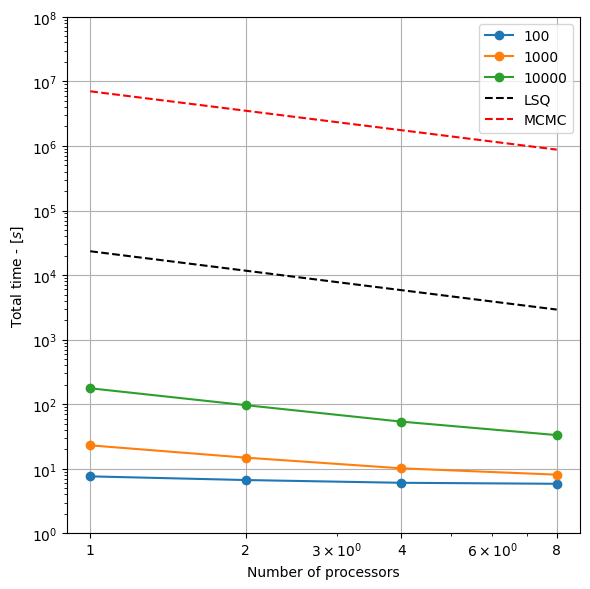

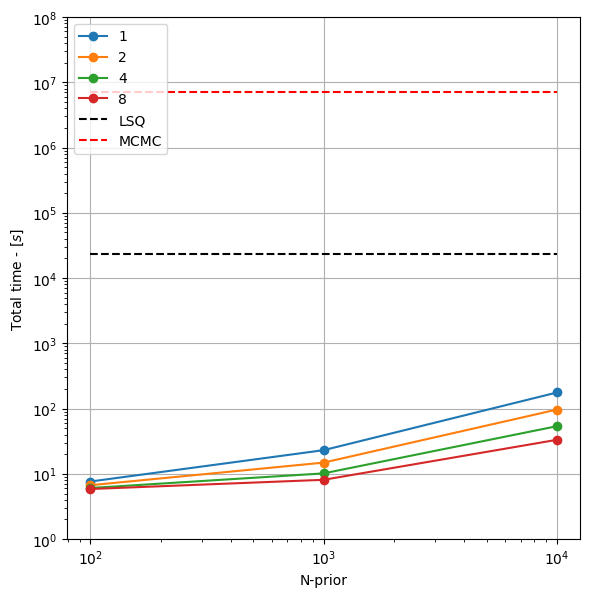

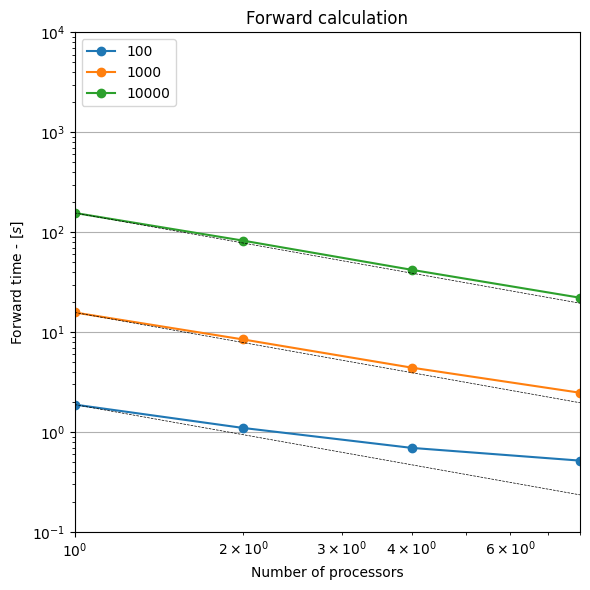

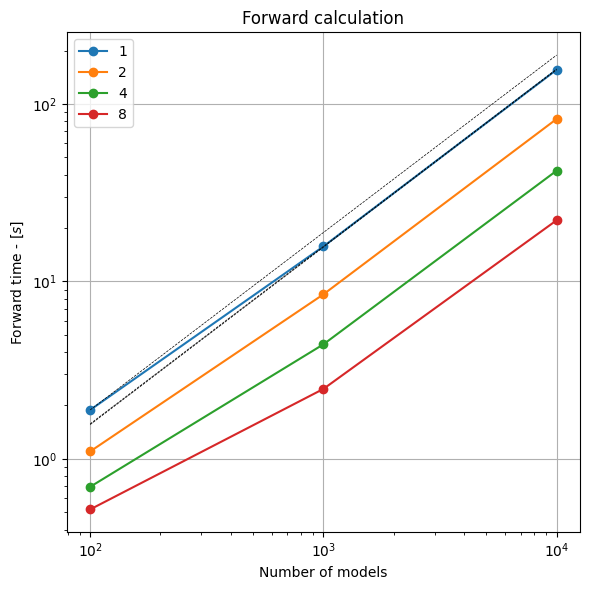

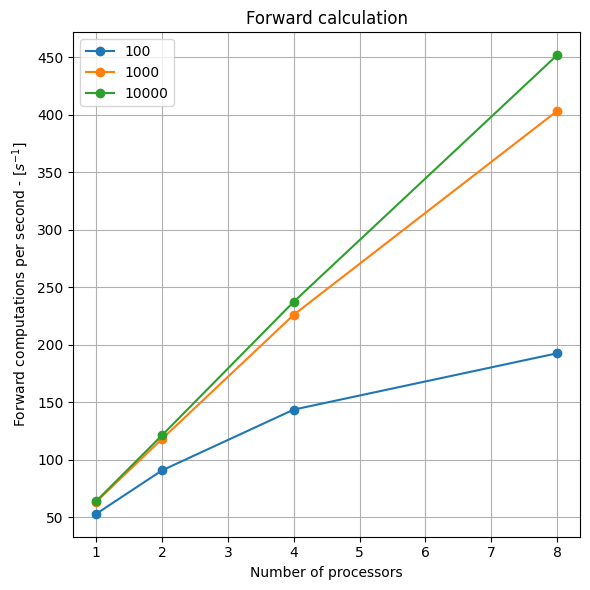

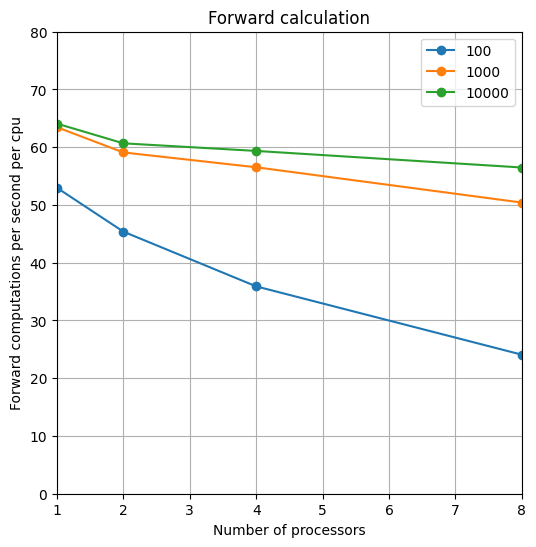

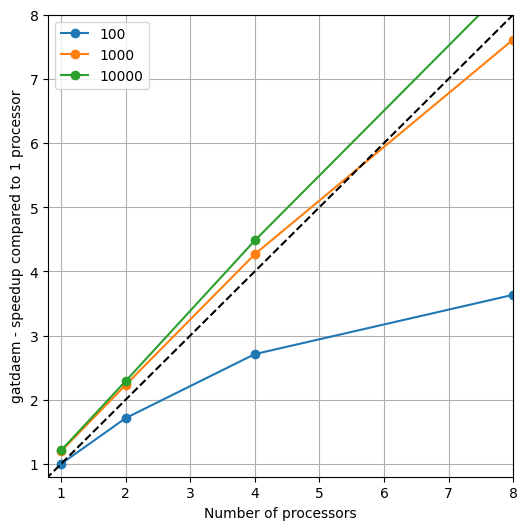

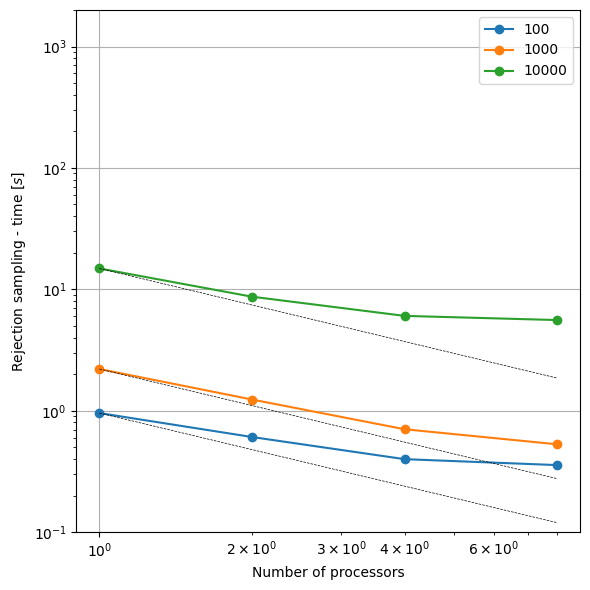

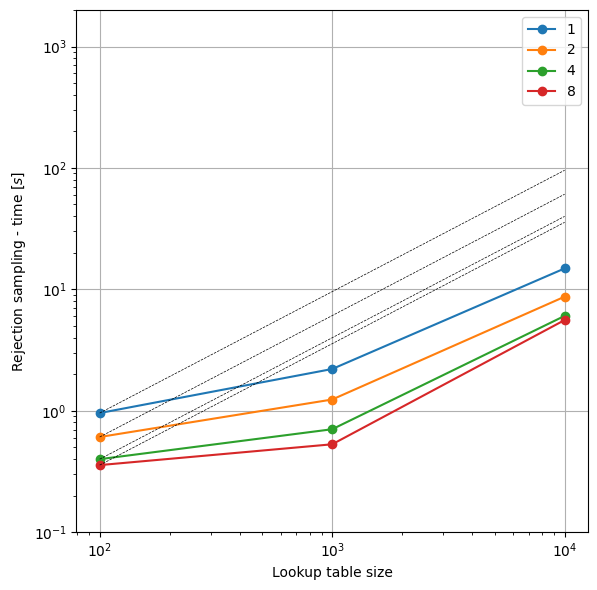

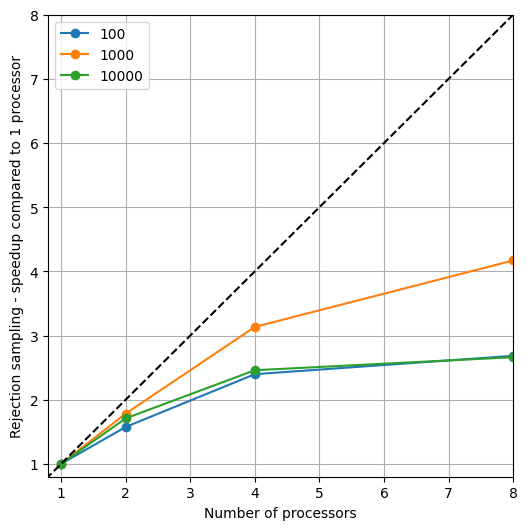

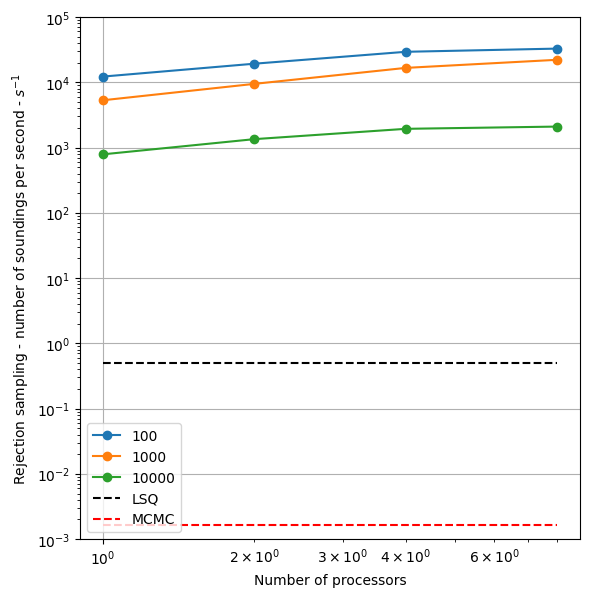

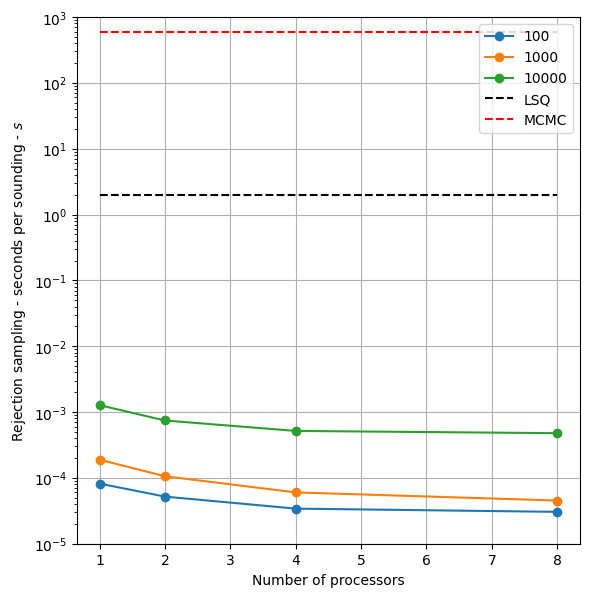

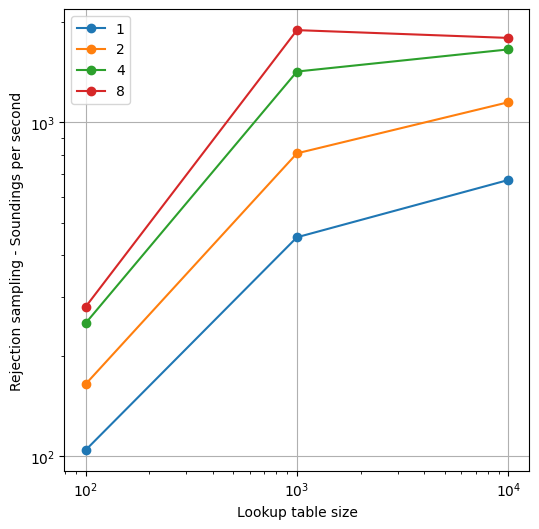

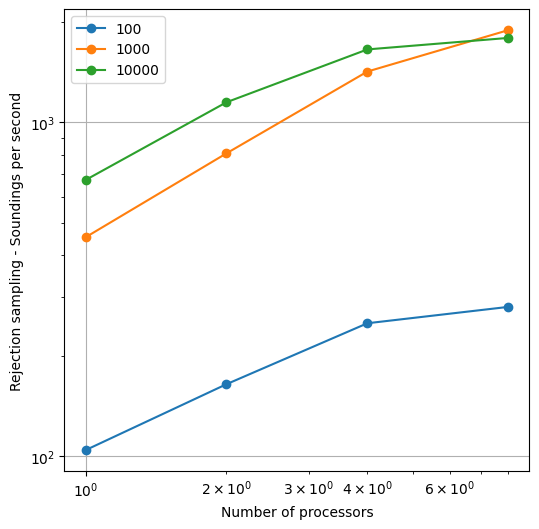

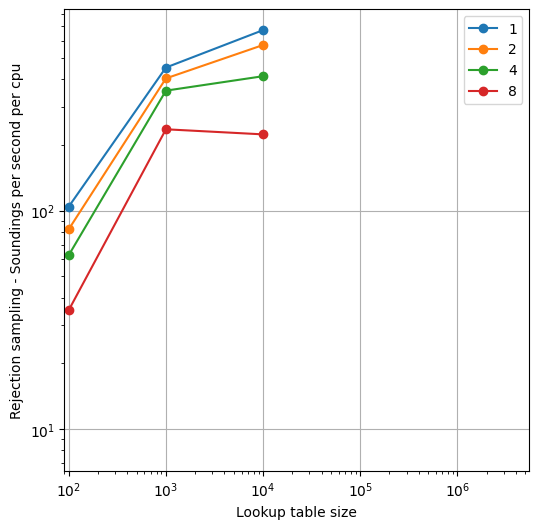

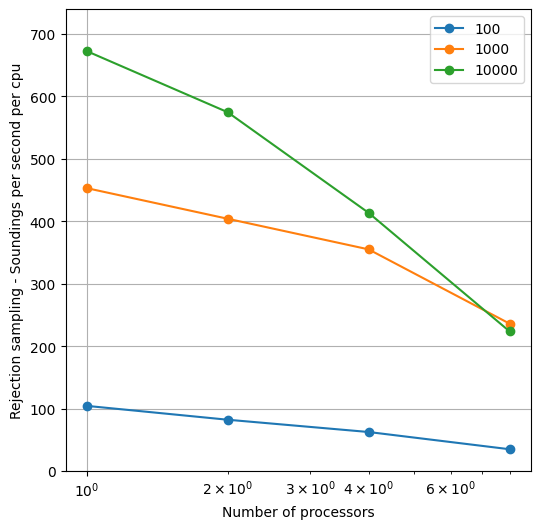

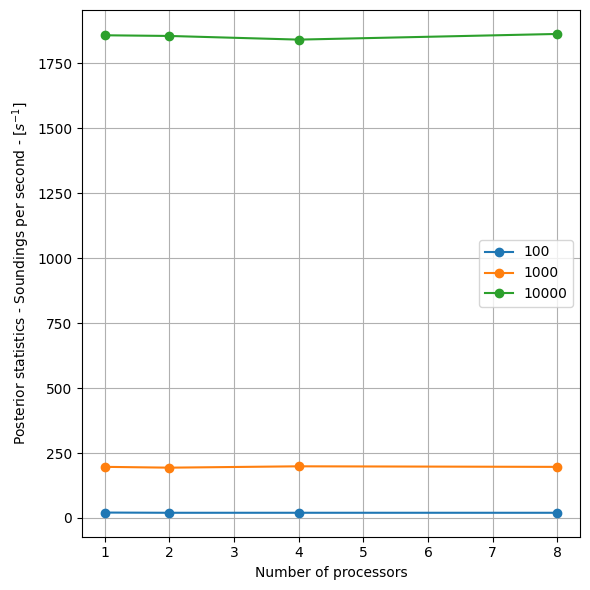

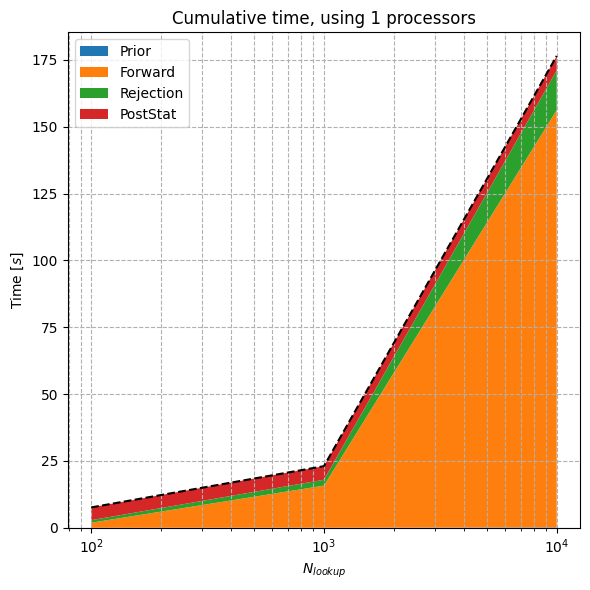

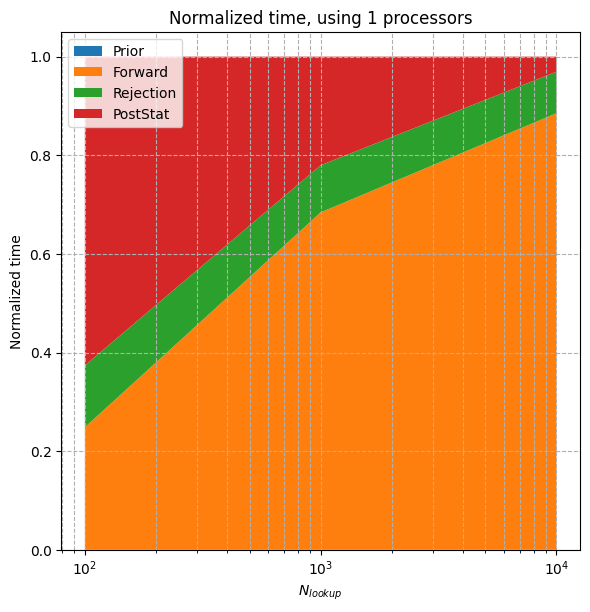

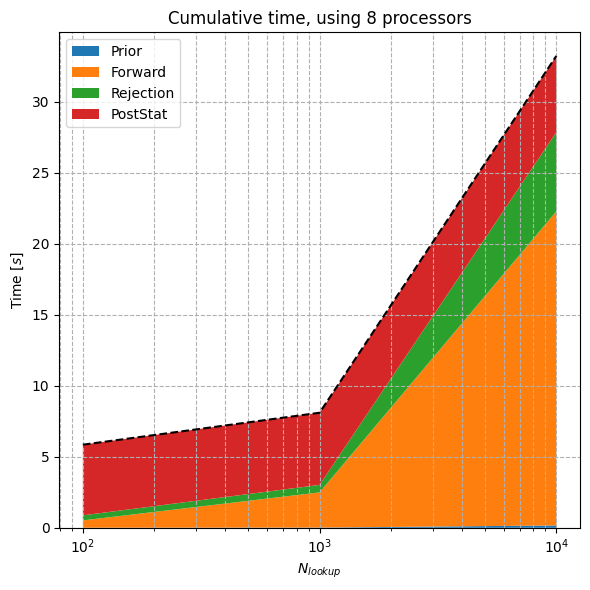

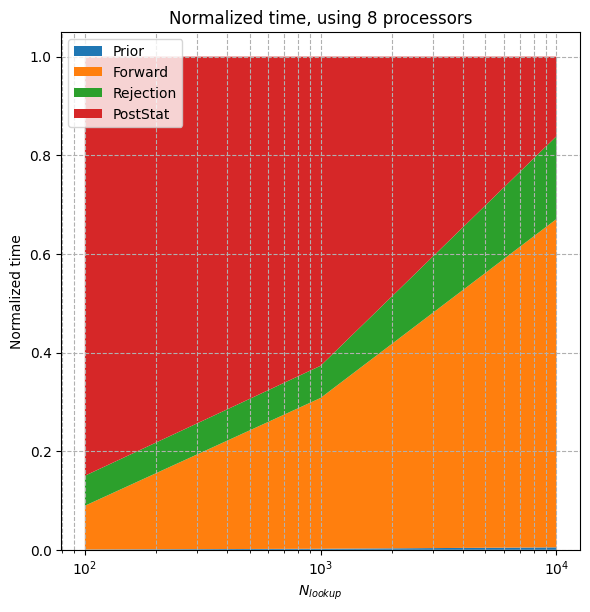

Timing plots generated with prefix: timing_d52534-Linux-24core_Nproc4_N3
Generated plots include:
- Total execution time analysis
- Forward modeling performance and speedup
- Rejection sampling scaling analysis
- Posterior statistics performance
- Cumulative time breakdowns


In [4]:
print("\n# Generating Timing Plots")
print("="*50)

# Generate comprehensive timing plots
ig.timing_plot(f_timing=timing_file)

print(f"Timing plots generated with prefix: {timing_file.split('.')[0]}")
print("Generated plots include:")
print("- Total execution time analysis")
print("- Forward modeling performance and speedup")
print("- Rejection sampling scaling analysis") 
print("- Posterior statistics performance")
print("- Cumulative time breakdowns")

## Medium Scale Timing Test

This example shows how to run a more comprehensive timing test with larger datasets.
Uncomment the code below to run a medium-scale test (takes longer to complete).

In [5]:
# Uncomment the block below for medium-scale timing test
"""
print("\n# Running Medium Scale Timing Test")
print("="*50)

# Define medium-scale test parameters  
N_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes
Nproc_arr_medium = [1, 2, 4, 8]               # More processor counts

# Run timing computation
timing_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)

print(f"Medium-scale timing results saved to: {timing_file_medium}")

# Generate plots
ig.timing_plot(f_timing=timing_file_medium)
print(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split('.')[0]}")
"""

'\nprint("\n# Running Medium Scale Timing Test")\nprint("="*50)\n\n# Define medium-scale test parameters  \nN_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes\nNproc_arr_medium = [1, 2, 4, 8]               # More processor counts\n\n# Run timing computation\ntiming_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)\n\nprint(f"Medium-scale timing results saved to: {timing_file_medium}")\n\n# Generate plots\nig.timing_plot(f_timing=timing_file_medium)\nprint(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split(\'.\')[0]}")\n'

## Full Scale Timing Test  

For production timing analysis, you can run the full test with the default parameters.
This will test a wide range of dataset sizes and all available processor counts.

In [6]:
# Uncomment the block below for full-scale timing test (takes significant time)
"""
print("\n# Running Full Scale Timing Test")
print("="*50)

# Run with default parameters (comprehensive test)
timing_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr

print(f"Full-scale timing results saved to: {timing_file_full}")

# Generate comprehensive plots
ig.timing_plot(f_timing=timing_file_full)
print(f"Full-scale timing plots generated with prefix: {timing_file_full.split('.')[0]}")
"""

'\nprint("\n# Running Full Scale Timing Test")\nprint("="*50)\n\n# Run with default parameters (comprehensive test)\ntiming_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr\n\nprint(f"Full-scale timing results saved to: {timing_file_full}")\n\n# Generate comprehensive plots\nig.timing_plot(f_timing=timing_file_full)\nprint(f"Full-scale timing plots generated with prefix: {timing_file_full.split(\'.\')[0]}")\n'

## Custom Timing Configuration

You can also customize the timing test for specific scenarios

In [7]:
print("\n# Example: Custom Timing Configuration")
print("="*50)

# Example: Focus on specific dataset sizes of interest
N_arr_custom = [1000, 5000, 10000]  # Focus on medium-large datasets
Nproc_arr_custom = [1, 4, 8]        # Test specific processor counts

print(f"Custom test configuration:")
print(f"Dataset sizes: {N_arr_custom}")  
print(f"Processor counts: {Nproc_arr_custom}")
print(f"This configuration tests {len(N_arr_custom)} × {len(Nproc_arr_custom)} = {len(N_arr_custom) * len(Nproc_arr_custom)} combinations")

# Uncomment to run custom timing test
"""
timing_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)
ig.timing_plot(f_timing=timing_file_custom)
print(f"Custom timing analysis complete: {timing_file_custom}")
"""


# Example: Custom Timing Configuration
Custom test configuration:
Dataset sizes: [1000, 5000, 10000]
Processor counts: [1, 4, 8]
This configuration tests 3 × 3 = 9 combinations


'\ntiming_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)\nig.timing_plot(f_timing=timing_file_custom)\nprint(f"Custom timing analysis complete: {timing_file_custom}")\n'

## Understanding Timing Results

The timing analysis provides insights into:

### Performance Scaling
- How execution time varies with dataset size
- Parallel efficiency across different processor counts
- Identification of computational bottlenecks

### Component Analysis  
- Relative time spent in each workflow component
- Which components benefit most from parallelization
- Memory vs compute-bound identification

### Comparison Baselines
- Performance relative to traditional least squares methods
- Comparison with MCMC sampling approaches
- Cost-benefit analysis of different configurations

### Optimization Guidance
- Optimal processor counts for different dataset sizes
- Sweet spots for price-performance ratios
- Scaling behavior for production deployments

## Tips for Timing Analysis

1. **Start Small**: Begin with quick tests using small N_arr and Nproc_arr
2. **System Warm-up**: First runs may be slower due to system initialization
3. **Resource Monitoring**: Monitor CPU, memory usage during large tests
4. **Reproducibility**: Results may vary between runs due to system load
5. **Hardware Specific**: Results are specific to your hardware configuration
6. **Baseline Comparison**: Compare with known reference systems when possible

print("\n# Timing Analysis Complete")
print("="*50)
print("Check the generated plots for detailed performance analysis.")
print("Timing data is saved in NPZ format for further analysis if needed.")